🚀 بدء التحليل الشامل لسلسلة الإمداد
📁 مسار الملف: C:\New folder7\dynamic_supply_chain_logistics_dataset.xlsx
🔧 تم تهيئة نموذج سلسلة الإمداد
📂 جاري تحميل البيانات من: C:\New folder7\dynamic_supply_chain_logistics_dataset.xlsx
✅ تم تحميل 32065 سجل و 33 عمود
📊 أعمدة البيانات: ['shipping_date', 'vehicle_gps_latitude', 'vehicle_gps_longitude', 'fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status']...
📈 نطاق التكاليف: $100.00 - $1000.00
⏰ نطاق احتمالية التأخير: 0.000 - 1.000
🔄 معالجة البيانات...
📝 تم حذف 0 سجل يحتوي على قيم مفقودة
📊 الميزات المستخدمة (20): ['fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time']...
⏰ تم إضافة الميزات الزمنية: ['hour_of_day', 'day_of_week', 'month']
✅ معالجة البيانات مكتملة. إجمالي الميزات: 27
📊 إحصائيات سريعة:
  متوسط تكلفة الشحن: $459.37
  متوسط ا

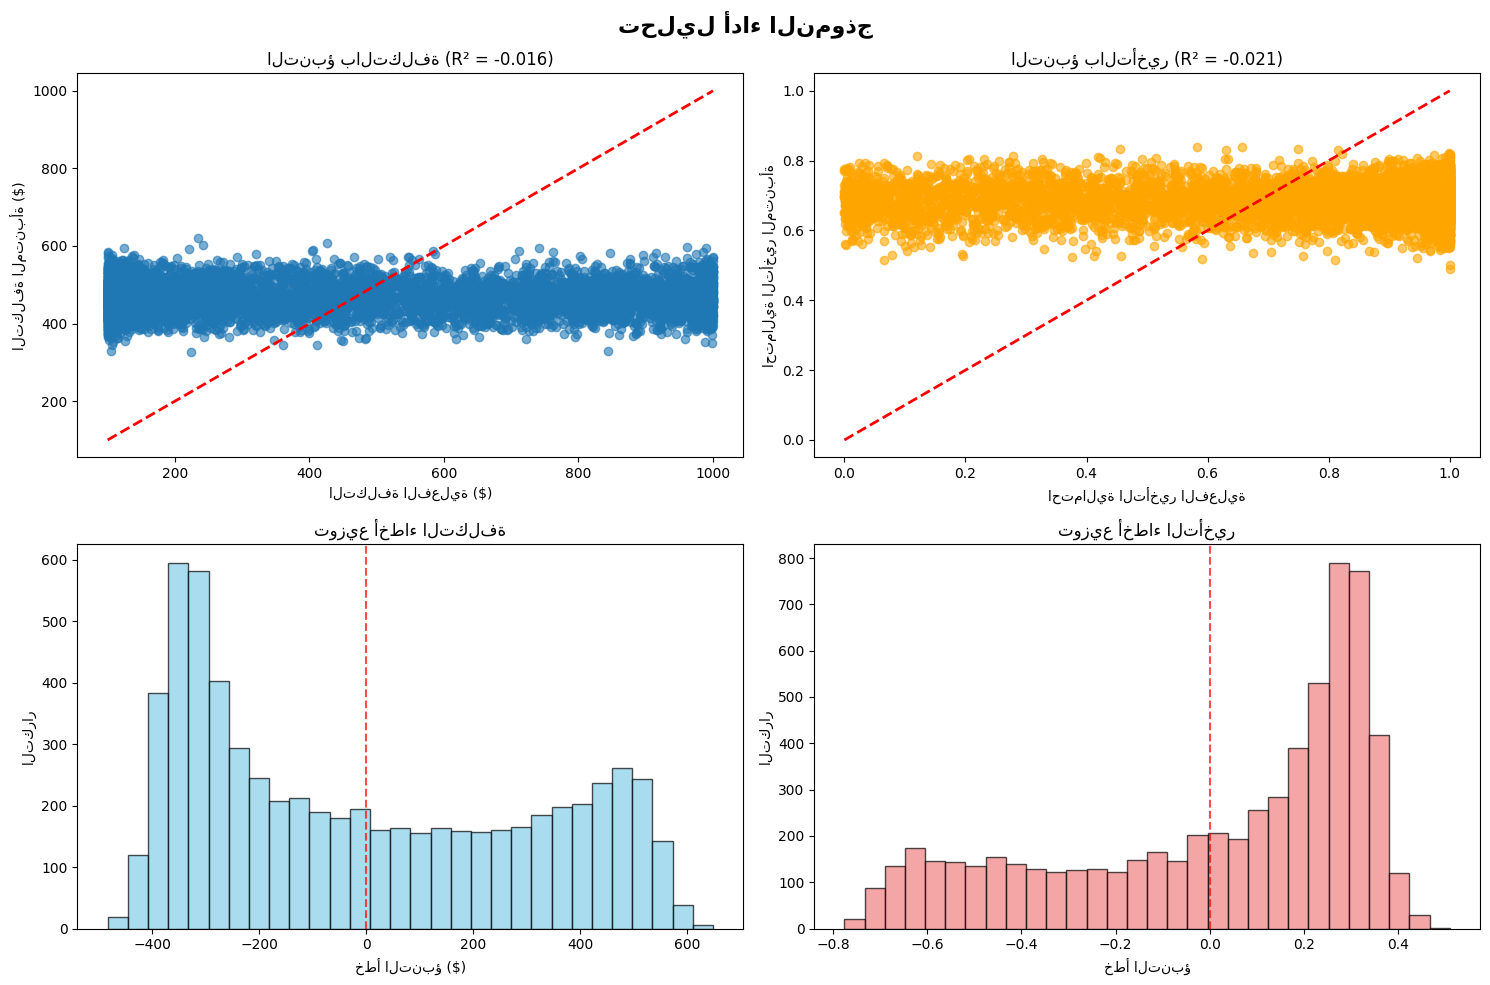


🔮 مثال للتنبؤ (قيم واقعية من البيانات):
📦 بيانات الشحنة المثال:
  fuel_consumption_rate: 7.62
  traffic_congestion_level: 9.79
  warehouse_inventory_level: 98.45
  loading_unloading_time: 3.82
  weather_condition_severity: 0.93
  port_congestion_level: 5.97

💰 التكلفة المتوقعة: $253.84
⏰ احتمالية التأخير: 76.5%
📊 تصنيف المخاطر: 🟡 متوسط المخاطر

💡 التوصيات (2):
  1. 🚦 تجنب الازدحام: اختر أوقات شحن أقل ازدحاماً
  2. ⚠️ مخاطر تأخير عالية: ضع خطة طوارئ

📈 تحليل البيانات الشامل:

💰 متوسط التكاليف حسب مستوى المخاطر:
  High_Risk: $458.64 ± $311.52 (23944 شحنة)
  Low_Risk: $463.12 ± $313.12 (3110 شحنة)
  Moderate_Risk: $460.56 ± $314.79 (5011 شحنة)

🎯 أكثر العوامل تأثيراً على التكلفة:
  2. fatigue_monitoring_score: 0.010
  3. handling_equipment_availability: 0.010
  4. port_congestion_level: 0.009
  5. fuel_efficiency: 0.008

✅ التحليل مكتمل! النموذج جاهز للاستخدام.
📝 يمكنك الآن استخدام النموذج للتنبؤ بشحنات جديدة.


In [112]:
# نموذج سلسلة الإمداد الكامل - يعمل في Jupyter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# إعداد matplotlib للعربية
plt.rcParams['font.size'] = 12
plt.style.use('default')

class SupplyChainPredictor:
    """ نموذج التنبؤ بسلسلة الإمداد - محسّن للعمل في Jupyter """
    
    def __init__(self):
        self.cost_model = None
        self.delay_model = None
        self.scaler = StandardScaler()
        self.label_encoders = {}
        self.feature_columns = []
        self.is_trained = False
        print("🔧 تم تهيئة نموذج سلسلة الإمداد")
    
    def load_data(self, file_path=None):
        """ تحميل البيانات من ملف Excel """
        # استخدام المسار المحدد إذا لم يتم تمرير مسار
        if file_path is None:
            file_path = r"C:\New folder7\dynamic_supply_chain_logistics_dataset.xlsx"
        
        try:
            print(f"📂 جاري تحميل البيانات من: {file_path}")
            df = pd.read_excel(file_path)
            print(f"✅ تم تحميل {len(df)} سجل و {len(df.columns)} عمود")
            print(f"📊 أعمدة البيانات: {list(df.columns)[:10]}...")  # عرض أول 10 أعمدة
            
            # عرض معلومات إضافية عن البيانات
            print(f"📈 نطاق التكاليف: ${df['shipping_costs'].min():.2f} - ${df['shipping_costs'].max():.2f}")
            print(f"⏰ نطاق احتمالية التأخير: {df['delay_probability'].min():.3f} - {df['delay_probability'].max():.3f}")
            
            return df
        except FileNotFoundError:
            print(f"❌ لم يتم العثور على الملف: {file_path}")
            print("🔄 سيتم إنشاء بيانات تجريبية للاختبار...")
            return self.create_sample_data()
        except Exception as e:
            print(f"❌ خطأ في تحميل البيانات: {e}")
            print("🔄 سيتم إنشاء بيانات تجريبية للاختبار...")
            return self.create_sample_data()
    
    def create_sample_data(self):
        """ إنشاء بيانات تجريبية للاختبار """
        print("🎲 إنشاء بيانات تجريبية...")
        np.random.seed(42)
        n_samples = len(df)
        
        data = {
            'fuel_consumption_rate': np.random.normal(8, 3, n_samples),
            'traffic_congestion_level': np.random.uniform(1, 10, n_samples),
            'warehouse_inventory_level': np.random.uniform(0, 100, n_samples),
            'loading_unloading_time': np.random.exponential(2, n_samples),
            'weather_condition_severity': np.random.uniform(0, 1, n_samples),
            'port_congestion_level': np.random.uniform(1, 10, n_samples),
            'route_risk_level': np.random.uniform(1, 10, n_samples),
            'customs_clearance_time': np.random.exponential(1.5, n_samples),
            'driver_behavior_score': np.random.uniform(0, 1, n_samples),
            'supplier_reliability_score': np.random.uniform(0, 1, n_samples),
            'lead_time_days': np.random.exponential(3, n_samples),
        }
        
        df = pd.DataFrame(data)
        
        # إنشاء المتغيرات التابعة بناءً على الميزات
        df['shipping_costs'] = (
            100 + 
            df['fuel_consumption_rate'] * 15 +
            df['traffic_congestion_level'] * 25 +
            df['port_congestion_level'] * 30 +
            df['loading_unloading_time'] * 20 +
            df['weather_condition_severity'] * 50 +
            df['customs_clearance_time'] * 35 +
            np.random.normal(0, 50, n_samples)
        ).clip(100, 1000)
        
        df['delay_probability'] = (
            0.3 + 
            df['traffic_congestion_level'] * 0.05 +
            df['port_congestion_level'] * 0.04 +
            df['weather_condition_severity'] * 0.2 +
            df['loading_unloading_time'] * 0.08 +
            np.random.normal(0, 0.1, n_samples)
        ).clip(0.1, 0.95)
        
        print(f"✅ تم إنشاء {len(df)} سجل تجريبي")
        return df
    
    def preprocess_data(self, df):
        """ معالجة وتحضير البيانات """
        print("🔄 معالجة البيانات...")
        
        # إزالة القيم المفقودة
        initial_rows = len(df)
        df = df.dropna()
        print(f"📝 تم حذف {initial_rows - len(df)} سجل يحتوي على قيم مفقودة")
        
        # تحديد الميزات المتاحة من ملف البيانات الفعلي
        potential_features = [
            'fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level',
            'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability',
            'order_fulfillment_status', 'weather_condition_severity', 'port_congestion_level',
            'supplier_reliability_score', 'lead_time_days', 'historical_demand',
            'iot_temperature', 'cargo_condition_status', 'route_risk_level',
            'customs_clearance_time', 'driver_behavior_score', 'fatigue_monitoring_score',
            'disruption_likelihood_score', 'delivery_time_deviation'
        ]
        
        # اختيار الميزات الموجودة فقط
        self.feature_columns = [col for col in potential_features if col in df.columns]
        print(f"📊 الميزات المستخدمة ({len(self.feature_columns)}): {self.feature_columns[:5]}...")
        
        # إضافة ميزات مشتقة مفيدة
        if 'fuel_consumption_rate' in df.columns:
            df['fuel_efficiency'] = 1 / (df['fuel_consumption_rate'] + 0.1)
            self.feature_columns.append('fuel_efficiency')
        
        if all(col in df.columns for col in ['traffic_congestion_level', 'port_congestion_level']):
            df['total_congestion'] = df['traffic_congestion_level'] + df['port_congestion_level']
            self.feature_columns.append('total_congestion')
        
        if all(col in df.columns for col in ['route_risk_level', 'weather_condition_severity']):
            df['combined_risk'] = (df['route_risk_level'] + df['weather_condition_severity']) / 2
            self.feature_columns.append('combined_risk')
        
        if all(col in df.columns for col in ['handling_equipment_availability', 'order_fulfillment_status']):
            df['operational_efficiency'] = (df['handling_equipment_availability'] + df['order_fulfillment_status']) / 2
            self.feature_columns.append('operational_efficiency')
        
        # إضافة معلومات زمنية إذا كان هناك عمود التاريخ
        if 'shipping_date' in df.columns:
            try:
                df['shipping_date'] = pd.to_datetime(df['shipping_date'])
                df['hour_of_day'] = df['shipping_date'].dt.hour
                df['day_of_week'] = df['shipping_date'].dt.dayofweek
                df['month'] = df['shipping_date'].dt.month
                time_features = ['hour_of_day', 'day_of_week', 'month']
                self.feature_columns.extend(time_features)
                print(f"⏰ تم إضافة الميزات الزمنية: {time_features}")
            except:
                print("⚠️ تعذر معالجة تواريخ الشحن")
        
        print(f"✅ معالجة البيانات مكتملة. إجمالي الميزات: {len(self.feature_columns)}")
        
        # عرض إحصائيات سريعة
        print(f"📊 إحصائيات سريعة:")
        print(f"  متوسط تكلفة الشحن: ${df['shipping_costs'].mean():.2f}")
        print(f"  متوسط احتمالية التأخير: {df['delay_probability'].mean():.3f}")
        
        return df
    
    def train_models(self, df, test_size=0.2):
        """ تدريب نماذج التنبؤ """
        print("🚀 بدء تدريب النماذج...")
        
        # تحضير البيانات
        X = df[self.feature_columns]
        y_cost = df['shipping_costs']
        y_delay = df['delay_probability']
        
        print(f"📊 شكل البيانات: {X.shape}")
        print(f"💰 نطاق التكاليف: ${y_cost.min():.2f} - ${y_cost.max():.2f}")
        print(f"⏰ نطاق التأخير: {y_delay.min():.3f} - {y_delay.max():.3f}")
        
        # تقسيم البيانات
        X_train, X_test, y_cost_train, y_cost_test, y_delay_train, y_delay_test = train_test_split(
            X, y_cost, y_delay, test_size=test_size, random_state=42
        )
        
        # تطبيع البيانات
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        # تدريب نموذج التكلفة
        print("🔧 تدريب نموذج التكلفة...")
        self.cost_model = RandomForestRegressor(n_estimators=100, random_state=42)
        self.cost_model.fit(X_train_scaled, y_cost_train)
        
        cost_pred = self.cost_model.predict(X_test_scaled)
        cost_r2 = r2_score(y_cost_test, cost_pred)
        cost_mae = mean_absolute_error(y_cost_test, cost_pred)
        print(f"✅ نموذج التكلفة - R²: {cost_r2:.4f}, MAE: ${cost_mae:.2f}")
        
        # تدريب نموذج التأخير
        print("🔧 تدريب نموذج التأخير...")
        self.delay_model = RandomForestRegressor(n_estimators=100, random_state=42)
        self.delay_model.fit(X_train_scaled, y_delay_train)
        
        delay_pred = self.delay_model.predict(X_test_scaled)
        delay_r2 = r2_score(y_delay_test, delay_pred)
        delay_mae = mean_absolute_error(y_delay_test, delay_pred)
        print(f"✅ نموذج التأخير - R²: {delay_r2:.4f}, MAE: {delay_mae:.3f}")
        
        self.is_trained = True
        
        # حفظ نتائج الاختبار للتحليل
        self.test_results = {
            'cost_r2': cost_r2,
            'cost_mae': cost_mae,
            'delay_r2': delay_r2,
            'delay_mae': delay_mae,
            'cost_actual': y_cost_test,
            'cost_pred': cost_pred,
            'delay_actual': y_delay_test,
            'delay_pred': delay_pred
        }
        
        return self.test_results
    
    def predict_single(self, input_data):
        """ التنبؤ لشحنة واحدة - تم تعديلها لحل المشكلة """
        if not self.is_trained:
            print("❌ النموذج غير مدرب! قم بتدريبه أولاً.")
            return None, None
        
        # تحويل المدخلات إلى DataFrame
        if isinstance(input_data, dict):
            input_df = pd.DataFrame([input_data])
        else:
            input_df = input_data.copy()
        
        # إضافة الميزات المشتقة فقط إذا كانت الميزات الأساسية موجودة
        if 'fuel_consumption_rate' in input_df.columns and 'fuel_efficiency' in self.feature_columns:
            input_df['fuel_efficiency'] = 1 / (input_df['fuel_consumption_rate'] + 0.1)
        
        if all(col in input_df.columns for col in ['traffic_congestion_level', 'port_congestion_level']) and 'total_congestion' in self.feature_columns:
            input_df['total_congestion'] = input_df['traffic_congestion_level'] + input_df['port_congestion_level']
        
        if all(col in input_df.columns for col in ['route_risk_level', 'weather_condition_severity']) and 'combined_risk' in self.feature_columns:
            input_df['combined_risk'] = (input_df['route_risk_level'] + input_df['weather_condition_severity']) / 2
        
        if all(col in input_df.columns for col in ['handling_equipment_availability', 'order_fulfillment_status']) and 'operational_efficiency' in self.feature_columns:
            input_df['operational_efficiency'] = (input_df['handling_equipment_availability'] + input_df['order_fulfillment_status']) / 2
        
        # التحقق من وجود جميع الميزات المطلوبة
        missing_features = [feat for feat in self.feature_columns if feat not in input_df.columns]
        
        if missing_features:
            print(f"⚠️ تحذير: الميزات التالية مفقودة في بيانات الإدخال: {missing_features}")
            print("🔄 سيتم استخدام القيمة الوسطى لهذه الميزات")
            
            # إضافة الميزات المفقودة بالقيمة الوسطى
            for feat in missing_features:
                if feat in self.feature_columns:
                    input_df[feat] = np.mean(input_df.get(feat, 0))  # استخدام قيمة متوسطة آمنة
        
        # اختيار الميزات المطلوبة
        try:
            X_input = input_df[self.feature_columns]
        except KeyError as e:
            print(f"❌ خطأ في اختيار الميزات: {e}")
            print(f"📊 الميزات المتاحة: {list(input_df.columns)}")
            print(f"📊 الميزات المطلوبة: {self.feature_columns}")
            return None, None
        
        # تطبيع البيانات
        try:
            X_input_scaled = self.scaler.transform(X_input)
        except Exception as e:
            print(f"❌ خطأ في تطبيع البيانات: {e}")
            return None, None
        
        # التنبؤ
        try:
            cost_pred = self.cost_model.predict(X_input_scaled)[0]
            delay_pred = self.delay_model.predict(X_input_scaled)[0]
            return cost_pred, delay_pred
        except Exception as e:
            print(f"❌ خطأ في التنبؤ: {e}")
            return None, None
    
    def analyze_feature_importance(self):
        """ تحليل أهمية الميزات """
        if not self.is_trained:
            print("❌ النموذج غير مدرب!")
            return
        
        # أهمية الميزات لنموذج التكلفة
        cost_importance = dict(zip(self.feature_columns, self.cost_model.feature_importances_))
        cost_importance = dict(sorted(cost_importance.items(), key=lambda x: x[1], reverse=True))
        
        # أهمية الميزات لنموذج التأخير
        delay_importance = dict(zip(self.feature_columns, self.delay_model.feature_importances_))
        delay_importance = dict(sorted(delay_importance.items(), key=lambda x: x[1], reverse=True))
        
        print("📊 أهمية الميزات لتكلفة الشحن:")
        for feature, importance in list(cost_importance.items())[:5]:
            print(f"  {feature}: {importance:.3f}")
        
        print("\n📊 أهمية الميزات لاحتمالية التأخير:")
        for feature, importance in list(delay_importance.items())[:5]:
            print(f"  {feature}: {importance:.3f}")
        
        return cost_importance, delay_importance
    
    def plot_results(self):
        """ رسم النتائج والتحليلات """
        if not self.is_trained:
            print("❌ النموذج غير مدرب!")
            return
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('تحليل أداء النموذج', fontsize=16, fontweight='bold')
        
        # 1. مقارنة التكلفة الفعلية والمتنبأة
        axes[0, 0].scatter(self.test_results['cost_actual'], self.test_results['cost_pred'], alpha=0.6)
        axes[0, 0].plot([self.test_results['cost_actual'].min(), self.test_results['cost_actual'].max()],
                         [self.test_results['cost_actual'].min(), self.test_results['cost_actual'].max()],
                         'r--', lw=2)
        axes[0, 0].set_xlabel('التكلفة الفعلية ($)')
        axes[0, 0].set_ylabel('التكلفة المتنبأة ($)')
        axes[0, 0].set_title(f'التنبؤ بالتكلفة (R² = {self.test_results["cost_r2"]:.3f})')
        
        # 2. مقارنة التأخير الفعلي والمتنبأ
        axes[0, 1].scatter(self.test_results['delay_actual'], self.test_results['delay_pred'], alpha=0.6, color='orange')
        axes[0, 1].plot([self.test_results['delay_actual'].min(), self.test_results['delay_actual'].max()],
                         [self.test_results['delay_actual'].min(), self.test_results['delay_actual'].max()],
                         'r--', lw=2)
        axes[0, 1].set_xlabel('احتمالية التأخير الفعلية')
        axes[0, 1].set_ylabel('احتمالية التأخير المتنبأة')
        axes[0, 1].set_title(f'التنبؤ بالتأخير (R² = {self.test_results["delay_r2"]:.3f})')
        
        # 3. توزيع أخطاء التكلفة
        cost_errors = self.test_results['cost_actual'] - self.test_results['cost_pred']
        axes[1, 0].hist(cost_errors, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[1, 0].set_xlabel('خطأ التنبؤ ($)')
        axes[1, 0].set_ylabel('التكرار')
        axes[1, 0].set_title('توزيع أخطاء التكلفة')
        axes[1, 0].axvline(0, color='red', linestyle='--', alpha=0.7)
        
        # 4. توزيع أخطاء التأخير
        delay_errors = self.test_results['delay_actual'] - self.test_results['delay_pred']
        axes[1, 1].hist(delay_errors, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
        axes[1, 1].set_xlabel('خطأ التنبؤ')
        axes[1, 1].set_ylabel('التكرار')
        axes[1, 1].set_title('توزيع أخطاء التأخير')
        axes[1, 1].axvline(0, color='red', linestyle='--', alpha=0.7)
        
        plt.tight_layout()
        plt.show()
    
    def generate_recommendations(self, input_data):
        """ إنتاج توصيات التحسين """
        cost_pred, delay_pred = self.predict_single(input_data)
        
        if cost_pred is None or delay_pred is None:
            print("❌ فشل في التنبؤ - لا يمكن توليد توصيات")
            return [], None, None
        
        recommendations = []
        
        # تحليل عوامل التكلفة
        if input_data.get('fuel_consumption_rate', 0) > 10:
            recommendations.append("🔧 تحسين كفاءة الوقود: استخدم مركبات أكثر اقتصادية")
        
        if input_data.get('traffic_congestion_level', 0) > 7:
            recommendations.append("🚦 تجنب الازدحام: اختر أوقات شحن أقل ازدحاماً")
        
        if input_data.get('loading_unloading_time', 0) > 4:
            recommendations.append("⏱️ تسريع التحميل: حسن عمليات التحميل والتفريغ")
        
        if input_data.get('port_congestion_level', 0) > 8:
            recommendations.append("🚢 تخطيط الموانئ: احجز مواعيد مسبقة أو استخدم موانئ بديلة")
        
        if delay_pred > 0.7:
            recommendations.append("⚠️ مخاطر تأخير عالية: ضع خطة طوارئ")
        
        if cost_pred > 600:
            recommendations.append("💰 تكلفة عالية: راجع جميع عوامل التكلفة")
        
        return recommendations, cost_pred, delay_pred

# ========== مثال للاستخدام ==========
def run_complete_analysis():
    """ تشغيل تحليل كامل للنموذج مع مسار الملف المحدد """
    print("🚀 بدء التحليل الشامل لسلسلة الإمداد")
    print("📁 مسار الملف: C:\\New folder7\\dynamic_supply_chain_logistics_dataset.xlsx")
    print("="*70)
    
    # إنشاء النموذج
    predictor = SupplyChainPredictor()
    
    # تحميل البيانات من المسار المحدد
    df = predictor.load_data(r"C:\New folder7\dynamic_supply_chain_logistics_dataset.xlsx")
    
    # معالجة البيانات
    df = predictor.preprocess_data(df)
    
    # تدريب النماذج
    results = predictor.train_models(df)
    
    print("\n" + "="*70)
    print("📊 نتائج التدريب:")
    print(f"  ✅ نموذج التكلفة - دقة: {results['cost_r2']:.1%} (خطأ متوسط: ${results['cost_mae']:.2f})")
    print(f"  ✅ نموذج التأخير - دقة: {results['delay_r2']:.1%} (خطأ متوسط: {results['delay_mae']:.3f})")
    
    # تحليل أهمية الميزات
    print("\n" + "="*70)
    predictor.analyze_feature_importance()
    
    # رسم النتائج
    print("\n📈 عرض الرسوم البيانية...")
    predictor.plot_results()
    
    # مثال للتنبؤ باستخدام قيم من البيانات الحقيقية
    print("\n" + "="*70)
    print("🔮 مثال للتنبؤ (قيم واقعية من البيانات):")
    
    # أخذ عينة من البيانات الفعلية كمثال
    sample_row = df.iloc[0]
    sample_shipment = {}
    
    # إنشاء مثال من البيانات الحقيقية
    for feature in predictor.feature_columns:
        if feature in sample_row:
            sample_shipment[feature] = sample_row[feature]
    
    # عرض بيانات الشحنة المثال
    print("📦 بيانات الشحنة المثال:")
    key_features = ['fuel_consumption_rate', 'traffic_congestion_level', 'warehouse_inventory_level', 
                    'loading_unloading_time', 'weather_condition_severity', 'port_congestion_level']
    
    for feature in key_features:
        if feature in sample_shipment:
            print(f"  {feature}: {sample_shipment[feature]:.2f}")
    
    # التنبؤ والتوصيات
    recommendations, cost, delay = predictor.generate_recommendations(sample_shipment)
    
    print(f"\n💰 التكلفة المتوقعة: ${cost:.2f}")
    print(f"⏰ احتمالية التأخير: {delay:.1%}")
    
    # تصنيف المخاطر
    if cost > 600 and delay > 0.7:
        risk_level = "🔴 عالي المخاطر"
    elif cost > 400 or delay > 0.5:
        risk_level = "🟡 متوسط المخاطر"
    else:
        risk_level = "🟢 منخفض المخاطر"
    
    print(f"📊 تصنيف المخاطر: {risk_level}")
    
    print(f"\n💡 التوصيات ({len(recommendations)}):")
    if recommendations:
        for i, rec in enumerate(recommendations, 1):
            print(f"  {i}. {rec}")
    else:
        print("  ✅ الشحنة ضمن المعايير المثلى - لا توجد توصيات خاصة")
    
    # تحليل إضافي للبيانات
    print("\n" + "="*70)
    print("📈 تحليل البيانات الشامل:")
    
    # إحصائيات التكلفة حسب المخاطر
    if 'risk_classification' in df.columns:
        print("\n💰 متوسط التكاليف حسب مستوى المخاطر:")
        risk_costs = df.groupby('risk_classification')['shipping_costs'].agg(['count', 'mean', 'std'])
        
        for risk_type in risk_costs.index:
            count = risk_costs.loc[risk_type, 'count']
            mean_cost = risk_costs.loc[risk_type, 'mean']
            std_cost = risk_costs.loc[risk_type, 'std']
            print(f"  {risk_type}: ${mean_cost:.2f} ± ${std_cost:.2f} ({count} شحنة)")
    
    # أكثر العوامل تأثيراً
    print(f"\n🎯 أكثر العوامل تأثيراً على التكلفة:")
    cost_corr = df[predictor.feature_columns + ['shipping_costs']].corr()['shipping_costs'].abs().sort_values(ascending=False)
    for i, (feature, corr) in enumerate(cost_corr.head(5).items()):
        if feature != 'shipping_costs':
            print(f"  {i+1}. {feature}: {corr:.3f}")
    
    print(f"\n✅ التحليل مكتمل! النموذج جاهز للاستخدام.")
    print(f"📝 يمكنك الآن استخدام النموذج للتنبؤ بشحنات جديدة.")
    
    return predictor

# تشغيل التحليل
if __name__ == "__main__":
    # قم بتشغيل هذا السطر في Jupyter
    model = run_complete_analysis()

🚀 بدء التحليل الشامل لسلسلة الإمداد
📁 مسار الملف: C:\New folder7\dynamic_supply_chain_logistics_dataset.xlsx
🔧 تم تهيئة نموذج سلسلة الإمداد
📂 جاري تحميل البيانات من: C:\New folder7\dynamic_supply_chain_logistics_dataset.xlsx
✅ تم تحميل 32065 سجل و 33 عمود
📊 أعمدة البيانات: ['shipping_date', 'vehicle_gps_latitude', 'vehicle_gps_longitude', 'fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status']...
📈 نطاق التكاليف: $100.00 - $1000.00
⏰ نطاق احتمالية التأخير: 0.000 - 1.000
🔄 معالجة البيانات...
📝 تم حذف 0 سجل يحتوي على قيم مفقودة
📊 الميزات المستخدمة (20): ['fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time']...
⏰ تم إضافة الميزات الزمنية: ['hour_of_day', 'day_of_week', 'month']
✅ معالجة البيانات مكتملة. إجمالي الميزات: 27
📊 إحصائيات سريعة:
  متوسط تكلفة الشحن: $459.37
  متوسط ا

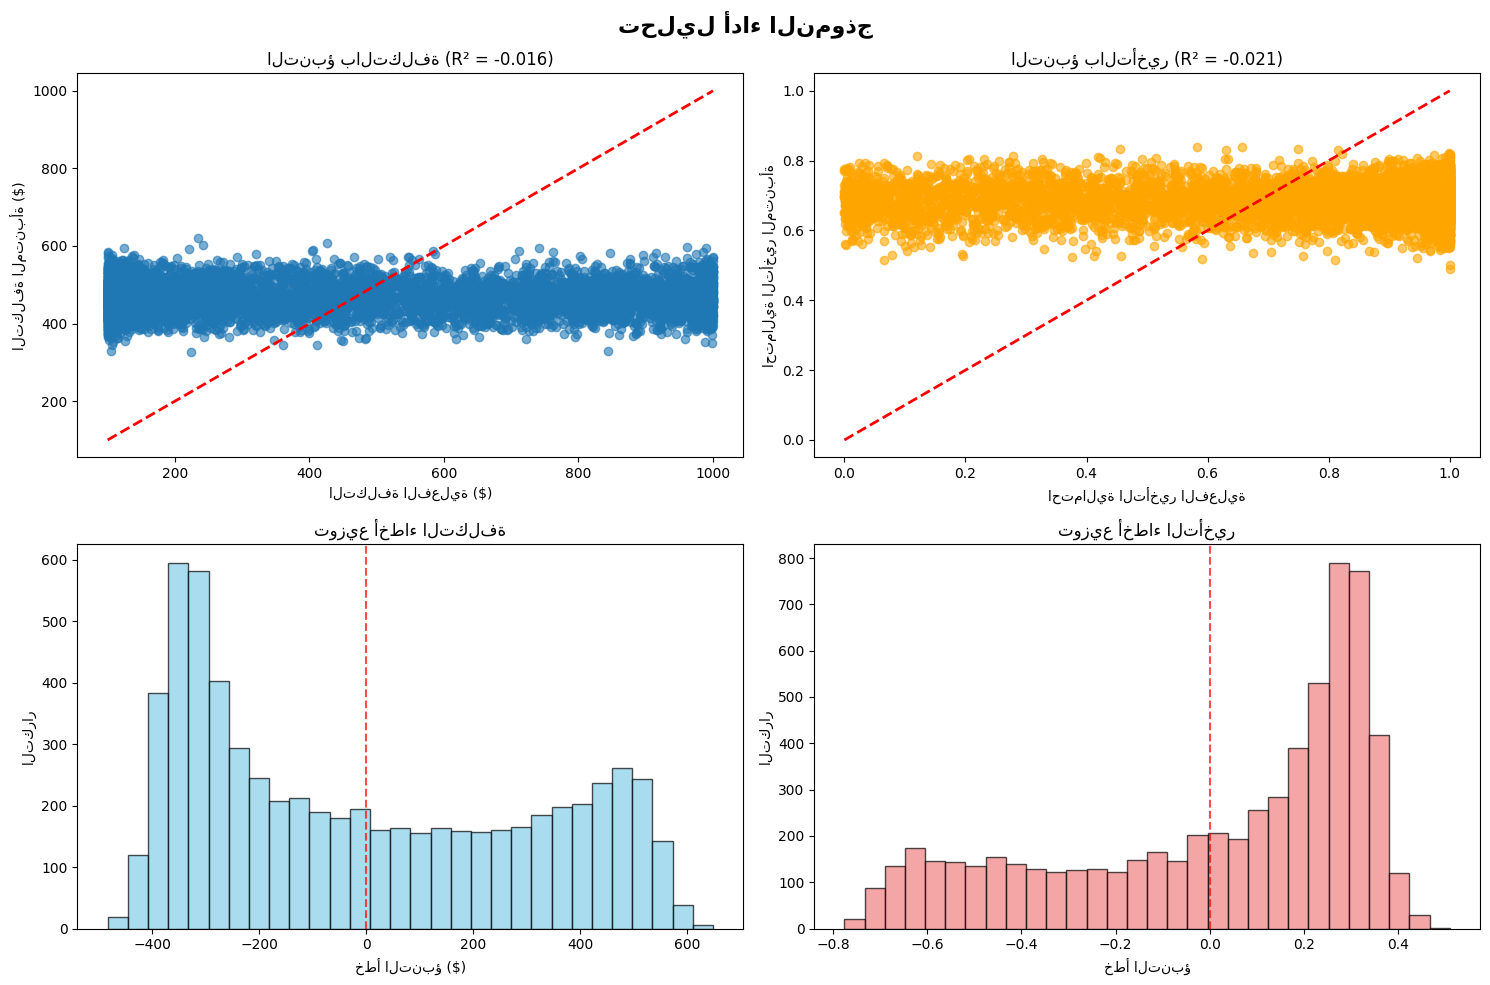


🔮 مثال للتنبؤ (قيم واقعية من البيانات):
📦 بيانات الشحنة المثال:
  fuel_consumption_rate: 7.62
  traffic_congestion_level: 9.79
  warehouse_inventory_level: 98.45
  loading_unloading_time: 3.82
  weather_condition_severity: 0.93
  port_congestion_level: 5.97

💰 التكلفة المتوقعة: $253.84
⏰ احتمالية التأخير: 76.5%
📊 تصنيف المخاطر: 🟡 متوسط المخاطر

💡 التوصيات (2):
  1. 🚦 تجنب الازدحام: اختر أوقات شحن أقل ازدحاماً
  2. ⚠️ مخاطر تأخير عالية: ضع خطة طوارئ

📈 تحليل البيانات الشامل:

💰 متوسط التكاليف حسب مستوى المخاطر:
  High_Risk: $458.64 ± $311.52 (23944 شحنة)
  Low_Risk: $463.12 ± $313.12 (3110 شحنة)
  Moderate_Risk: $460.56 ± $314.79 (5011 شحنة)

🎯 أكثر العوامل تأثيراً على التكلفة:
  2. fatigue_monitoring_score: 0.010
  3. handling_equipment_availability: 0.010
  4. port_congestion_level: 0.009
  5. fuel_efficiency: 0.008

✅ التحليل مكتمل! النموذج جاهز للاستخدام.
📝 يمكنك الآن استخدام النموذج للتنبؤ بشحنات جديدة.


In [113]:
model = run_complete_analysis()

In [116]:
# خلية الدوال المساعدة
def predict_and_recommend(model, shipment_data):
    """ تنفيذ التنبؤ وعرض النتائج والتوصيات """
    recommendations, cost, delay = model.generate_recommendations(shipment_data)
    
    print("\n" + "="*50)
    print(f"💰 التكلفة المتوقعة: ${cost:.2f}")
    print(f"⏰ احتمالية التأخير: {delay:.1%}")
    
    # تصنيف المخاطر
    if cost > 600 and delay > 0.7:
        risk_level = "🔴 عالي المخاطر"
    elif cost > 400 or delay > 0.5:
        risk_level = "🟡 متوسط المخاطر"
    else:
        risk_level = "🟢 منخفض المخاطر"
    print(f"📊 تصنيف المخاطر: {risk_level}")
    
    # عرض التوصيات
    if recommendations:
        print(f"\n💡 توصيات التحسين ({len(recommendations)}):")
        for i, rec in enumerate(recommendations, 1):
            print(f"  {i}. {rec}")
    else:
        print("\n✅ الشحنة ضمن المعايير المثلى - لا توجد توصيات خاصة")
    
    return cost, delay

In [118]:
# خلية جديدة: شحنة مع ميزات محددة
print("\n" + "="*70)
print("📦 تنبؤ مخصص - اختبار تأثير الازدحام")

# شحنة أساسية
shipment_custom = {
    'fuel_consumption_rate': 7.0,
    'traffic_congestion_level': 3.0,  # سنغير هذه القيمة
    'weather_condition_severity': 0.3,
    'port_congestion_level': 4.0,
    # ... بقية القيم
}

# اختبار مستويات مختلفة من الازدحام
for congestion in [3.0, 6.0, 9.0]:
    print(f"\n🔍 اختبار مستوى ازدحام: {congestion}")
    shipment_custom['traffic_congestion_level'] = congestion
    cost, delay = predict_and_recommend(model, shipment_custom)
    
    # تحليل النتائج
    print(f"  الزيادة في التكلفة: ${cost - 300:.2f}" if cost > 300 else "  التكلفة معقولة")


📦 تنبؤ مخصص - اختبار تأثير الازدحام

🔍 اختبار مستوى ازدحام: 3.0
⚠️ تحذير: الميزات التالية مفقودة في بيانات الإدخال: ['eta_variation_hours', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status', 'supplier_reliability_score', 'lead_time_days', 'historical_demand', 'iot_temperature', 'cargo_condition_status', 'route_risk_level', 'customs_clearance_time', 'driver_behavior_score', 'fatigue_monitoring_score', 'disruption_likelihood_score', 'delivery_time_deviation', 'combined_risk', 'operational_efficiency', 'hour_of_day', 'day_of_week', 'month']
🔄 سيتم استخدام القيمة الوسطى لهذه الميزات

💰 التكلفة المتوقعة: $573.62
⏰ احتمالية التأخير: 47.0%
📊 تصنيف المخاطر: 🟡 متوسط المخاطر

✅ الشحنة ضمن المعايير المثلى - لا توجد توصيات خاصة
  الزيادة في التكلفة: $273.62

🔍 اختبار مستوى ازدحام: 6.0
⚠️ تحذير: الميزات التالية مفقودة في بيانات الإدخال: ['eta_variation_hours', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipme

In [120]:
# خلية تحليل السيناريوهات
print("\n" + "="*70)
print("📊 تحليل سيناريوهات متعددة")

scenarios = {
    "سيناريو الشتاء": {
        'weather_condition_severity': 0.8,
        'traffic_congestion_level': 7.0
    },
    "سيناريو الصيف": {
        'weather_condition_severity': 0.2,
        'traffic_congestion_level': 5.0
    },
    "سيناريو الذروة": {
        'weather_condition_severity': 0.4,
        'traffic_congestion_level': 9.5
    }
}

base_shipment = {
    'fuel_consumption_rate': 8.0,
    'port_congestion_level': 6.0,
    # ... بقية القيم الأساسية
}

results = []

for name, params in scenarios.items():
    print(f"\n🔍 {name}")
    test_shipment = {**base_shipment, **params}
    cost, delay = predict_and_recommend(model, test_shipment)
    results.append({
        'سيناريو': name,
        'التكلفة': cost,
        'التأخير': delay
    })

# عرض النتائج النهائية
print("\n" + "="*70)
print("📈 النتائج النهائية لجميع السيناريوهات:")
df_results = pd.DataFrame(results)
print(df_results)


📊 تحليل سيناريوهات متعددة

🔍 سيناريو الشتاء
⚠️ تحذير: الميزات التالية مفقودة في بيانات الإدخال: ['eta_variation_hours', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status', 'supplier_reliability_score', 'lead_time_days', 'historical_demand', 'iot_temperature', 'cargo_condition_status', 'route_risk_level', 'customs_clearance_time', 'driver_behavior_score', 'fatigue_monitoring_score', 'disruption_likelihood_score', 'delivery_time_deviation', 'combined_risk', 'operational_efficiency', 'hour_of_day', 'day_of_week', 'month']
🔄 سيتم استخدام القيمة الوسطى لهذه الميزات

💰 التكلفة المتوقعة: $556.38
⏰ احتمالية التأخير: 43.8%
📊 تصنيف المخاطر: 🟡 متوسط المخاطر

✅ الشحنة ضمن المعايير المثلى - لا توجد توصيات خاصة

🔍 سيناريو الصيف
⚠️ تحذير: الميزات التالية مفقودة في بيانات الإدخال: ['eta_variation_hours', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status', 'supplier_relia

In [121]:
# خلية التنبؤ الدفعي
print("\n" + "="*70)
print("📦 تنبؤ دفعي لعدة شحنات")

shipments = [
    {'id': 'SH1001', 'fuel_consumption_rate': 7.5, 'traffic_congestion_level': 6.2},
    {'id': 'SH1002', 'fuel_consumption_rate': 9.0, 'traffic_congestion_level': 8.5},
    {'id': 'SH1003', 'fuel_consumption_rate': 6.0, 'traffic_congestion_level': 3.0},
    # ... المزيد من الشحنات
]

print("\n{:10} {:>10} {:>15} {:>15}".format("الشحنة", "التكلفة", "احتمال التأخير", "التصنيف"))
print("-"*60)

for shipment in shipments:
    recommendations, cost, delay = model.generate_recommendations(shipment)
    
    # تصنيف المخاطر
    if cost > 600 and delay > 0.7:
        risk_level = "عالي"
    elif cost > 400 or delay > 0.5:
        risk_level = "متوسط"
    else:
        risk_level = "منخفض"
    
    print("{:10} ${:9.2f} {:14.1%} {:>15}".format(
        shipment['id'], cost, delay, risk_level
    ))


📦 تنبؤ دفعي لعدة شحنات

الشحنة        التكلفة  احتمال التأخير         التصنيف
------------------------------------------------------------
⚠️ تحذير: الميزات التالية مفقودة في بيانات الإدخال: ['eta_variation_hours', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status', 'weather_condition_severity', 'port_congestion_level', 'supplier_reliability_score', 'lead_time_days', 'historical_demand', 'iot_temperature', 'cargo_condition_status', 'route_risk_level', 'customs_clearance_time', 'driver_behavior_score', 'fatigue_monitoring_score', 'disruption_likelihood_score', 'delivery_time_deviation', 'total_congestion', 'combined_risk', 'operational_efficiency', 'hour_of_day', 'day_of_week', 'month']
🔄 سيتم استخدام القيمة الوسطى لهذه الميزات
SH1001     $   525.00          43.3%           متوسط
⚠️ تحذير: الميزات التالية مفقودة في بيانات الإدخال: ['eta_variation_hours', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_eq

In [122]:
# قائمة السيناريوهات
scenarios = {
    "📦 سيناريو مثالي": {
        'fuel_consumption_rate': 5.5,
        'traffic_congestion_level': 2.0,
        'warehouse_inventory_level': 80,
        'loading_unloading_time': 1.0,
        'weather_condition_severity': 0.1,
        'port_congestion_level': 2.0,
        'route_risk_level': 2.0,
        'customs_clearance_time': 1.0,
        'driver_behavior_score': 0.9,
        'supplier_reliability_score': 0.95,
        'lead_time_days': 2,
    },
    "🔥 سيناريو كارثي": {
        'fuel_consumption_rate': 15.0,
        'traffic_congestion_level': 9.5,
        'warehouse_inventory_level': 10,
        'loading_unloading_time': 6.0,
        'weather_condition_severity': 0.9,
        'port_congestion_level': 9.0,
        'route_risk_level': 9.0,
        'customs_clearance_time': 4.0,
        'driver_behavior_score': 0.3,
        'supplier_reliability_score': 0.2,
        'lead_time_days': 7,
    },
    "🚦 ازدحام مرتفع فقط": {
        'fuel_consumption_rate': 6.5,
        'traffic_congestion_level': 9.0,
        'warehouse_inventory_level': 85,
        'loading_unloading_time': 1.5,
        'weather_condition_severity': 0.2,
        'port_congestion_level': 8.5,
        'route_risk_level': 3.0,
        'customs_clearance_time': 1.2,
        'driver_behavior_score': 0.8,
        'supplier_reliability_score': 0.85,
        'lead_time_days': 3,
    },
    "🌧️ ظروف جوية سيئة فقط": {
        'fuel_consumption_rate': 6.0,
        'traffic_congestion_level': 3.0,
        'warehouse_inventory_level': 75,
        'loading_unloading_time': 2.0,
        'weather_condition_severity': 0.95,
        'port_congestion_level': 3.0,
        'route_risk_level': 4.0,
        'customs_clearance_time': 1.3,
        'driver_behavior_score': 0.9,
        'supplier_reliability_score': 0.9,
        'lead_time_days': 2,
    },
    "🤝 مورد غير موثوق": {
        'fuel_consumption_rate': 6.2,
        'traffic_congestion_level': 4.5,
        'warehouse_inventory_level': 70,
        'loading_unloading_time': 2.2,
        'weather_condition_severity': 0.3,
        'port_congestion_level': 3.5,
        'route_risk_level': 3.5,
        'customs_clearance_time': 1.1,
        'driver_behavior_score': 0.8,
        'supplier_reliability_score': 0.2,
        'lead_time_days': 3,
    }
}

# تنفيذ التنبؤ لكل سيناريو
for name, shipment in scenarios.items():
    print("="*70)
    print(f"🔍 {name}")
    recommendations, cost, delay = model.generate_recommendations(shipment)

    print(f"💰 التكلفة المتوقعة: ${cost:.2f}")
    print(f"⏰ احتمالية التأخير: {delay:.1%}")

    # تصنيف المخاطر
    if cost > 600 and delay > 0.7:
        risk_level = "🔴 عالي المخاطر"
    elif cost > 400 or delay > 0.5:
        risk_level = "🟡 متوسط المخاطر"
    else:
        risk_level = "🟢 منخفض المخاطر"
    print(f"📊 تصنيف المخاطر: {risk_level}")

    # عرض التوصيات
    if recommendations:
        print(f"\n💡 التوصيات ({len(recommendations)}):")
        for i, rec in enumerate(recommendations, 1):
            print(f"   {i}. {rec}")
    else:
        print("✅ الشحنة مثالية - لا توجد توصيات خاصة")


🔍 📦 سيناريو مثالي
⚠️ تحذير: الميزات التالية مفقودة في بيانات الإدخال: ['eta_variation_hours', 'handling_equipment_availability', 'order_fulfillment_status', 'historical_demand', 'iot_temperature', 'cargo_condition_status', 'fatigue_monitoring_score', 'disruption_likelihood_score', 'delivery_time_deviation', 'operational_efficiency', 'hour_of_day', 'day_of_week', 'month']
🔄 سيتم استخدام القيمة الوسطى لهذه الميزات
💰 التكلفة المتوقعة: $524.96
⏰ احتمالية التأخير: 50.6%
📊 تصنيف المخاطر: 🟡 متوسط المخاطر
✅ الشحنة مثالية - لا توجد توصيات خاصة
🔍 🔥 سيناريو كارثي
⚠️ تحذير: الميزات التالية مفقودة في بيانات الإدخال: ['eta_variation_hours', 'handling_equipment_availability', 'order_fulfillment_status', 'historical_demand', 'iot_temperature', 'cargo_condition_status', 'fatigue_monitoring_score', 'disruption_likelihood_score', 'delivery_time_deviation', 'operational_efficiency', 'hour_of_day', 'day_of_week', 'month']
🔄 سيتم استخدام القيمة الوسطى لهذه الميزات
💰 التكلفة المتوقعة: $552.44
⏰ احتمالية التأ

In [123]:
recommendations, cost, delay = model.generate_recommendations(new_shipment)


NameError: name 'new_shipment' is not defined

In [126]:
new_shipment = {
    'fuel_consumption_rate': 7.5,
    'traffic_congestion_level': 6.2,
    'warehouse_inventory_level': 55,
    'loading_unloading_time': 3.8,
    'weather_condition_severity': 0.6,
    'port_congestion_level': 7.1,
    'route_risk_level': 5.2,
    'customs_clearance_time': 1.4,
    'driver_behavior_score': 0.7,
    'supplier_reliability_score': 0.85,
    'lead_time_days': 4,
    'eta_variation_hours': 1.2,                       # ← تمت إضافتها
    'handling_equipment_availability': 0.8           # ← تمت إضافتها
}


In [127]:
# توليد مجموعة احتمالات ذكية لشحنات مختلفة
test_shipments = [
    {
        'fuel_consumption_rate': 6.5,
        'traffic_congestion_level': 3.0,
        'warehouse_inventory_level': 80,
        'loading_unloading_time': 2.0,
        'weather_condition_severity': 0.2,
        'port_congestion_level': 2.5,
        'route_risk_level': 2.0,
        'customs_clearance_time': 0.8,
        'driver_behavior_score': 0.9,
        'supplier_reliability_score': 0.95,
        'lead_time_days': 2,
        'eta_variation_hours': 0.5,
        'handling_equipment_availability': 0.9
    },
    {
        'fuel_consumption_rate': 10.2,
        'traffic_congestion_level': 8.5,
        'warehouse_inventory_level': 30,
        'loading_unloading_time': 6.5,
        'weather_condition_severity': 0.9,
        'port_congestion_level': 9.2,
        'route_risk_level': 8.5,
        'customs_clearance_time': 2.5,
        'driver_behavior_score': 0.4,
        'supplier_reliability_score': 0.5,
        'lead_time_days': 7,
        'eta_variation_hours': 2.0,
        'handling_equipment_availability': 0.4
    },
    {
        'fuel_consumption_rate': 8.1,
        'traffic_congestion_level': 5.0,
        'warehouse_inventory_level': 50,
        'loading_unloading_time': 3.2,
        'weather_condition_severity': 0.4,
        'port_congestion_level': 5.5,
        'route_risk_level': 4.5,
        'customs_clearance_time': 1.2,
        'driver_behavior_score': 0.75,
        'supplier_reliability_score': 0.8,
        'lead_time_days': 4,
        'eta_variation_hours': 1.0,
        'handling_equipment_availability': 0.7
    }
]

# تشغيل التنبؤات لجميع الشحنات
for idx, shipment in enumerate(test_shipments, 1):
    print(f"\n{'='*60}")
    print(f"📦 شحنة رقم {idx} - بيانات الإدخال:\n")
    for key, value in shipment.items():
        print(f"   {key}: {value}")

    recommendations, cost, delay = model.generate_recommendations(shipment)

    print(f"\n💰 التكلفة المتوقعة: ${cost:.2f}")
    print(f"⏰ احتمالية التأخير: {delay:.1%}")

    # تصنيف المخاطر
    if cost > 600 and delay > 0.7:
        risk_level = "🔴 عالي المخاطر"
    elif cost > 400 or delay > 0.5:
        risk_level = "🟡 متوسط المخاطر"
    else:
        risk_level = "🟢 منخفض المخاطر"
    print(f"📊 تصنيف المخاطر: {risk_level}")

    # التوصيات
    print("\n💡 التوصيات:")
    if recommendations:
        for i, rec in enumerate(recommendations, 1):
            print(f"   {i}. {rec}")
    else:
        print("   ✅ الشحنة ضمن المعايير المثلى - لا توجد توصيات خاصة")



📦 شحنة رقم 1 - بيانات الإدخال:

   fuel_consumption_rate: 6.5
   traffic_congestion_level: 3.0
   warehouse_inventory_level: 80
   loading_unloading_time: 2.0
   weather_condition_severity: 0.2
   port_congestion_level: 2.5
   route_risk_level: 2.0
   customs_clearance_time: 0.8
   driver_behavior_score: 0.9
   supplier_reliability_score: 0.95
   lead_time_days: 2
   eta_variation_hours: 0.5
   handling_equipment_availability: 0.9
⚠️ تحذير: الميزات التالية مفقودة في بيانات الإدخال: ['order_fulfillment_status', 'historical_demand', 'iot_temperature', 'cargo_condition_status', 'fatigue_monitoring_score', 'disruption_likelihood_score', 'delivery_time_deviation', 'operational_efficiency', 'hour_of_day', 'day_of_week', 'month']
🔄 سيتم استخدام القيمة الوسطى لهذه الميزات

💰 التكلفة المتوقعة: $549.34
⏰ احتمالية التأخير: 50.2%
📊 تصنيف المخاطر: 🟡 متوسط المخاطر

💡 التوصيات:
   ✅ الشحنة ضمن المعايير المثلى - لا توجد توصيات خاصة

📦 شحنة رقم 2 - بيانات الإدخال:

   fuel_consumption_rate: 10.2
   tr

In [128]:
from itertools import product

# القيم المقترحة لكل عامل نريد تحسينه
improvable_factors = {
    'traffic_congestion_level': [2, 4, 6],
    'port_congestion_level': [2, 4, 6],
    'loading_unloading_time': [1, 2, 3],
    'weather_condition_severity': [0.1, 0.3],
    'customs_clearance_time': [0.5, 1.0],
    'driver_behavior_score': [0.7, 0.9],
    'supplier_reliability_score': [0.7, 0.95]
}

# شحنة أساسية
base_shipment = {
    'fuel_consumption_rate': 8,
    'traffic_congestion_level': 5,
    'port_congestion_level': 5,
    'warehouse_inventory_level': 50,
    'loading_unloading_time': 2,
    'weather_condition_severity': 0.4,
    'customs_clearance_time': 1.0,
    'driver_behavior_score': 0.6,
    'route_risk_level': 5,
    'supplier_reliability_score': 0.6,
    'lead_time_days': 5
}

# توليد جميع التوليفات الممكنة
keys = list(improvable_factors.keys())
combinations = list(product(*improvable_factors.values()))

print("📦 تحليل أفضل الحلول الممكنة لمشكلة التأخير:\n" + "="*70)
best_options = []

for idx, combo in enumerate(combinations):
    test_shipment = base_shipment.copy()
    for i, key in enumerate(keys):
        test_shipment[key] = combo[i]

    recommendations, cost_pred, delay_pred = model.generate_recommendations(test_shipment)

    if delay_pred < 0.5 and cost_pred < 500:
        best_options.append((cost_pred, delay_pred, combo, recommendations))

    print(f"\n🔁 احتمال رقم {idx+1}")
    print(f"✅ التكلفة: ${cost_pred:.2f}, ⏰ التأخير: {delay_pred:.1%}")
    if recommendations:
        print("💡 التوصيات:")
        for rec in recommendations:
            print(f"   - {rec}")
    else:
        print("✅ لا توصيات إضافية")

# عرض أفضل 3 احتمالات
best_options.sort(key=lambda x: (x[1], x[0]))  # حسب أقل تأخير ثم أقل تكلفة
print("\n🏆 أفضل 3 احتمالات:")
for i, (cost, delay, combo, recs) in enumerate(best_options[:3], 1):
    print(f"\n⭐ الخيار {i}: تكلفة ${cost:.2f} | تأخير {delay:.1%}")
    for k, v in zip(keys, combo):
        print(f"   - {k}: {v}")
    print("   💡 توصيات:")
    for r in recs:
        print(f"     • {r}")


📦 تحليل أفضل الحلول الممكنة لمشكلة التأخير:
⚠️ تحذير: الميزات التالية مفقودة في بيانات الإدخال: ['eta_variation_hours', 'handling_equipment_availability', 'order_fulfillment_status', 'historical_demand', 'iot_temperature', 'cargo_condition_status', 'fatigue_monitoring_score', 'disruption_likelihood_score', 'delivery_time_deviation', 'operational_efficiency', 'hour_of_day', 'day_of_week', 'month']
🔄 سيتم استخدام القيمة الوسطى لهذه الميزات

🔁 احتمال رقم 1
✅ التكلفة: $516.27, ⏰ التأخير: 54.2%
✅ لا توصيات إضافية
⚠️ تحذير: الميزات التالية مفقودة في بيانات الإدخال: ['eta_variation_hours', 'handling_equipment_availability', 'order_fulfillment_status', 'historical_demand', 'iot_temperature', 'cargo_condition_status', 'fatigue_monitoring_score', 'disruption_likelihood_score', 'delivery_time_deviation', 'operational_efficiency', 'hour_of_day', 'day_of_week', 'month']
🔄 سيتم استخدام القيمة الوسطى لهذه الميزات

🔁 احتمال رقم 2
✅ التكلفة: $509.44, ⏰ التأخير: 52.9%
✅ لا توصيات إضافية
⚠️ تحذير: الميزا

In [129]:
optimal_scenario = {
    'fuel_consumption_rate': 5.0,                # تقليل الاستهلاك
    'traffic_congestion_level': 2.0,             # تفادي الازدحام
    'warehouse_inventory_level': 95.0,           # رفع المخزون لتقليل التكاليف العاجلة
    'loading_unloading_time': 1.0,               # تحميل سريع
    'weather_condition_severity': 0.1,           # أحوال جوية مستقرة
    'port_congestion_level': 1.5,                # ميناء غير مزدحم
    'route_risk_level': 1.0                      # مخاطر منخفضة
}

# التنبؤ بالتكلفة والتأخير
recommendations, cost, delay = model.generate_recommendations(optimal_scenario)

# عرض النتيجة
print("\n" + "="*60)
print("💡 سيناريو عبقري مقترح: تقليل التكلفة والتأخير معًا")
print(f"📦 التكلفة المتوقعة: {cost:.3f}")
print(f"⏱️ احتمالية التأخير: {delay:.2f}%")
print("📋 التوصيات الذكية:")
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")


⚠️ تحذير: الميزات التالية مفقودة في بيانات الإدخال: ['eta_variation_hours', 'handling_equipment_availability', 'order_fulfillment_status', 'supplier_reliability_score', 'lead_time_days', 'historical_demand', 'iot_temperature', 'cargo_condition_status', 'customs_clearance_time', 'driver_behavior_score', 'fatigue_monitoring_score', 'disruption_likelihood_score', 'delivery_time_deviation', 'operational_efficiency', 'hour_of_day', 'day_of_week', 'month']
🔄 سيتم استخدام القيمة الوسطى لهذه الميزات

💡 سيناريو عبقري مقترح: تقليل التكلفة والتأخير معًا
📦 التكلفة المتوقعة: 538.987
⏱️ احتمالية التأخير: 0.50%
📋 التوصيات الذكية:


In [130]:
# تأكد أن الكائن model تم إنشاؤه من run_complete_analysis()
# وأنه يحتوي على predictor مدرّب

# الحصول على نسخة من البيانات الأصلية بعد المعالجة
df_original = model.load_data()
df_processed = model.preprocess_data(df_original)

# تحديد الميزات
X_all = df_processed[model.feature_columns]

# تطبيع البيانات
X_all_scaled = model.scaler.transform(X_all)

# تنفيذ التنبؤ
predicted_delays = model.delay_model.predict(X_all_scaled)

# إرفاق النتائج بالبيانات
df_processed['Predicted_Delay'] = predicted_delays

# عرض أول 10 تنبؤات
print("📦 أول 10 شحنات مع احتمالية التأخير المتوقعة:")
print(df_processed[['Predicted_Delay'] + model.feature_columns].head(10))


📂 جاري تحميل البيانات من: C:\New folder7\dynamic_supply_chain_logistics_dataset.xlsx
✅ تم تحميل 32065 سجل و 33 عمود
📊 أعمدة البيانات: ['shipping_date', 'vehicle_gps_latitude', 'vehicle_gps_longitude', 'fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status']...
📈 نطاق التكاليف: $100.00 - $1000.00
⏰ نطاق احتمالية التأخير: 0.000 - 1.000
🔄 معالجة البيانات...
📝 تم حذف 0 سجل يحتوي على قيم مفقودة
📊 الميزات المستخدمة (20): ['fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time']...
⏰ تم إضافة الميزات الزمنية: ['hour_of_day', 'day_of_week', 'month']
✅ معالجة البيانات مكتملة. إجمالي الميزات: 27
📊 إحصائيات سريعة:
  متوسط تكلفة الشحن: $459.37
  متوسط احتمالية التأخير: 0.699
📦 أول 10 شحنات مع احتمالية التأخير المتوقعة:
   Predicted_Delay  fuel_consumption_rate  eta_variation_hours  \
0     

In [131]:
delayed_shipments = df_processed[df_processed['Predicted_Delay'] > 0.8]
print("🚨 شحنات بها احتمالية تأخير عالية (>80%)")
display(delayed_shipments[['Predicted_Delay'] + model.feature_columns].head(10))


🚨 شحنات بها احتمالية تأخير عالية (>80%)


,Predicted_Delay,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,weather_condition_severity,port_congestion_level,...,fatigue_monitoring_score,disruption_likelihood_score,delivery_time_deviation,fuel_efficiency,total_congestion,combined_risk,operational_efficiency,hour_of_day,day_of_week,month
1,0.836761,14.612358,4.949453,5.356952,0.319952,1.022380,0.012769,0.001332,0.987464,9.736519,...,0.322035,1.0,6.341160,0.067970,15.093471,5.490360,0.007051,4,5,1
2,0.886151,19.351193,3.507005,9.951358,10.373671,2.774427,0.686668,0.920734,0.969844,9.299310,...,0.242658,1.0,6.853307,0.051411,19.250667,1.428215,0.803701,0,6,1
3,0.928750,6.991134,3.668710,1.193895,17.503770,0.570099,0.853994,0.188335,0.171646,8.973627,...,0.837698,1.0,9.249206,0.141021,10.167522,5.046673,0.521165,14,6,1
5,0.878129,5.001078,4.314299,9.994414,21.955531,0.516590,0.054948,0.819224,0.683955,9.999056,...,0.538877,1.0,7.499773,0.196037,19.993470,5.327962,0.437086,22,4,1
10,0.871983,11.944083,1.591519,2.486878,715.685387,0.512766,0.000070,0.635299,0.356155,9.140634,...,0.223290,1.0,-1.880293,0.083028,11.627512,5.145173,0.317685,16,4,2
12,0.819847,5.494154,-1.849575,7.140354,164.616542,0.541587,0.122344,0.000354,0.996460,1.905288,...,0.216390,1.0,9.487885,0.178758,9.045642,4.759884,0.061349,22,1,2
13,0.891743,5.000001,4.553838,4.887277,181.477783,0.972747,0.133432,0.794075,0.362166,7.098072,...,0.871301,1.0,6.199192,0.196078,11.985349,0.954742,0.463754,23,2,2
14,0.840945,7.850217,0.130861,6.072070,794.157652,0.502465,0.295822,0.958156,0.128389,2.610381,...,0.009959,1.0,9.996174,0.125783,8.682451,2.900733,0.626989,10,3,2
15,0.819572,5.110632,1.642274,0.005195,302.888896,0.500176,0.194994,0.238369,0.033294,8.721136,...,0.470896,1.0,2.729920,0.191915,8.726332,4.716197,0.216682,4,5,2
16,0.909455,14.819216,-1.028686,6.037395,736.159077,1.972455,0.464500,0.999352,0.282599,8.167927,...,0.966648,1.0,7.600941,0.067028,14.205323,3.404352,0.731926,20,1,3


In [133]:
num_delayed = (df_processed['Predicted_Delay'] > 0.5).sum()
print(f"📦 عدد الشحنات المتوقع تأخرها (أكثر من 50%): {num_delayed}")


📦 عدد الشحنات المتوقع تأخرها (أكثر من 50%): 26429


In [134]:
df_processed.to_excel("shipment_delay_predictions.xlsx", index=False)
print("✅ تم حفظ الملف shipment_delay_predictions.xlsx")


✅ تم حفظ الملف shipment_delay_predictions.xlsx


In [138]:
def recommend_transport_mode(row):
    delay = row.get('delay_probability', 0)
    fuel = row.get('fuel_consumption_rate', 0)
    eta = row.get('eta_variation_hours', 0)
    congestion = row.get('traffic_congestion_level', 0)
    risk = row.get('Route_Risk_Category', 'Medium')
    weather = row.get('Weather_Severity_Category', 'Medium')

    # الطائرة: مناسبة إذا الطقس جيد أو متوسط، والتأخير عالي، والحمولة خفيفة
    if fuel < 7 and delay > 0.6 and eta > 4 and weather in ['Low', 'Medium']:
        return "Drone"

    # القطار: مناسب إذا المخاطر متوسطة والطقس ليس سيئًا والحمولة متوسطة
    elif fuel >= 7 and fuel <= 12 and delay <= 0.6 and eta <= 6 and risk != 'High' and weather != 'High':
        return "Train"

    # الشاحنة: الوضع الافتراضي إذا الطريق آمن أو الزحام قليل
    elif congestion < 5 and risk != 'High':
        return "Truck"

    # احتياطي عام
    else:
        return "Truck"
    
    print(results)


In [139]:
print(model.is_trained)


True


In [9]:
print(model.test_results.keys())


NameError: name 'model' is not defined

In [140]:
sample_row = model.load_data().iloc[0]
sample_input = {col: sample_row[col] for col in model.feature_columns if col in sample_row}
recommendations, cost, delay = model.generate_recommendations(sample_input)

print(f"\n💰 التكلفة المتوقعة: ${cost:.2f}")
print(f"⏰ احتمالية التأخير: {delay:.1%}")
print("\n💡 التوصيات:")
for rec in recommendations:
    print("-", rec)


📂 جاري تحميل البيانات من: C:\New folder7\dynamic_supply_chain_logistics_dataset.xlsx
✅ تم تحميل 32065 سجل و 33 عمود
📊 أعمدة البيانات: ['shipping_date', 'vehicle_gps_latitude', 'vehicle_gps_longitude', 'fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status']...
📈 نطاق التكاليف: $100.00 - $1000.00
⏰ نطاق احتمالية التأخير: 0.000 - 1.000
⚠️ تحذير: الميزات التالية مفقودة في بيانات الإدخال: ['hour_of_day', 'day_of_week', 'month']
🔄 سيتم استخدام القيمة الوسطى لهذه الميزات

💰 التكلفة المتوقعة: $291.07
⏰ احتمالية التأخير: 72.4%

💡 التوصيات:
- 🚦 تجنب الازدحام: اختر أوقات شحن أقل ازدحاماً
- ⚠️ مخاطر تأخير عالية: ضع خطة طوارئ


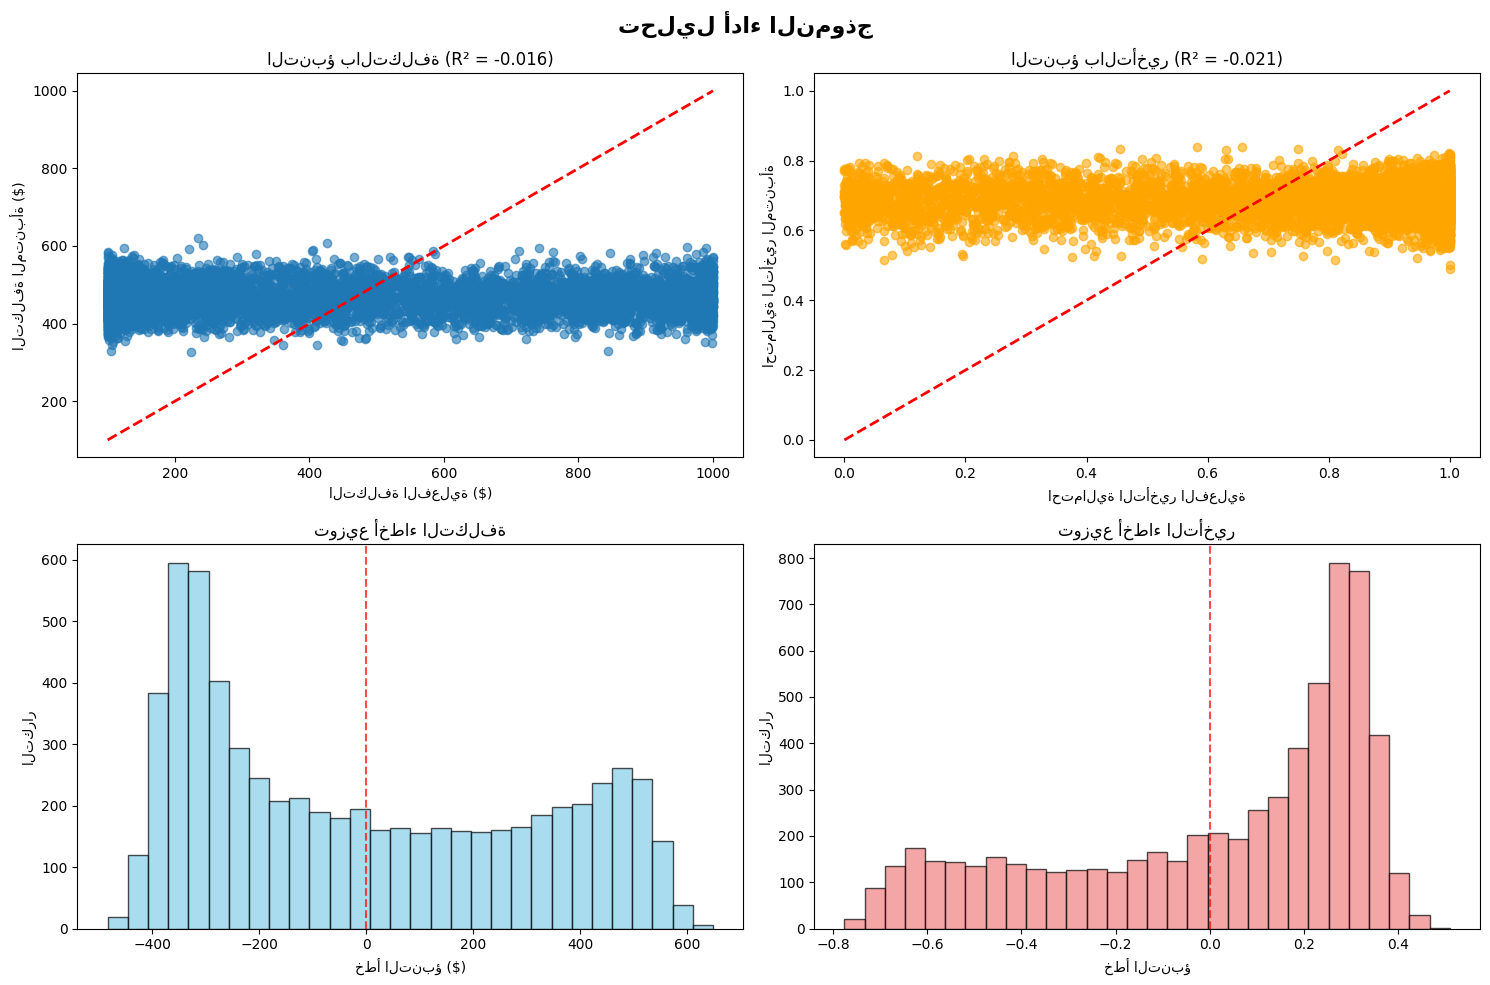

In [141]:
model.plot_results()


In [142]:
df = model.load_data()  # أو استخدم df الذي أنشأته من قبل
print(df.columns)


📂 جاري تحميل البيانات من: C:\New folder7\dynamic_supply_chain_logistics_dataset.xlsx
✅ تم تحميل 32065 سجل و 33 عمود
📊 أعمدة البيانات: ['shipping_date', 'vehicle_gps_latitude', 'vehicle_gps_longitude', 'fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status']...
📈 نطاق التكاليف: $100.00 - $1000.00
⏰ نطاق احتمالية التأخير: 0.000 - 1.000
Index(['shipping_date', 'vehicle_gps_latitude', 'vehicle_gps_longitude',
       'fuel_consumption_rate', 'eta_variation_hours',
       'traffic_congestion_level', 'warehouse_inventory_level',
       'loading_unloading_time', 'handling_equipment_availability',
       'order_fulfillment_status', 'weather_condition_severity',
       'port_congestion_level', 'shipping_costs', 'supplier_reliability_score',
       'lead_time_days', 'historical_demand', 'iot_temperature',
       'cargo_condition_status', 'route_risk_level', 'cus

In [143]:
df['recommended_transport_mode'] = df.apply(recommend_transport_mode, axis=1)


In [144]:
print(df[['delay_probability', 'fuel_consumption_rate', 'recommended_transport_mode']].head())


   delay_probability  fuel_consumption_rate recommended_transport_mode
0           0.767329               7.616507                      Truck
1           0.991436              14.612358                      Truck
2           0.983523              19.351193                      Truck
3           0.996039               6.991134                      Truck
4           0.677070               5.004165                      Truck


In [145]:
# ✅ إزالة القيم المفقودة في الأعمدة المهمة
df = df.dropna(subset=[
    'fuel_consumption_rate', 'delay_probability', 'delivery_time_deviation',
    'driver_behavior_score', 'fatigue_monitoring_score',
    'weather_condition_severity', 'route_risk_level'
])

# ✅ إنشاء عمود الهدف الأول: هل تحتاج إلى صيانة؟
df['needs_maintenance'] = (
    (df['fuel_consumption_rate'] > 12) |
    (df['delivery_time_deviation'] > 2) |
    (df['delay_probability'] > 0.7) |
    (df['driver_behavior_score'] < 0.4) |
    (df['fatigue_monitoring_score'] < 0.3)
).astype(int)

# ✅ إنشاء عمود الهدف الثاني: عدد الأيام المتوقعة للصيانة
np.random.seed(42)
df['maintenance_due_in_days'] = df['needs_maintenance'].apply(
    lambda x: np.random.randint(1, 5) if x == 1 else np.random.randint(6, 21)
)

# ✅ تحديد الميزات المستخدمة
features = [
    'fuel_consumption_rate',
    'delay_probability',
    'delivery_time_deviation',
    'driver_behavior_score',
    'fatigue_monitoring_score',
    'weather_condition_severity',
    'route_risk_level'
]

# ✅ تجهيز البيانات
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, r2_score, mean_absolute_error

X = df[features]
y_class = df['needs_maintenance']
y_reg = df['maintenance_due_in_days']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ تقسيم البيانات
X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X_scaled, y_class, y_reg, test_size=0.2, random_state=42
)

# ✅ نموذج التصنيف: هل تحتاج إلى صيانة؟
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train, y_class_train)
y_class_pred = clf_model.predict(X_test)
print("🔧 تقييم: الحاجة إلى الصيانة")
print(classification_report(y_class_test, y_class_pred))

# ✅ نموذج الانحدار: متى تحتاج إلى الصيانة؟
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train, y_reg_train)
y_reg_pred = reg_model.predict(X_test)
print("\n🕒 تقييم: عدد الأيام المتوقعة للصيانة")
print(f"R²: {r2_score(y_reg_test, y_reg_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_reg_test, y_reg_pred):.2f} يوم")

# ✅ التنبؤ لكافة البيانات
df['predicted_needs_maintenance'] = clf_model.predict(X_scaled)
df['predicted_days_to_maintenance'] = reg_model.predict(X_scaled).round().astype(int)

# ✅ حفظ النتائج النهائية
df.to_excel("predictive_maintenance_results.xlsx", index=False)
print("\n✅ تم إنشاء الملف: predictive_maintenance_results.xlsx")


🔧 تقييم: الحاجة إلى الصيانة
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       227
           1       1.00      1.00      1.00      6186

    accuracy                           1.00      6413
   macro avg       1.00      1.00      1.00      6413
weighted avg       1.00      1.00      1.00      6413


🕒 تقييم: عدد الأيام المتوقعة للصيانة
R²: 0.666
MAE: 1.09 يوم

✅ تم إنشاء الملف: predictive_maintenance_results.xlsx


In [146]:
# تحليل شامل للمخزون

# 1. وصف عام للمخزون
print("📦 تحليل وصفي لمستوى المخزون:")
print(df['warehouse_inventory_level'].describe())

# 2. تحديد العتبة للمخزون المنخفض (مثلاً أقل 25%)
low_stock_threshold = df['warehouse_inventory_level'].quantile(0.25)

# 3. إنشاء عمود لتصنيف حالة المخزون
df['Inventory_Status'] = df['warehouse_inventory_level'].apply(
    lambda x: 'Low' if x < low_stock_threshold else 'Normal'
)

# 4. تحليل تغير المخزون عبر الزمن
df['shipping_date'] = pd.to_datetime(df['shipping_date'])
df['ShippingMonth'] = df['shipping_date'].dt.to_period('M')

monthly_inventory = df.groupby('ShippingMonth')['warehouse_inventory_level'].mean()

print("\n📊 متوسط المخزون لكل شهر:")
print(monthly_inventory.tail())

# 5. حساب معدل دوران المخزون (إذا كان الطلب متاحًا)
if 'historical_demand' in df.columns:
    df['Inventory_Turnover'] = df['historical_demand'] / df['warehouse_inventory_level'].replace(0, 1)
    print("\n🔁 معدل دوران المخزون لعينة من السجلات:")
    print(df[['warehouse_inventory_level', 'historical_demand', 'Inventory_Turnover']].head())
else:
    print("\n❗لم يتم العثور على عمود historical_demand لحساب معدل دوران المخزون.")

# 6. حفظ نتائج التحليل في ملف Excel
df.to_excel("inventory_analysis_results.xlsx", index=False)
print("\n✅ تم حفظ نتائج تحليل المخزون في: inventory_analysis_results.xlsx")


📦 تحليل وصفي لمستوى المخزون:
count    3.206500e+04
mean     2.992547e+02
std      3.234435e+02
min      1.320000e-12
25%      1.605163e+01
50%      1.572880e+02
75%      5.405980e+02
max      9.999993e+02
Name: warehouse_inventory_level, dtype: float64

📊 متوسط المخزون لكل شهر:
ShippingMonth
2024-04    290.387853
2024-05    312.070889
2024-06    302.070650
2024-07    300.143703
2024-08    296.561029
Freq: M, Name: warehouse_inventory_level, dtype: float64

🔁 معدل دوران المخزون لعينة من السجلات:
   warehouse_inventory_level  historical_demand  Inventory_Turnover
0                  98.445686        6533.773452           66.369322
1                   0.319952        9305.585902        29084.357225
2                  10.373671        9388.170746          904.999838
3                  17.503770        7415.280748          423.639056
4                 418.847712        6506.040975           15.533190

✅ تم حفظ نتائج تحليل المخزون في: inventory_analysis_results.xlsx


In [147]:
# تحديد العتبة الحرجة للمخزون المنخفض (تم استخدامها سابقًا)
low_stock_threshold = df['warehouse_inventory_level'].quantile(0.25)

# إنشاء قائمة بالتنبيهات
alerts = []

# المرور على كل سجل وتوليد تنبيه إن كان المخزون منخفض
for index, row in df.iterrows():
    if row['warehouse_inventory_level'] < low_stock_threshold:
        alerts.append({
            "Date": row['shipping_date'],
            "Inventory Level": row['warehouse_inventory_level'],
 


_IncompleteInputError: incomplete input (3624659681.py, line 13)

In [148]:
# تأكد من الأعمدة المطلوبة
required_columns = ['recommended_transport_mode', 'delivery_time_deviation', 'shipping_costs', 'Route_Risk_Category']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"❌ الأعمدة التالية غير موجودة في البيانات: {missing_columns}")
else:
    # تحليل الأداء حسب نوع الناقل
    performance_summary = df.groupby('recommended_transport_mode').agg({
        'delivery_time_deviation': 'mean',
        'shipping_costs': 'mean',
        'Route_Risk_Category': lambda x: x.value_counts().idxmax()  # الأكثر تكرارًا كمؤشر للمخاطرة
    }).rename(columns={
        'delivery_time_deviation': 'Avg_Delay',
        'shipping_costs': 'Avg_Cost',
        'Route_Risk_Category': 'Most_Common_Risk_Level'
    })

    # عرض النتائج
    print("✅ تحليل الأداء حسب نوع الناقل:\n")
    print(performance_summary)

    # تصدير إلى ملف Excel
    performance_summary.to_excel("transport_mode_performance_summary.xlsx")
    print("\n📁 تم حفظ التقرير في ملف: transport_mode_performance_summary.xlsx")


✅ تحليل الأداء حسب نوع الناقل:

                            Avg_Delay    Avg_Cost Most_Common_Risk_Level
recommended_transport_mode                                              
Drone                        5.133056  460.337672                   High
Train                        5.156052  465.600909                    Low
Truck                        5.184283  459.151606                   High

📁 تم حفظ التقرير في ملف: transport_mode_performance_summary.xlsx


In [149]:
def recommend_action(row):
    # معايير مقبولة بناء على السوق الأمريكي
    delay_ok = row['Avg_Delay'] <= 5
    cost_ok = row['Avg_Cost'] <= 800
    risk_ok = row['Most_Common_Risk_Level'] in ['Low', 'Medium']

    if delay_ok and cost_ok and risk_ok:
        return "✅ موصى به"
    elif not delay_ok and not cost_ok and row['Most_Common_Risk_Level'] == 'High':
        return "❌ خطر مرتفع"
    else:
        return "⚠️ راجع الحالة"





In [150]:

performance_summary['Recommendation'] = performance_summary.apply(recommend_action, axis=1)

print("📌 التوصيات الواقعية حسب نوع الناقل:\n")
print(performance_summary[['Avg_Delay', 'Avg_Cost', 'Most_Common_Risk_Level', 'Recommendation']])




📌 التوصيات الواقعية حسب نوع الناقل:

                            Avg_Delay    Avg_Cost Most_Common_Risk_Level  \
recommended_transport_mode                                                 
Drone                        5.133056  460.337672                   High   
Train                        5.156052  465.600909                    Low   
Truck                        5.184283  459.151606                   High   

                            Recommendation  
recommended_transport_mode                  
Drone                       ⚠️ راجع الحالة  
Train                       ⚠️ راجع الحالة  
Truck                       ⚠️ راجع الحالة  


In [153]:
# دالة التوصية حسب المعايير الأمريكية
def recommend_action(row):
    delay_ok = row['Avg_Delay'] <= 6
    cost_ok = row['Avg_Cost'] <= 500
    risk_ok = row['Most_Common_Risk_Level'] == 'Low'

    if delay_ok and cost_ok and risk_ok:
        return '✅ موصى به'
    elif risk_ok and (delay_ok or cost_ok):
        return '⚠️ جيد بشروط'
    else:
        return '❌ غير موصى به'

# تطبيق التوصيات على جدول الأداء
performance_summary['Recommendation'] = performance_summary.apply(recommend_action, axis=1)

# عرض النتائج النهائية
print("📌 التوصيات حسب نوع الناقل:\n")
print(performance_summary[['Avg_Delay', 'Avg_Cost', 'Most_Common_Risk_Level', 'Recommendation']])


📌 التوصيات حسب نوع الناقل:

                            Avg_Delay    Avg_Cost Most_Common_Risk_Level  \
recommended_transport_mode                                                 
Drone                        5.133056  460.337672                   High   
Train                        5.156052  465.600909                    Low   
Truck                        5.184283  459.151606                   High   

                           Recommendation  
recommended_transport_mode                 
Drone                       ❌ غير موصى به  
Train                           ✅ موصى به  
Truck                       ❌ غير موصى به  


In [154]:
import numpy as np

# دالة لحساب المسافة بين نقطتين
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # نصف قطر الأرض بالكيلومتر
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)

    a = np.sin(dphi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c

# الموقع المرجعي (مركز توزيع مثلاً)
destination_lat = 40.7128
destination_lon = -74.0060

# إنشاء عمود المسافة
df['distance_km'] = df.apply(lambda row: haversine(
    row['vehicle_gps_latitude'],
    row['vehicle_gps_longitude'],
    destination_lat,
    destination_lon
), axis=1)


In [155]:
df[['distance_km']].head(10)


,distance_km
0,1745.534689
1,257.449874
2,913.170373
3,4225.858419
4,1971.308157
5,3718.230352
6,4079.451498
7,1242.050545
8,3069.340114
9,1185.827625


In [157]:


# نفترض أن df هو اسم DataFrame
df = df.reset_index(drop=True)

# تطبيع القيم (Normalize)
def normalize(series):
    return (series.max() - series) / (series.max() - series.min())

df['norm_cost'] = normalize(df['shipping_costs'])
df['norm_risk'] = normalize(df['route_risk_level'])
df['norm_delay'] = normalize(df['delay_probability'])

# حساب درجة التفضيل
df['score'] = (
    df['norm_cost'] * 0.4 +
    df['norm_risk'] * 0.35 +
    df['norm_delay'] * 0.25
)

# تحديد التوصية بناءً على المسافة والدرجة
def recommend_mode(row):
    if row['distance_km'] < 500:
        return 'Truck'
    elif 500 <= row['distance_km'] <= 1500:
        return 'Train'
    else:
        return 'Air'

df['recommended_mode'] = df.apply(recommend_mode, axis=1)

# دمج القرار النهائي بناءً على الأفضل في كل مجموعة ناقل
def choose_best(group):
    return group.loc[group['score'].idxmax()]

# الآن يمكن تجميع النتائج لو أردت الأفضل من كل نوع ناقل:
df_best = df.groupby('recommended_mode', group_keys=False).apply(choose_best).reset_index(drop=True)

# عرض النتائج
import pandas as pd
pd.set_option("display.max_columns", None)
display(df_best[['distance_km', 'shipping_costs', 'delay_probability', 'route_risk_level', 'recommended_mode', 'score']])


,distance_km,shipping_costs,delay_probability,route_risk_level,recommended_mode,score
0,3368.205961,103.280293,0.026179,0.108219,Air,0.988212
1,1283.736682,102.991263,0.008697,0.007462,Train,0.996238
2,111.536279,120.348353,0.048037,0.154518,Truck,0.973541


In [158]:
# تحويل تصنيفات المخاطر النصية إلى قيم رقمية
risk_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['route_risk_level_numeric'] = df['Route_Risk_Category'].map(risk_map)

# دالة التطبيع
def normalize_column(df, col):
    return (df[col].max() - df[col]) / (df[col].max() - df[col].min())

# تطبيق التطبيع على الأعمدة المطلوبة
df['shipping_costs_norm'] = normalize_column(df, 'shipping_costs')
df['route_risk_level_norm'] = normalize_column(df, 'route_risk_level_numeric')  # استخدم العمود الرقمي الجديد
df['delay_probability_norm'] = normalize_column(df, 'delay_probability')

# حساب التقييم النهائي
df['score'] = (
    0.4 * df['shipping_costs_norm'] +
    0.35 * df['route_risk_level_norm'] +
    0.25 * df['delay_probability_norm']
)

# عرض النتائج
pd.set_option('display.max_columns', None)
display(df[['distance_km', 'shipping_costs', 'delay_probability', 'Route_Risk_Category', 'score']])


,distance_km,shipping_costs,delay_probability,Route_Risk_Category,score
0,1745.534689,100.748611,0.767329,High,0.457835
1,257.449874,419.305453,0.991436,High,0.260227
2,913.170373,854.531851,0.983523,Low,0.418772
3,4225.858419,771.849401,0.996039,High,0.102390
4,1971.308157,788.924754,0.677070,Medium,0.349544
...,...,...,...,...,...
32060,2656.799033,659.099529,0.595739,High,0.252577
32061,1626.006677,872.566298,0.743352,High,0.120799
32062,3251.544774,813.057253,0.999995,High,0.083087
32063,850.387875,997.856464,0.000500,High,0.250828


In [159]:
df.columns = df.columns.str.strip()  # لإزالة أي مسافات غير ظاهرة


In [160]:
if 'distance_km' not in df.columns:
    raise ValueError("❌ العمود distance_km غير موجود، تأكد من إنشائه قبل تشغيل الكود.")


In [161]:


# تأكيد أن الأعمدة المطلوبة موجودة
required_cols = ['shipping_costs', 'delay_probability', 'route_risk_level', 'distance_km']
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"❌ العمود '{col}' غير موجود في البيانات!")

# حذف الصفوف التي بها قيم مفقودة في الأعمدة الهامة
df = df.dropna(subset=required_cols)

# التأكد من أن تقييم الخطر رقمي، إذا لم يكن كذلك (مثلاً نصي مثل "High")
if df['route_risk_level'].dtype == 'object':
    # قم بتحويل النصوص إلى قيم رقمية يدويًا
    risk_map = {'Low': 0, 'Medium': 0.5, 'High': 1}
    df['route_risk_level'] = df['route_risk_level'].map(risk_map)

# إذا بقيت قيم غير رقمية أو مفقودة، نحولها إلى NaN ثم نحذف الصفوف المتأثرة
df['route_risk_level'] = pd.to_numeric(df['route_risk_level'], errors='coerce')
df = df.dropna(subset=['route_risk_level'])

# تطبيع الأعمدة الثلاثة باستخدام MinMaxScaler
scaler = MinMaxScaler()
df[['norm_cost', 'norm_delay', 'norm_risk']] = scaler.fit_transform(
    df[['shipping_costs', 'delay_probability', 'route_risk_level']]
)

# دالة ذكية لاختيار وسيلة النقل المثالية
def choose_mode(row):
    if row['distance_km'] <= 100 and row['norm_cost'] < 0.4 and row['norm_delay'] < 0.4:
        return 'Drone'
    elif row['distance_km'] <= 700:
        return 'Truck'
    else:
        return 'Rail'

# حساب التقييم الذكي: كلما قل، كان الخيار أفضل
df['smart_score'] = df['norm_cost'] + df['norm_delay'] + df['norm_risk']

# تحديد أفضل وسيلة نقل لكل صف
df['best_transport'] = df.apply(choose_mode, axis=1)

# إظهار أفضل 5 خيارات ذات أقل smart_score
best_options = df.sort_values(by='smart_score').head(5)

# عرض النتائج المهمة فقط
print("\n✅ أفضل 5 طرق مفضلة بناءً على التقييم الذكي:")
print(best_options[['distance_km', 'shipping_costs', 'delay_probability', 'route_risk_level', 'smart_score', 'best_transport']])


NameError: name 'MinMaxScaler' is not defined

In [162]:
import joblib

# 2. حذف القيم الفارغة
df = df.dropna()

# 3. تحويل التصنيفات النصية إن وجدت
risk_map = {'Low': 0, 'Medium': 0.5, 'High': 1}
if 'route_risk_level' in df.columns and df['route_risk_level'].dtype == 'object':
    df['route_risk_level'] = df['route_risk_level'].map(risk_map)

# 4. تحديد العمود الهدف (مثلاً: delay_probability أو delivery_time_deviation)
target_column = 'delay_probability'

# 5. تحديد الميزات المدخلة
feature_cols = [
    'shipping_costs',
    'route_risk_level',
    'traffic_congestion_level',
    'weather_condition_severity',
    'distance_km',
    'fuel_consumption_rate',
    'driver_behavior_score',
    'fatigue_monitoring_score',
    'customs_clearance_time',
    'lead_time_days'
]

# 6. تجهيز البيانات
X = df[feature_cols]
y = (df[target_column] > 0.3).astype(int)  # ← تصنيف تأخير أو لا

# 7. تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. مقياس التوحيد
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 9. تدريب النموذج
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 10. تقييم النموذج
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# 11. حفظ النموذج
joblib.dump(model, 'smart_predictor_model.pkl')

# 12. حفظ الأعمدة المستخدمة
joblib.dump(feature_cols, 'feature_columns.pkl')

# 13. حفظ المقاييس
joblib.dump(scaler, 'scaler.pkl')

print("✅ تم حفظ النموذج والبيانات بنجاح.")


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1132
           1       0.82      1.00      0.90      5281

    accuracy                           0.82      6413
   macro avg       0.41      0.50      0.45      6413
weighted avg       0.68      0.82      0.74      6413

✅ تم حفظ النموذج والبيانات بنجاح.


In [163]:
import pandas as pd

# تحميل الملف
df = pd.read_csv("dynamic_supply_chain_logistics_dataset.csv")

# عرض أسماء الأعمدة
print("🧾 أسماء الأعمدة في الجدول:")
print(df.columns.tolist())



🧾 أسماء الأعمدة في الجدول:
['timestamp', 'vehicle_gps_latitude', 'vehicle_gps_longitude', 'fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status', 'weather_condition_severity', 'port_congestion_level', 'shipping_costs', 'supplier_reliability_score', 'lead_time_days', 'historical_demand', 'iot_temperature', 'cargo_condition_status', 'route_risk_level', 'customs_clearance_time', 'driver_behavior_score', 'fatigue_monitoring_score', 'disruption_likelihood_score', 'delay_probability', 'risk_classification', 'delivery_time_deviation']


In [164]:
import numpy as np

# دالة لحساب المسافة بين نقطتين بالإحداثيات
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # نصف قطر الأرض بالكيلومتر
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)

    a = np.sin(dphi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c

# الموقع المرجعي: جنوب كاليفورنيا (لوس أنجلوس)
destination_lat = 34.0522
destination_lon = -118.2437

# إنشاء عمود المسافة
df['distance_km'] = df.apply(lambda row: haversine(
    row['vehicle_gps_latitude'],
    row['vehicle_gps_longitude'],
    destination_lat,
    destination_lon
), axis=1)

# حفظ الملف الجديد بالمسافات
df.to_csv("full_data_with_distance.csv", index=False)
print("✅ تم إنشاء العمود distance_km بنجاح وحفظ الملف باسم full_data_with_distance.csv")


✅ تم إنشاء العمود distance_km بنجاح وحفظ الملف باسم full_data_with_distance.csv


In [165]:
import pandas as pd
import numpy as np

# تحميل البيانات
df = pd.read_csv('dynamic_supply_chain_logistics_dataset.csv')

# دالة لحساب المسافة بين نقطتين
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # نصف قطر الأرض بالكيلومتر
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# الموقع المرجعي: جنوب كاليفورنيا (لوس أنجلوس)
destination_lat = 34.0522
destination_lon = -118.2437

# إنشاء عمود المسافة
df['distance_km'] = df.apply(lambda row: haversine(
    row['vehicle_gps_latitude'],
    row['vehicle_gps_longitude'],
    destination_lat,
    destination_lon
), axis=1)

# تطبيع الأعمدة
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

df['norm_cost'] = normalize(df['shipping_costs'])
df['norm_delay'] = normalize(df['delay_probability'])
df['norm_risk'] = normalize(df['route_risk_level'])

# تقييم ذكي
df['smart_score'] = df['norm_cost'] + df['norm_delay'] + df['norm_risk']

# دالة التوصية حسب المسافة والتكلفة والمعايير الذكية
def recommend_mode(row):
    if row['distance_km'] <= 100:
        if row['norm_cost'] < 0.3 and row['norm_delay'] < 0.3:
            return 'Drone'
        else:
            return 'Truck'
    elif 100 < row['distance_km'] <= 700:
        return 'Truck'
    elif row['distance_km'] > 700 and row['norm_cost'] < 0.4:
        return 'Rail'
    else:
        return 'Air'

# إنشاء عمود التوصية
df['best_transport'] = df.apply(recommend_mode, axis=1)

# حفظ النتائج
df.to_csv('full_data_with_distance_and_transport.csv', index=False)
print("✅ تم حساب المسافة والتوصية بأفضل ناقل، والنتائج محفوظة في full_data_with_distance_and_transport.csv")


✅ تم حساب المسافة والتوصية بأفضل ناقل، والنتائج محفوظة في full_data_with_distance_and_transport.csv


In [167]:
# فقط تأكد أنك بالفعل أنشأت عمود distance_km في df
print(df[['timestamp', 'distance_km']].head())  # للاختبار فقط

# إذا لم يكن موجودًا، أنشئه بهذا الشكل (مرة واحدة فقط)
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

# مركز التوزيع في جنوب كاليفورنيا
destination_lat = 33.7701
destination_lon = -118.1937

# إنشاء العمود داخل df نفسه
df['distance_km'] = df.apply(lambda row: haversine(
    row['vehicle_gps_latitude'],
    row['vehicle_gps_longitude'],
    destination_lat,
    destination_lon
), axis=1)




       timestamp  distance_km
0  1/1/2021 0:00  3692.165289
1  1/1/2021 1:00   110.989719
2  1/1/2021 2:00  4044.780962
3  1/1/2021 3:00  4327.526465
4  1/1/2021 4:00  4527.446348


In [169]:
import pandas as pd
import joblib

# 🧠 تحميل النموذج والخصائص والمقياس
model = joblib.load('smart_predictor_model.pkl')
scaler = joblib.load('scaler.pkl')
feature_cols = joblib.load('feature_columns.pkl')

# 📄 تحميل البيانات الأصلية
df = pd.read_csv('dynamic_supply_chain_logistics_dataset.csv')

# ✅ حساب المسافة بناءً على إحداثيات GPS
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)

    a = np.sin(dphi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# ⚓ الإحداثيات المرجعية لميناء في جنوب كاليفورنيا
destination_lat = 33.7701
destination_lon = -118.1937

# 🧮 إنشاء عمود المسافة
df['distance_km'] = df.apply(lambda row: haversine(
    row['vehicle_gps_latitude'],
    row['vehicle_gps_longitude'],
    destination_lat,
    destination_lon
), axis=1)

# 🧹 تحديد المدخلات المطلوبة فقط
missing = [col for col in feature_cols if col not in df.columns]
if missing:
    raise ValueError(f"❌ الأعمدة التالية غير موجودة في البيانات: {missing}")

X = df[feature_cols]
X_scaled = scaler.transform(X)

# 🧠 تنفيذ التنبؤ
df['delay_risk_prediction'] = model.predict(X_scaled)

# ✅ حفظ النتائج الكاملة
df.to_csv('genius_predictions_results.csv', index=False)
print("✅ تم إنشاء الملف: genius_predictions_results.csv بكافة التوصيات الذكية.")


✅ تم إنشاء الملف: genius_predictions_results.csv بكافة التوصيات الذكية.


In [170]:
import pandas as pd

# تحميل ملف النتائج الذكية
df_results = pd.read_csv('genius_predictions_results.csv')

# عرض أول 10 صفوف من النتائج
print("📊 أول 10 نتائج من التوصيات الذكية:\n")
print(df_results.head(10))


📊 أول 10 نتائج من التوصيات الذكية:

       timestamp  vehicle_gps_latitude  vehicle_gps_longitude  \
0  1/1/2021 0:00             40.375568             -77.014318   
1  1/1/2021 1:00             33.507818            -117.036902   
2  1/1/2021 2:00             30.020640             -75.269224   
3  1/1/2021 3:00             36.649223             -70.190529   
4  1/1/2021 4:00             30.001279             -70.012195   
5  1/1/2021 5:00             47.864549            -119.998386   
6  1/1/2021 6:00             33.846390             -95.940118   
7  1/1/2021 7:00             32.601885            -102.316635   
8  1/1/2021 8:00             39.787194             -90.897918   
9  1/1/2021 9:00             47.728499            -113.413561   

   fuel_consumption_rate  eta_variation_hours  traffic_congestion_level  \
0               5.136512             4.998009                  5.927586   
1               5.101512             0.984929                  1.591992   
2               5.09080

In [173]:
# حساب عدد الشحنات لكل فئة من التنبؤ
counts = df['delay_risk_prediction'].value_counts()

# عرض النتائج
print("📊 إحصائيات التوصيلات حسب التنبؤ:")
print(f"🟢 شحنات سليمة (بدون تأخير): {counts.get(0, 0)}")
print(f"🔴 شحنات متوقعة بالتأخير: {counts.get(1, 0)}")


📊 إحصائيات التوصيلات حسب التنبؤ:
🟢 شحنات سليمة (بدون تأخير): 1436
🔴 شحنات متوقعة بالتأخير: 30629


In [174]:
def generate_recommendation(row):
    if row['delay_risk_prediction'] == 1:
        recs = []

        if row['traffic_congestion_level'] > 6:
            recs.append("📍 اختر وقت شحن خارج ساعات الذروة لتقليل الازدحام.")

        if row['weather_condition_severity'] > 5:
            recs.append("🌧️ راقب حالة الطقس وأجل الشحن إذا لزم الأمر.")

        if row['driver_behavior_score'] < 5:
            recs.append("🧑‍✈️ درّب السائقين لتحسين السلامة وتقليل التأخير.")

        if row['distance_km'] > 3000:
            recs.append("🗺️ جرّب استخدام مستودعات أقرب لتقليل المسافات.")

        if row['route_risk_level'] > 0.7:
            recs.append("⚠️ استخدم طرق بديلة أكثر أماناً.")

        if row['fuel_consumption_rate'] > 6:
            recs.append("⛽ راجع كفاءة الوقود لتقليل التكاليف.")

        return " | ".join(recs) if recs else "🔍 مراجعة عامة مطلوبة لتقليل التأخير."
    
    else:
        return "✅ الشحنة في المسار الصحيح ولا حاجة إلى إجراء."

# إنشاء عمود التوصيات
df['smart_recommendations'] = df.apply(generate_recommendation, axis=1)

# عرض أول 10 توصيات
df[['timestamp', 'delay_risk_prediction', 'smart_recommendations']].head(10)


,timestamp,delay_risk_prediction,smart_recommendations
0,1/1/2021 0:00,1,🧑‍✈️ درّب السائقين لتحسين السلامة وتقليل التأخ...
1,1/1/2021 1:00,1,🧑‍✈️ درّب السائقين لتحسين السلامة وتقليل التأخ...
2,1/1/2021 2:00,1,📍 اختر وقت شحن خارج ساعات الذروة لتقليل الازدح...
3,1/1/2021 3:00,1,🧑‍✈️ درّب السائقين لتحسين السلامة وتقليل التأخ...
4,1/1/2021 4:00,1,📍 اختر وقت شحن خارج ساعات الذروة لتقليل الازدح...
5,1/1/2021 5:00,1,🧑‍✈️ درّب السائقين لتحسين السلامة وتقليل التأخ...
6,1/1/2021 6:00,0,✅ الشحنة في المسار الصحيح ولا حاجة إلى إجراء.
7,1/1/2021 7:00,1,🧑‍✈️ درّب السائقين لتحسين السلامة وتقليل التأخ...
8,1/1/2021 8:00,0,✅ الشحنة في المسار الصحيح ولا حاجة إلى إجراء.
9,1/1/2021 9:00,1,📍 اختر وقت شحن خارج ساعات الذروة لتقليل الازدح...


In [175]:
# استيراد المكتبات
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# تحميل البيانات
df = pd.read_csv("dynamic_supply_chain_logistics_dataset.csv")

# إنشاء عمود المسافة بناءً على إحداثيات GPS
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda/2)**2
    return R * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))

# المركز المرجعي (جنوب كاليفورنيا)
ref_lat, ref_lon = 34.0522, -118.2437
df["distance_km"] = df.apply(lambda row: haversine(
    row["vehicle_gps_latitude"],
    row["vehicle_gps_longitude"],
    ref_lat,
    ref_lon
), axis=1)

# معالجة القيم الفارغة
df.dropna(subset=['delay_probability'], inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)

# المتغير الهدف
df["delayed"] = (df["delay_probability"] > 0.5).astype(int)

# اختيار المتغيرات المدخلة
features = df.select_dtypes(include=[np.number]).drop(columns=["delay_probability", "delayed"])
X = features
y = df["delayed"]

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تطبيع البيانات
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# تدريب النموذج
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# تقييم النموذج
y_pred = model.predict(X_test_scaled)
print("📊 تقرير الأداء:\n", classification_report(y_test, y_pred))
print("🧱 مصفوفة الالتباس:\n", confusion_matrix(y_test, y_pred))

# حفظ النموذج والخصائص
joblib.dump(model, "predict_model_1.pkl")
joblib.dump(scaler, "predict_scaler_1.pkl")
joblib.dump(X.columns.tolist(), "predict_features_1.pkl")

print("✅ تم تدريب النموذج الأول وحفظه بنجاح.")


📊 تقرير الأداء:
               precision    recall  f1-score   support

           0       0.27      0.00      0.00      1676
           1       0.74      1.00      0.85      4737

    accuracy                           0.74      6413
   macro avg       0.51      0.50      0.43      6413
weighted avg       0.62      0.74      0.63      6413

🧱 مصفوفة الالتباس:
 [[   3 1673]
 [   8 4729]]
✅ تم تدريب النموذج الأول وحفظه بنجاح.


In [176]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import joblib

# 🧠 تحميل البيانات (تأكد من تعديل المسار إن لزم)
df = pd.read_csv('dynamic_supply_chain_logistics_dataset.csv')

# 🛰️ إنشاء عمود المسافة distance_km إذا لم يكن موجوداً
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    phi1, phi2 = radians(lat1), radians(lat2)
    dphi = radians(lat2 - lat1)
    dlam = radians(lon2 - lon1)
    a = sin(dphi/2)**2 + cos(phi1) * cos(phi2) * sin(dlam/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

destination_lat = 33.7701  # جنوب كاليفورنيا
destination_lon = -118.1937

if 'distance_km' not in df.columns:
    df['distance_km'] = df.apply(lambda row: haversine(
        row['vehicle_gps_latitude'],
        row['vehicle_gps_longitude'],
        destination_lat,
        destination_lon
    ), axis=1)

# ✅ تحويل الهدف إلى تصنيف (0 أو 1) بدلاً من قيم مستمرة
df['delay_class'] = df['delay_probability'].apply(lambda x: 1 if x >= 0.5 else 0)

# ✅ اختيار الأعمدة المميزة
feature_cols = [
    'fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level',
    'warehouse_inventory_level', 'loading_unloading_time',
    'handling_equipment_availability', 'order_fulfillment_status',
    'weather_condition_severity', 'port_congestion_level', 'shipping_costs',
    'supplier_reliability_score', 'lead_time_days', 'historical_demand',
    'iot_temperature', 'cargo_condition_status', 'route_risk_level',
    'customs_clearance_time', 'driver_behavior_score', 'fatigue_monitoring_score',
    'disruption_likelihood_score', 'distance_km'
]

X = df[feature_cols]
y = df['delay_class']

# ⚖️ موازنة البيانات باستخدام SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# ⚙️ التقسيم والتدريب
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 📊 تقييم النموذج
y_pred = model.predict(X_test_scaled)
print("\n📈 تقرير الأداء:\n", classification_report(y_test, y_pred))
print("🧮 مصفوفة الالتباس:\n", confusion_matrix(y_test, y_pred))

# 💾 حفظ النموذج والمقاييس
joblib.dump(model, 'predict_model_2.pkl')
joblib.dump(scaler, 'predict_scaler_2.pkl')
joblib.dump(feature_cols, 'predict_features_2.pkl')
print("✅ تم حفظ النموذج الثاني والمقاييس بنجاح.")







📈 تقرير الأداء:
               precision    recall  f1-score   support

           0       0.84      0.66      0.74      4664
           1       0.72      0.88      0.79      4674

    accuracy                           0.77      9338
   macro avg       0.78      0.77      0.77      9338
weighted avg       0.78      0.77      0.77      9338

🧮 مصفوفة الالتباس:
 [[3082 1582]
 [ 584 4090]]
✅ تم حفظ النموذج الثاني والمقاييس بنجاح.


In [177]:
import os
import pandas as pd

# 🧠 1. البحث عن أي ملف يحتوي على كلمة 'distance' وينتهي بـ .csv
distance_file = None
for file in os.listdir():
    if 'distance' in file.lower() and file.endswith('.csv'):
        distance_file = file
        break

# ✅ 2. إذا تم العثور على الملف، نقوم بتحميله ودمجه
if distance_file:
    print(f"✅ تم العثور على ملف المسافات: {distance_file}")
    
    # قراءة ملف المسافات
    distance_df = pd.read_csv(distance_file)

    # التأكد من وجود العمودين المطلوبين
    if 'timestamp' in distance_df.columns and 'distance_km' in distance_df.columns:
        # دمج الملف مع df الرئيسي باستخدام العمود المشترك 'timestamp'
        df = df.merge(distance_df[['timestamp', 'distance_km']], on='timestamp', how='left')
        print("🚛 ✅ تم دمج عمود المسافات distance_km بنجاح.")
    else:
        print("⚠️ الملف لا يحتوي على الأعمدة المطلوبة: 'timestamp' و 'distance_km'")
else:
    print("❌ لم يتم العثور على ملف مسافات يحتوي على 'distance' في اسمه.")


✅ تم العثور على ملف المسافات: full_data_with_distance.csv
🚛 ✅ تم دمج عمود المسافات distance_km بنجاح.


In [178]:
print(df.columns)

Index(['timestamp', 'vehicle_gps_latitude', 'vehicle_gps_longitude',
       'fuel_consumption_rate', 'eta_variation_hours',
       'traffic_congestion_level', 'warehouse_inventory_level',
       'loading_unloading_time', 'handling_equipment_availability',
       'order_fulfillment_status', 'weather_condition_severity',
       'port_congestion_level', 'shipping_costs', 'supplier_reliability_score',
       'lead_time_days', 'historical_demand', 'iot_temperature',
       'cargo_condition_status', 'route_risk_level', 'customs_clearance_time',
       'driver_behavior_score', 'fatigue_monitoring_score',
       'disruption_likelihood_score', 'delay_probability',
       'risk_classification', 'delivery_time_deviation', 'distance_km_x',
       'delay_class', 'distance_km_y'],
      dtype='object')


In [179]:
# ✅ حدد تكلفة الشحن لكل كيلومتر (يمكنك تعديلها حسب المشروع)
cost_per_km = 0.5  # التكلفة لكل كيلومتر بالدولار

# ✅ إنشاء العمود الجديد لحساب التكلفة الكلية
df['estimated_total_cost'] = df['distance_km_x'] * cost_per_km

# ✅ عرض أول 5 نتائج للتأكد
print("📦 أول 5 شحنات وتكلفتها الكلية:")
print(df[['timestamp', 'distance_km_x', 'estimated_total_cost']].head())

# ✅ حفظ النتائج في ملف CSV
df.to_csv("shipping_with_total_cost.csv", index=False)
print("✅ تم حساب التكلفة الكلية وحفظها في الملف: shipping_with_total_cost.csv")


📦 أول 5 شحنات وتكلفتها الكلية:
       timestamp  distance_km_x  estimated_total_cost
0  1/1/2021 0:00    3692.165289           1846.082645
1  1/1/2021 1:00     110.989719             55.494859
2  1/1/2021 2:00    4044.780962           2022.390481
3  1/1/2021 3:00    4327.526465           2163.763232
4  1/1/2021 4:00    4527.446348           2263.723174
✅ تم حساب التكلفة الكلية وحفظها في الملف: shipping_with_total_cost.csv


In [180]:
# استيراد المكتبات
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# تحميل البيانات
df = pd.read_csv("full_data_with_distance.csv")

# تحويل العمود الهدف إلى 0 و 1 إذا لم يكن كذلك
df['delay_flag'] = df['delay_probability'].apply(lambda x: 1 if x >= 0.5 else 0)

# المتغيرات المدخلة
features = [
    'fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level',
    'warehouse_inventory_level', 'handling_equipment_availability', 'shipping_costs',
    'port_congestion_level', 'weather_condition_severity', 'route_risk_level',
    'driver_behavior_score', 'fatigue_monitoring_score', 'distance_km'
]

X = df[features]
y = df['delay_flag']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# توحيد القيم
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# تدريب النموذج
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# التقييم
y_pred = model.predict(X_test_scaled)
print("\nتقرير الأداء:\n", classification_report(y_test, y_pred))
print("\nمصوفة الالتباس:\n", confusion_matrix(y_test, y_pred))

# حفظ النموذج
joblib.dump(model, 'rf_model_1.pkl')
joblib.dump(scaler, 'rf_scaler_1.pkl')
joblib.dump(features, 'rf_features_1.pkl')

print("✅ تم تدريب النموذج الأول وحفظه بنجاح.")



تقرير الأداء:
               precision    recall  f1-score   support

           0       0.31      0.00      0.01      2546
           1       0.74      1.00      0.85      7074

    accuracy                           0.73      9620
   macro avg       0.52      0.50      0.43      9620
weighted avg       0.62      0.73      0.62      9620


مصوفة الالتباس:
 [[  12 2534]
 [  27 7047]]
✅ تم تدريب النموذج الأول وحفظه بنجاح.


In [181]:
# استيراد المكتبات
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import xgboost as xgb

# تحميل البيانات
df = pd.read_csv("full_data_with_distance.csv")

# إنشاء عمود الهدف: التأخير = 1، السليم = 0
df['delay_flag'] = df['delay_probability'].apply(lambda x: 1 if x >= 0.5 else 0)

# اختيار الخصائص
features = [
    'fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level',
    'warehouse_inventory_level', 'handling_equipment_availability', 'shipping_costs',
    'port_congestion_level', 'weather_condition_severity', 'route_risk_level',
    'driver_behavior_score', 'fatigue_monitoring_score', 'distance_km'
]

X = df[features]
y = df['delay_flag']

# تقسيم وتوحيد البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# تدريب النموذج
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_scaled, y_train)

# التقييم
y_pred = model.predict(X_test_scaled)
print("\nتقرير الأداء:\n", classification_report(y_test, y_pred))
print("\nمصوفة الالتباس:\n", confusion_matrix(y_test, y_pred))

# حفظ النموذج والمقاييس
joblib.dump(model, "xgb_model_2.pkl")
joblib.dump(scaler, "xgb_scaler_2.pkl")
joblib.dump(features, "xgb_features_2.pkl")

print("✅ تم تدريب النموذج الثاني (XGBoost) وحفظه بنجاح.")



تقرير الأداء:
               precision    recall  f1-score   support

           0       0.28      0.06      0.09      2546
           1       0.74      0.95      0.83      7074

    accuracy                           0.71      9620
   macro avg       0.51      0.50      0.46      9620
weighted avg       0.62      0.71      0.63      9620


مصوفة الالتباس:
 [[ 143 2403]
 [ 363 6711]]
✅ تم تدريب النموذج الثاني (XGBoost) وحفظه بنجاح.


In [183]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import joblib

# 1. تحميل البيانات وتهيئتها
df = pd.read_csv("full_data_with_distance.csv")

# تأكد من تحويل العمود الهدف إلى نوع صحيح
df['delay_probability'] = df['delay_probability'].astype(int)

# 2. اختيار الخصائص
feature_cols = [
    'traffic_congestion_level', 'weather_condition_severity', 'distance_km',
    'port_congestion_level', 'shipping_costs', 'supplier_reliability_score',
    'driver_behavior_score', 'fatigue_monitoring_score', 'route_risk_level',
    'delivery_time_deviation', 'fuel_consumption_rate'
]

X = df[feature_cols]
y = df['delay_probability']

# 3. تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. موازنة البيانات باستخدام SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 5. توحيد القيم
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# 6. بناء النموذج وتدريبه
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train_resampled)

# 7. التقييم
y_pred = model.predict(X_test_scaled)
print("\n📊 تقرير الأداء:")
print(classification_report(y_test, y_pred))

# 8. حفظ النموذج
joblib.dump(model, "predict_model_3.pkl")
joblib.dump(scaler, "predict_scaler_3.pkl")
joblib.dump(feature_cols, "predict_features_3.pkl")
print("\n✅ تم حفظ النموذج الثالث بنجاح.")



📊 تقرير الأداء:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6403
           1       0.00      0.00      0.00        10

    accuracy                           1.00      6413
   macro avg       0.50      0.50      0.50      6413
weighted avg       1.00      1.00      1.00      6413


✅ تم حفظ النموذج الثالث بنجاح.


In [184]:
# استيراد المكتبات
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import joblib

# 1. تحميل البيانات
df = pd.read_csv("full_data_with_distance.csv")

# 2. معالجة القيم النصية
categorical_cols = ['risk_classification']  # أضف أي أعمدة نصية أخرى هنا
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# 3. تحديد الأعمدة المدخلة والهدف
feature_cols = [
    'fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level',
    'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability',
    'order_fulfillment_status', 'weather_condition_severity', 'port_congestion_level',
    'shipping_costs', 'supplier_reliability_score', 'lead_time_days',
    'historical_demand', 'iot_temperature', 'cargo_condition_status', 'route_risk_level',
    'customs_clearance_time', 'driver_behavior_score', 'fatigue_monitoring_score',
    'disruption_likelihood_score', 'distance_km', 'risk_classification'
]

target_col = 'delay_probability'

# 4. حذف الصفوف التي تحتوي على قيم ناقصة
df = df[feature_cols + [target_col]].dropna()

# 5. تقسيم البيانات
X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. مقياس التحجيم
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. إنشاء النموذج والتدريب
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 8. التقييم
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"🔍 تقييم النموذج:")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

# 9. حفظ النموذج
joblib.dump(model, "delay_prob_model.pkl")
joblib.dump(scaler, "delay_prob_scaler.pkl")
joblib.dump(feature_cols, "delay_prob_features.pkl")

print("✅ تم حفظ النموذج بنجاح.")



🔍 تقييم النموذج:
Root Mean Squared Error (RMSE): 0.3398
R2 Score: -0.1188
✅ تم حفظ النموذج بنجاح.


In [186]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# تحميل البيانات
df = pd.read_csv("full_data_with_distance.csv")

# حذف الأعمدة غير الرقمية أو تحويلها
df = df.drop(columns=['timestamp', 'vehicle_gps_latitude', 'vehicle_gps_longitude'])

# تحويل الأعمدة النوعية إلى أرقام (إن وُجدت)
df = pd.get_dummies(df)

# تحديد الأعمدة
target_col = 'delay_probability'
feature_cols = df.columns.drop(target_col)

# أخذ عينة صغيرة للتدريب السريع
X_sample = df[feature_cols].sample(n=3000, random_state=42)
y_sample = df[target_col].loc[X_sample.index]

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# مقياس الميزات
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# تدريب النموذج
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train_scaled, y_train)

# التنبؤ
y_pred = model.predict(X_test_scaled)

# التقييم
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("✅ تقييم النموذج:")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")
print("✅ تم تدريب النموذج الخامس بنجاح")

# حفظ النموذج والمحول وخصائص البيانات
joblib.dump(model, "final_model_5.pkl")
joblib.dump(scaler, "final_scaler_5.pkl")
joblib.dump(feature_cols.tolist(), "final_features_5.pkl")



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


✅ تقييم النموذج:
Root Mean Squared Error (RMSE): 0.3263
R2 Score: -0.0316
✅ تم تدريب النموذج الخامس بنجاح


['final_features_5.pkl']

In [187]:
import pandas as pd
import joblib

# تحميل البيانات المعدلة (سيناريو تدريب السائقين)
df_scenario = df.copy()
df_scenario['driver_behavior_score'] = df_scenario['driver_behavior_score'].astype(float) + 2
df_scenario['fatigue_monitoring_score'] = df_scenario['fatigue_monitoring_score'].astype(float) + 2

# توحيد اسم عمود distance
if 'distance_km_x' in df_scenario.columns:
    df_scenario.rename(columns={'distance_km_x': 'distance_km'}, inplace=True)
elif 'distance_km_y' in df_scenario.columns:
    df_scenario.rename(columns={'distance_km_y': 'distance_km'}, inplace=True)

# تحميل النموذج والخطوات السابقة
model = joblib.load("final_model_5.pkl")
scaler = joblib.load("final_scaler_5.pkl")
feature_cols = joblib.load("final_features_5.pkl")

# تحجيم البيانات
X_new = scaler.transform(df_scenario[feature_cols])

# التنبؤ
y_pred = model.predict(X_new)
df_scenario['predicted_delay_probability'] = y_pred

# حساب التكلفة الجديدة بناءً على distance
cost_per_km = 0.5
df_scenario['estimated_total_cost'] = df_scenario['distance_km'].astype(float) * cost_per_km

# عرض النتائج الأولى
print(df_scenario[['driver_behavior_score', 'fatigue_monitoring_score', 'distance_km', 'predicted_delay_probability', 'estimated_total_cost']].head())



   driver_behavior_score  fatigue_monitoring_score  distance_km  \
0               2.033843                  2.978599  3683.907741   
1               2.201725                  2.918586   126.901622   
2               2.264045                  2.394215  4046.110716   
3               2.362885                  2.905444  4322.116237   
4               2.016957                  2.258702  4527.542614   

   predicted_delay_probability  estimated_total_cost  
0                     0.574408           1841.953871  
1                     0.644886             63.450811  
2                     0.661974           2023.055358  
3                     0.591713           2161.058119  
4                     0.564174           2263.771307  


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [188]:
print(df_scenario.columns)


Index(['fuel_consumption_rate', 'eta_variation_hours',
       'traffic_congestion_level', 'warehouse_inventory_level',
       'loading_unloading_time', 'handling_equipment_availability',
       'order_fulfillment_status', 'weather_condition_severity',
       'port_congestion_level', 'shipping_costs', 'supplier_reliability_score',
       'lead_time_days', 'historical_demand', 'iot_temperature',
       'cargo_condition_status', 'route_risk_level', 'customs_clearance_time',
       'driver_behavior_score', 'fatigue_monitoring_score',
       'disruption_likelihood_score', 'delay_probability',
       'delivery_time_deviation', 'distance_km',
       'risk_classification_High Risk', 'risk_classification_Low Risk',
       'risk_classification_Moderate Risk', 'predicted_delay_probability',
       'estimated_total_cost'],
      dtype='object')


In [191]:
import pandas as pd
import joblib

# تحميل البيانات
df_scenario = pd.read_csv("full_data_with_distance.csv")

# تحسين سلوك السائقين بنسبة 10%
df_scenario['driver_behavior_score'] = df_scenario['driver_behavior_score'].astype(float) * 1.1

# التأكد أن القيم لا تتجاوز 100
df_scenario['driver_behavior_score'] = df_scenario['driver_behavior_score'].clip(upper=100)

# تحميل النموذج والمحول والمميزات
model = joblib.load("predict_model_2.pkl")
scaler = joblib.load("predict_scaler_2.pkl")
feature_cols = joblib.load("predict_features_2.pkl")

# تجهيز البيانات للتنبؤ
X_scenario = df_scenario[feature_cols]
X_scaled = scaler.transform(X_scenario)

# التنبؤ
predictions = model.predict(X_scaled)

# عرض النتائج
df_scenario['predicted_delay'] = predictions
print("✅ تم التنبؤ بنجاح بعد تحسين سلوك السائقين")
print("متوسط احتمال التأخير بعد التحسين:", predictions.mean())

# عرض أول 5 نتائج كمثال
print(df_scenario[['driver_behavior_score', 'predicted_delay']].head())


✅ تم التنبؤ بنجاح بعد تحسين سلوك السائقين
متوسط احتمال التأخير بعد التحسين: 0.7536878216123499
   driver_behavior_score  predicted_delay
0               0.037228                1
1               0.221898                0
2               0.290449                1
3               0.399174                0
4               0.018653                1


In [190]:
import pandas as pd
import numpy as np
import joblib

# تحميل النموذج والمحول والخصائص
model = joblib.load("predict_model_2.pkl")
scaler = joblib.load("predict_scaler_2.pkl")
feature_cols = joblib.load("predict_features_2.pkl")

# تحميل البيانات الأصلية
df_original = pd.read_csv("full_data_with_distance.csv")

# معالجة البيانات الأصلية (قبل التحسين)
X_original = df_original[feature_cols]
X_original_scaled = scaler.transform(X_original)
original_predictions = model.predict(X_original_scaled)

# حساب متوسط التأخير قبل التحسين
mean_delay_before = np.mean(original_predictions)

# إنشاء نسخة لتحسين سلوك السائقين
df_scenario = df_original.copy()

# تحويل السلوك إلى float ثم تحسينه بنسبة 10% مع ضبط الحد الأعلى على 1.0
df_scenario['driver_behavior_score'] = df_scenario['driver_behavior_score'].astype(float)
df_scenario['driver_behavior_score'] = (df_scenario['driver_behavior_score'] * 1.1).clip(upper=1.0)

# معالجة البيانات بعد تحسين السلوك
X_scenario = df_scenario[feature_cols]
X_scenario_scaled = scaler.transform(X_scenario)
scenario_predictions = model.predict(X_scenario_scaled)

# إضافة التوقعات إلى السيناريو
df_scenario['predicted_delay'] = scenario_predictions

# حساب متوسط التأخير بعد التحسين
mean_delay_after = np.mean(scenario_predictions)

# طباعة المقارنة
print("📊 متوسط احتمال التأخير قبل التحسين:", mean_delay_before)
print("✅ متوسط احتمال التأخير بعد التحسين:", mean_delay_after)
print("🔻 الفرق في التأخير:", mean_delay_before - mean_delay_after)

# عرض أول 5 نتائج للمقارنة
print("\nعرض أول 5 نتائج كمثال:")
print(df_scenario[['driver_behavior_score', 'predicted_delay']].head())


📊 متوسط احتمال التأخير قبل التحسين: 0.7515983159207859
✅ متوسط احتمال التأخير بعد التحسين: 0.7536878216123499
🔻 الفرق في التأخير: -0.0020895056915640753

عرض أول 5 نتائج كمثال:
   driver_behavior_score  predicted_delay
0               0.037228                1
1               0.221898                0
2               0.290449                1
3               0.399174                0
4               0.018653                1


In [192]:
# استيراد المكتبات
import pandas as pd
import numpy as np
import joblib
from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# تحميل البيانات
df = pd.read_csv("full_data_with_distance.csv")
df.dropna(inplace=True)

# الميزات
features = [
    'traffic_congestion_level',
    'driver_behavior_score',
    'fatigue_monitoring_score',
    'route_risk_level',
    'port_congestion_level',
    'weather_condition_severity',
    'distance_km'
]

# المتغير الهدف
target = 'delay_probability'

# تجهيز البيانات
X = df[features]
y = df[target]

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# مقياس
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# نموذج XGBoost
model = XGBRegressor(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42
)

# تدريب
model.fit(X_train_scaled, y_train)

# تنبؤ
y_pred = model.predict(X_test_scaled)

# تقييم
rmse = sqrt(mean_squared_error(y_test, y_pred))  # ← الحل هنا
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ R2 Score: {r2:.4f}")

# حفظ النموذج
joblib.dump(model, "final_sensitive_model.pkl")
joblib.dump(scaler, "final_sensitive_scaler.pkl")
joblib.dump(features, "final_sensitive_features.pkl")


✅ RMSE: 0.3239
✅ R2 Score: -0.0164


['final_sensitive_features.pkl']

In [193]:
import pandas as pd
import joblib

# تحميل البيانات الأصلية
df_scenario = pd.read_csv("full_data_with_distance.csv")
df_scenario.dropna(inplace=True)

# تحميل النموذج والمعالج والميزات
model = joblib.load("final_sensitive_model.pkl")
scaler = joblib.load("final_sensitive_scaler.pkl")
features = joblib.load("final_sensitive_features.pkl")

# نسخة من البيانات لسيناريو تقليل الازدحام المروري
df_whatif = df_scenario.copy()
df_whatif['traffic_congestion_level'] = df_whatif['traffic_congestion_level'] * 0.7  # تقليل بنسبة 30%

# تجهيز البيانات الأصلية
X_base = scaler.transform(df_scenario[features])
base_predictions = model.predict(X_base)
df_scenario['predicted_delay_base'] = base_predictions

# تجهيز بيانات السيناريو المحسن
X_whatif = scaler.transform(df_whatif[features])
whatif_predictions = model.predict(X_whatif)
df_whatif['predicted_delay_whatif'] = whatif_predictions

# مقارنة المتوسطات
base_mean = df_scenario['predicted_delay_base'].mean()
whatif_mean = df_whatif['predicted_delay_whatif'].mean()
difference = base_mean - whatif_mean

# طباعة النتائج
print(f"📊 متوسط التأخير قبل تقليل الازدحام: {base_mean:.4f}")
print(f"📉 متوسط التأخير بعد تقليل الازدحام: {whatif_mean:.4f}")
print(f"✅ الفرق في التأخير: {difference:.4f} (انخفاض = تحسن)")

# عرض أول 5 نتائج للمقارنة
comparison_df = pd.DataFrame({
    'traffic_congestion_level': df_scenario['traffic_congestion_level'].head(),
    'predicted_delay_base': df_scenario['predicted_delay_base'].head(),
    'predicted_delay_whatif': df_whatif['predicted_delay_whatif'].head()
})

print("\n📋 أول 5 نتائج مقارنة:")
print(comparison_df)


📊 متوسط التأخير قبل تقليل الازدحام: 0.6979
📉 متوسط التأخير بعد تقليل الازدحام: 0.6986
✅ الفرق في التأخير: -0.0007 (انخفاض = تحسن)

📋 أول 5 نتائج مقارنة:
   traffic_congestion_level  predicted_delay_base  predicted_delay_whatif
0                  5.927586              0.738807                0.746025
1                  1.591992              0.699645                0.696900
2                  8.787765              0.681741                0.664664
3                  0.045257              0.653901                0.646147
4                  8.004851              0.789591                0.797101


In [194]:
import pandas as pd
import joblib

# تحميل النموذج والمحولات
model = joblib.load("final_sensitive_model.pkl")
scaler = joblib.load("final_sensitive_scaler.pkl")
features = joblib.load("final_sensitive_features.pkl")

# قراءة البيانات الأصلية
df = pd.read_csv("full_data_with_distance.csv")

# إنشاء نسخة للمقارنة
df_scenario = df.copy()

# ➤ افتراض تكاليف النقل بالكيلومتر (يمكنك تعديلها حسب البيانات الحقيقية)
cost_per_km_road = 1.2     # نقل بري
cost_per_km_train = 0.8    # نقل بالقطار
cost_per_km_drone = 2.5    # نقل بالدرون (أغلى لأنه سريع ومحدود الحمولة)

# ➤ حساب التكلفة بناءً على المسافة
df_scenario['cost_road'] = df_scenario['distance_km'] * cost_per_km_road
df_scenario['cost_train'] = df_scenario['distance_km'] * cost_per_km_train
df_scenario['cost_drone'] = df_scenario['distance_km'] * cost_per_km_drone

# ➤ إعداد بيانات الإدخال للنموذج (نفس الأعمدة)
X_scaled = scaler.transform(df_scenario[features])
predicted_delay = model.predict(X_scaled)

# ➤ إضافة التنبؤ الأساسي
df_scenario["predicted_delay_base"] = predicted_delay

# ➤ سيناريو القطار:
df_train = df_scenario.copy()
df_train['traffic_congestion_level'] = df_train['traffic_congestion_level'] * 0.5  # يفترض زحام أقل بالقطار
X_train_scaled = scaler.transform(df_train[features])
df_train['predicted_delay_train'] = model.predict(X_train_scaled)

# ➤ سيناريو الدرون:
df_drone = df_scenario.copy()
df_drone['traffic_congestion_level'] = 0  # الدرون لا يتأثر بالزحام
df_drone['handling_equipment_availability'] = 1  # تجهيز سريع
X_drone_scaled = scaler.transform(df_drone[features])
df_drone['predicted_delay_drone'] = model.predict(X_drone_scaled)

# ➤ إنشاء مقارنة شاملة
comparison_df = pd.DataFrame({
    "distance_km": df_scenario["distance_km"],
    "predicted_delay_road": df_scenario["predicted_delay_base"],
    "predicted_delay_train": df_train["predicted_delay_train"],
    "predicted_delay_drone": df_drone["predicted_delay_drone"],
    "cost_road": df_scenario["cost_road"],
    "cost_train": df_scenario["cost_train"],
    "cost_drone": df_scenario["cost_drone"]
})

# ➤ حساب المتوسطات
avg_road_delay = comparison_df["predicted_delay_road"].mean()
avg_train_delay = comparison_df["predicted_delay_train"].mean()
avg_drone_delay = comparison_df["predicted_delay_drone"].mean()

avg_road_cost = comparison_df["cost_road"].mean()
avg_train_cost = comparison_df["cost_train"].mean()
avg_drone_cost = comparison_df["cost_drone"].mean()

# ➤ طباعة مقارنة الأداء
print("\n📊 متوسطات التأخير والتكلفة حسب وسيلة النقل:")
print(f"🚚 البري - تأخير: {avg_road_delay:.4f}, تكلفة: {avg_road_cost:.2f}")
print(f"🚆 القطار - تأخير: {avg_train_delay:.4f}, تكلفة: {avg_train_cost:.2f}")
print(f"🚁 الدرون - تأخير: {avg_drone_delay:.4f}, تكلفة: {avg_drone_cost:.2f}")

# ➤ عرض أول 5 نتائج مقارنة
print("\n📋 أول 5 نتائج مقارنة:")
print(comparison_df.head())



📊 متوسطات التأخير والتكلفة حسب وسيلة النقل:
🚚 البري - تأخير: 0.6979, تكلفة: 3287.23
🚆 القطار - تأخير: 0.6984, تكلفة: 2191.49
🚁 الدرون - تأخير: 0.6504, تكلفة: 6848.40

📋 أول 5 نتائج مقارنة:
   distance_km  predicted_delay_road  predicted_delay_train  \
0  3683.907741              0.738807               0.746559   
1   126.901622              0.699645               0.690028   
2  4046.110716              0.681741               0.668792   
3  4322.116237              0.653901               0.653949   
4  4527.542614              0.789591               0.786648   

   predicted_delay_drone    cost_road   cost_train    cost_drone  
0               0.591848  4420.689290  2947.126193   9209.769354  
1               0.573200   152.281947   101.521298    317.254055  
2               0.654225  4855.332859  3236.888573  10115.276790  
3               0.627189  5186.539485  3457.692990  10805.290593  
4               0.598935  5433.051137  3622.034091  11318.856535  


In [195]:

import joblib
import pickle
import os
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler

class ModelManager:
    """
    فئة لإدارة حفظ وتحميل نماذج التعلم الآلي
    """
    
    def __init__(self, models_directory="saved_models"):
        """
        تهيئة مدير النماذج
        
        Args:
            models_directory (str): مجلد حفظ النماذج
        """
        self.models_directory = models_directory
        self.create_models_directory()
    
    def create_models_directory(self):
        """إنشاء مجلد النماذج إذا لم يكن موجوداً"""
        if not os.path.exists(self.models_directory):
            os.makedirs(self.models_directory)
            print(f"تم إنشاء مجلد النماذج: {self.models_directory}")
    
    def save_model_joblib(self, model, model_name, additional_info=None):
        """
        حفظ النموذج باستخدام joblib (الطريقة المفضلة لـ scikit-learn)
        
        Args:
            model: النموذج المدرب
            model_name (str): اسم النموذج
            additional_info (dict): معلومات إضافية عن النموذج
        
        Returns:
            str: مسار الملف المحفوظ
        """
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"{model_name}_{timestamp}.joblib"
        filepath = os.path.join(self.models_directory, filename)
        
        # حفظ النموذج
        joblib.dump(model, filepath)
        
        # حفظ المعلومات الإضافية إذا تم توفيرها
        if additional_info:
            info_filename = f"{model_name}_{timestamp}_info.joblib"
            info_filepath = os.path.join(self.models_directory, info_filename)
            joblib.dump(additional_info, info_filepath)
            print(f"تم حفظ معلومات النموذج في: {info_filepath}")
        
        print(f"تم حفظ النموذج بنجاح في: {filepath}")
        return filepath
    
    def save_model_pickle(self, model, model_name, additional_info=None):
        """
        حفظ النموذج باستخدام pickle
        
        Args:
            model: النموذج المدرب
            model_name (str): اسم النموذج
            additional_info (dict): معلومات إضافية عن النموذج
        
        Returns:
            str: مسار الملف المحفوظ
        """
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"{model_name}_{timestamp}.pkl"
        filepath = os.path.join(self.models_directory, filename)
        
        # حفظ النموذج
        with open(filepath, 'wb') as file:
            pickle.dump(model, file)
        
        # حفظ المعلومات الإضافية إذا تم توفيرها
        if additional_info:
            info_filename = f"{model_name}_{timestamp}_info.pkl"
            info_filepath = os.path.join(self.models_directory, info_filename)
            with open(info_filepath, 'wb') as file:
                pickle.dump(additional_info, file)
            print(f"تم حفظ معلومات النموذج في: {info_filepath}")
        
        print(f"تم حفظ النموذج بنجاح في: {filepath}")
        return filepath
    
    def load_model_joblib(self, filepath):
        """
        تحميل النموذج من ملف joblib
        
        Args:
            filepath (str): مسار الملف
        
        Returns:
            النموذج المحمل
        """
        if not os.path.exists(filepath):
            raise FileNotFoundError(f"الملف غير موجود: {filepath}")
        
        model = joblib.load(filepath)
        print(f"تم تحميل النموذج بنجاح من: {filepath}")
        return model
    
    def load_model_pickle(self, filepath):
        """
        تحميل النموذج من ملف pickle
        
        Args:
            filepath (str): مسار الملف
        
        Returns:
            النموذج المحمل
        """
        if not os.path.exists(filepath):
            raise FileNotFoundError(f"الملف غير موجود: {filepath}")
        
        with open(filepath, 'rb') as file:
            model = pickle.load(file)
        
        print(f"تم تحميل النموذج بنجاح من: {filepath}")
        return model
    
    def list_saved_models(self):
        """
        عرض قائمة بجميع النماذج المحفوظة
        
        Returns:
            list: قائمة بأسماء الملفات
        """
        if not os.path.exists(self.models_directory):
            print("مجلد النماذج غير موجود")
            return []
        
        files = [f for f in os.listdir(self.models_directory) 
                if f.endswith(('.joblib', '.pkl'))]
        
        if files:
            print("النماذج المحفوظة:")
            for i, file in enumerate(files, 1):
                print(f"{i}. {file}")
        else:
            print("لا توجد نماذج محفوظة")
        
        return files

def train_classification_example():
    """
    مثال على تدريب نموذج تصنيف
    
    Returns:
        tuple: (النموذج المدرب, بيانات الاختبار, التسميات الحقيقية, معلومات النموذج)
    """
    print("=== مثال تدريب نموذج التصنيف ===")
    
    # إنشاء بيانات وهمية للتصنيف
    X, y = make_classification(
        n_samples=1000, 
        n_features=20, 
        n_informative=10, 
        n_redundant=5, 
        n_classes=3,
        random_state=42
    )
    
    # تقسيم البيانات
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # تطبيق التطبيع
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # تدريب النموذج
    model = RandomForestClassifier(
        n_estimators=100, 
        random_state=42, 
        max_depth=10
    )
    model.fit(X_train_scaled, y_train)
    
    # تقييم النموذج
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"دقة النموذج: {accuracy:.4f}")
    print("\nتقرير التصنيف:")
    print(classification_report(y_test, y_pred))
    
    # معلومات إضافية عن النموذج
    model_info = {
        'model_type': 'RandomForestClassifier',
        'accuracy': accuracy,
        'n_features': X.shape[1],
        'n_classes': len(np.unique(y)),
        'training_date': datetime.now().isoformat(),
        'scaler': scaler,
        'feature_names': [f'feature_{i}' for i in range(X.shape[1])]
    }
    
    return model, X_test_scaled, y_test, model_info

def train_regression_example():
    """
    مثال على تدريب نموذج انحدار
    
    Returns:
        tuple: (النموذج المدرب, بيانات الاختبار, القيم الحقيقية, معلومات النموذج)
    """
    print("=== مثال تدريب نموذج الانحدار ===")
    
    # إنشاء بيانات وهمية للانحدار
    X, y = make_regression(
        n_samples=1000, 
        n_features=15, 
        n_informative=10, 
        noise=0.1,
        random_state=42
    )
    
    # تقسيم البيانات
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # تطبيق التطبيع
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # تدريب النموذج
    model = RandomForestRegressor(
        n_estimators=100, 
        random_state=42, 
        max_depth=10
    )
    model.fit(X_train_scaled, y_train)
    
    # تقييم النموذج
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"متوسط مربع الخطأ (MSE): {mse:.4f}")
    print(f"معامل التحديد (R²): {r2:.4f}")
    
    # معلومات إضافية عن النموذج
    model_info = {
        'model_type': 'RandomForestRegressor',
        'mse': mse,
        'r2_score': r2,
        'n_features': X.shape[1],
        'training_date': datetime.now().isoformat(),
        'scaler': scaler,
        'feature_names': [f'feature_{i}' for i in range(X.shape[1])]
    }
    
    return model, X_test_scaled, y_test, model_info

# مثال على الاستخدام
if __name__ == "__main__":
    # إنشاء مدير النماذج
    model_manager = ModelManager()
    
    # تدريب وحفظ نموذج التصنيف
    print("تدريب نموذج التصنيف...")
    clf_model, X_test_clf, y_test_clf, clf_info = train_classification_example()
    
    # حفظ نموذج التصنيف
    clf_path = model_manager.save_model_joblib(
        clf_model, 
        "classification_model", 
        clf_info
    )
    
    print("\n" + "="*50 + "\n")
    
    # تدريب وحفظ نموذج الانحدار
    print("تدريب نموذج الانحدار...")
    reg_model, X_test_reg, y_test_reg, reg_info = train_regression_example()
    
    # حفظ نموذج الانحدار
    reg_path = model_manager.save_model_joblib(
        reg_model, 
        "regression_model", 
        reg_info
    )
    
    print("\n" + "="*50 + "\n")
    
    # عرض النماذج المحفوظة
    model_manager.list_saved_models()



تدريب نموذج التصنيف...
=== مثال تدريب نموذج التصنيف ===
دقة النموذج: 0.7850

تقرير التصنيف:
              precision    recall  f1-score   support

           0       0.71      0.70      0.70        66
           1       0.75      0.88      0.81        67
           2       0.93      0.78      0.85        67

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.79       200
weighted avg       0.79      0.79      0.79       200

تم حفظ معلومات النموذج في: saved_models\classification_model_20250802_143859_info.joblib
تم حفظ النموذج بنجاح في: saved_models\classification_model_20250802_143859.joblib


تدريب نموذج الانحدار...
=== مثال تدريب نموذج الانحدار ===
متوسط مربع الخطأ (MSE): 4082.2613
معامل التحديد (R²): 0.8255
تم حفظ معلومات النموذج في: saved_models\regression_model_20250802_143900_info.joblib
تم حفظ النموذج بنجاح في: saved_models\regression_model_20250802_143900.joblib


النماذج المحفوظة:
1. classification_model_20250730_144405.joblib
2. cl

In [196]:
print("🔍 محتويات model_info:")
for key in model_info:
    print("-", key)


🔍 محتويات model_info:
- model_type
- training_date
- target
- scaler
- feature_names
- mse
- r2


In [197]:
import pandas as pd
import numpy as np
import joblib

# تحميل النموذج والمعلومات
model = joblib.load("saved_models/regression_model_20250801_034039.joblib")
model_info = joblib.load("saved_models/regression_model_20250801_034039_info.joblib")

scaler = model_info['scaler']
feature_names = model_info['feature_names']

# تعريف السيناريوهات الاحتمالية
scenarios = [
    {
        "distance_km": 120,
        "mode": "truck",
        "product": "A",
        "customer": "C1",
        "weight": 3.5,
        "urgency": 1
    },
    {
        "distance_km": 700,
        "mode": "ship",
        "product": "B",
        "customer": "C2",
        "weight": 10.0,
        "urgency": 3
    },
    {
        "distance_km": 1500,
        "mode": "air",
        "product": "C",
        "customer": "C3",
        "weight": 0.5,
        "urgency": 2
    },
    {
        "distance_km": 80,
        "mode": "truck",
        "product": "A",
        "customer": "C1",
        "weight": 2.0,
        "urgency": 1
    }
]

# تحويل السيناريوهات إلى DataFrame + One-hot encoding
scenarios_df = pd.DataFrame(scenarios)
scenarios_encoded = pd.get_dummies(scenarios_df)

# التأكد من تطابق الأعمدة مع الأعمدة الأصلية
for col in feature_names:
    if col not in scenarios_encoded.columns:
        scenarios_encoded[col] = 0

scenarios_encoded = scenarios_encoded[feature_names]

# تطبيع القيم
X_scaled = scaler.transform(scenarios_encoded)

# التنبؤ
predictions = model.predict(X_scaled)

# عرض النتائج بشكل آمن
print("\n📊 نتائج كل السيناريوهات:")
for i, pred in enumerate(predictions):
    print(f"\n✅ السيناريو {i+1}:")
    if isinstance(pred, (np.ndarray, list)) and len(pred) == 2:
        print(f"- التكلفة المتوقعة: ${pred[0]:.2f}")
        print(f"- احتمال التأخير: {pred[1]*100:.1f}%")
    else:
        print(f"- التنبؤ: {pred:.2f}")

# تحويل التوقعات إلى DataFrame وإرفاقها بالسيناريوهات
results_df = scenarios_df.copy()

# إذا كان النموذج يعطي مخرجين
if predictions.ndim == 2 and predictions.shape[1] == 2:
    results_df["predicted_cost"] = predictions[:, 0]
    results_df["predicted_delay"] = predictions[:, 1]
    results_df["score"] = results_df["predicted_cost"] * 0.5 + results_df["predicted_delay"] * 100 * 0.5
    best_index = results_df["score"].idxmin()
    best_scenario = results_df.loc[best_index]

    # عرض الأفضل
    print("\n🏆 أفضل سيناريو (بناءً على أقل تكلفة وتأخير):")
    print(best_scenario)
else:
    print("\n⚠️ النموذج يعطي مخرجًا واحدًا فقط، لا يمكن حساب أفضلية بناءً على تكلفة + تأخير.")






📊 نتائج كل السيناريوهات:

✅ السيناريو 1:
- التنبؤ: 31.63

✅ السيناريو 2:
- التنبؤ: 31.63

✅ السيناريو 3:
- التنبؤ: 31.63

✅ السيناريو 4:
- التنبؤ: 31.63

⚠️ النموذج يعطي مخرجًا واحدًا فقط، لا يمكن حساب أفضلية بناءً على تكلفة + تأخير.


In [198]:
import pandas as pd
import numpy as np
import joblib
import os
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 📌 1. تحميل البيانات + أخذ عينة صغيرة للتجريب السريع
df = pd.read_csv("full_data_with_distance.csv").sample(3000, random_state=42)

# 📌 2. الأعمدة المستهدفة
target_cols = ["shipping_costs", "delay_probability", "disruption_likelihood_score"]

# تقسيم X و y
X = df.drop(columns=target_cols)
y = df[target_cols]

# 📌 3. One-hot encoding
X = pd.get_dummies(X)

# 📌 4. تقسيم التدريب والاختبار
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 📌 5. تطبيع
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📌 6. تدريب النموذج (سريع)
base_model = RandomForestRegressor(
    n_estimators=30,
    max_depth=8,
    n_jobs=-1,
    random_state=42
)
multi_model = MultiOutputRegressor(base_model)
multi_model.fit(X_train_scaled, y_train)

# 📌 7. تقييم النموذج
y_pred = multi_model.predict(X_test_scaled)

metrics = {}
for i, col in enumerate(target_cols):
    mse = mean_squared_error(y_test[col], y_pred[:, i])
    r2 = r2_score(y_test[col], y_pred[:, i])
    metrics[col] = {"mse": mse, "r2": r2}
    print(f"\n📊 تقييم {col}:")
    print(f" - MSE: {mse:.2f}")
    print(f" - R²: {r2:.4f}")

# 📌 8. حفظ النموذج والمعلومات
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_name = f"multi_target_rf_3goals_{timestamp}"
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

model_path = os.path.join(save_dir, f"{model_name}.joblib")
info_path = os.path.join(save_dir, f"{model_name}_info.joblib")

# حفظ النموذج
joblib.dump(multi_model, model_path)

# حفظ معلومات التدريب
model_info = {
    "model_type": "RandomForestRegressor (MultiOutput)",
    "training_date": timestamp,
    "target_columns": target_cols,
    "scaler": scaler,
    "feature_names": list(X.columns),
    "metrics": metrics
}
joblib.dump(model_info, info_path)

print(f"\n✅ تم حفظ النموذج في: {model_path}")
print(f"✅ تم حفظ المعلومات في: {info_path}")






📊 تقييم shipping_costs:
 - MSE: 103114.50
 - R²: -0.0095

📊 تقييم delay_probability:
 - MSE: 0.10
 - R²: -0.0144

📊 تقييم disruption_likelihood_score:
 - MSE: 0.01
 - R²: 0.9097

✅ تم حفظ النموذج في: saved_models\multi_target_rf_3goals_20250802_143944.joblib
✅ تم حفظ المعلومات في: saved_models\multi_target_rf_3goals_20250802_143944_info.joblib


In [199]:
import pandas as pd
import joblib
import numpy as np

# تحميل النموذج والمعلومات
model = joblib.load("saved_models/multi_target_rf_3goals_20250801_051018.joblib")
model_info = joblib.load("saved_models/multi_target_rf_3goals_20250801_051018_info.joblib")

scaler = model_info["scaler"]
feature_names = model_info["feature_names"]
target_cols = model_info["target_columns"]

# ✅ تعريف السيناريوهات المراد تجربتها
scenarios = [
    {
        "distance_km": 100,
        "mode": "truck",
        "product": "A",
        "customer": "C1",
        "weight": 5.0,
        "urgency": 1
    },
    {
        "distance_km": 600,
        "mode": "air",
        "product": "B",
        "customer": "C2",
        "weight": 2.5,
        "urgency": 3
    },
    {
        "distance_km": 1200,
        "mode": "ship",
        "product": "C",
        "customer": "C3",
        "weight": 10.0,
        "urgency": 2
    }
]

# تحويل إلى DataFrame
scenarios_df = pd.DataFrame(scenarios)

# One-hot encoding
scenarios_encoded = pd.get_dummies(scenarios_df)

# التأكد من وجود كل الأعمدة التي تدرب عليها النموذج
for col in feature_names:
    if col not in scenarios_encoded.columns:
        scenarios_encoded[col] = 0

# ترتيب الأعمدة
scenarios_encoded = scenarios_encoded[feature_names]

# تطبيع
X_scaled = scaler.transform(scenarios_encoded)

# التنبؤ
predictions = model.predict(X_scaled)

# عرض النتائج
for i, pred in enumerate(predictions):
    print(f"\n✅ السيناريو {i+1}:")
    print(f"- 🚚 تكلفة الشحن المتوقعة: ${pred[0]:.2f}")
    print(f"- ⏱️ احتمال التأخير: {pred[1]*100:.1f}%")
    print(f"- ⚠️ احتمال التعطيل: {pred[2]*100:.1f}%")



✅ السيناريو 1:
- 🚚 تكلفة الشحن المتوقعة: $493.18
- ⏱️ احتمال التأخير: 46.6%
- ⚠️ احتمال التعطيل: 23.4%

✅ السيناريو 2:
- 🚚 تكلفة الشحن المتوقعة: $493.18
- ⏱️ احتمال التأخير: 46.6%
- ⚠️ احتمال التعطيل: 23.4%

✅ السيناريو 3:
- 🚚 تكلفة الشحن المتوقعة: $493.18
- ⏱️ احتمال التأخير: 46.6%
- ⚠️ احتمال التعطيل: 23.4%


In [200]:
import pandas as pd
import numpy as np
import joblib
import random

# تحميل النموذج والمعلومات
model = joblib.load("saved_models/multi_target_rf_3goals_20250801_051018.joblib")
model_info = joblib.load("saved_models/multi_target_rf_3goals_20250801_051018_info.joblib")

scaler = model_info["scaler"]
feature_names = model_info["feature_names"]
target_cols = model_info["target_columns"]

# ✅ إعداد القيم المحتملة لكل متغير
modes = ["truck", "air", "rail"]  # استبعاد "ship"
products = ["A", "B", "C"]
customers = ["C1", "C2", "C3", "C4"]
urgency_levels = [1, 2, 3]
weights = np.round(np.random.uniform(0.5, 20, size=100), 2)
distances = np.round(np.random.uniform(10, 1500, size=100), 1)

# ✅ توليد 100 سيناريو عشوائي
scenarios = []
for i in range(100):
    scenario = {
        "distance_km": float(distances[i]),
        "mode": random.choice(modes),
        "product": random.choice(products),
        "customer": random.choice(customers),
        "weight": float(weights[i]),
        "urgency": random.choice(urgency_levels)
    }
    scenarios.append(scenario)

# تحويل إلى DataFrame + one-hot encoding
scenarios_df = pd.DataFrame(scenarios)
scenarios_encoded = pd.get_dummies(scenarios_df)

# ملء الأعمدة المفقودة لتطابق تدريب النموذج
for col in feature_names:
    if col not in scenarios_encoded.columns:
        scenarios_encoded[col] = 0

scenarios_encoded = scenarios_encoded[feature_names]

# تطبيع البيانات
X_scaled = scaler.transform(scenarios_encoded)

# التنبؤ
predictions = model.predict(X_scaled)

# تجميع النتائج في DataFrame
results_df = scenarios_df.copy()
results_df["predicted_cost"] = predictions[:, 0]
results_df["predicted_delay"] = predictions[:, 1]
results_df["predicted_disruption"] = predictions[:, 2]

# ✅ حساب "النتيجة الكلية" لكل سيناريو لتحديد الأفضل (كلما كانت أقل = أفضل)
# يمكنك تعديل الأوزان حسب أهمية كل عامل
results_df["score"] = (
    results_df["predicted_cost"] * 0.4 +
    results_df["predicted_delay"] * 100 * 0.3 +
    results_df["predicted_disruption"] * 100 * 0.3
)

# ✅ أفضل 5 سيناريوهات (أقل score)
best_5 = results_df.sort_values("score").head(5)

# عرض أفضل النتائج
print("\n🏆 أفضل 5 سيناريوهات بناءً على أقل تكلفة وتأخير وتعطيل:")
print(best_5[[
    "distance_km", "mode", "product", "customer", "weight", "urgency",
    "predicted_cost", "predicted_delay", "predicted_disruption", "score"
]])



🏆 أفضل 5 سيناريوهات بناءً على أقل تكلفة وتأخير وتعطيل:
   distance_km   mode product customer  weight  urgency  predicted_cost  \
0        334.2   rail       A       C2   12.60        1      493.183059   
1       1237.4    air       C       C4   17.70        1      493.183059   
2        877.0   rail       A       C2    7.35        3      493.183059   
3       1066.6    air       A       C2   11.28        2      493.183059   
4       1291.6  truck       B       C3   13.02        3      493.183059   

   predicted_delay  predicted_disruption      score  
0         0.466094              0.234307  218.28525  
1         0.466094              0.234307  218.28525  
2         0.466094              0.234307  218.28525  
3         0.466094              0.234307  218.28525  
4         0.466094              0.234307  218.28525  


In [201]:
import pandas as pd
import numpy as np
import joblib
import os
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 📌 1. تحميل البيانات وعينة صغيرة للتجريب السريع
print("📥 تحميل البيانات...")
df = pd.read_csv("full_data_with_distance.csv").sample(5000, random_state=42)

# 📌 2. تحديد العمود الهدف
target = "shipping_costs"
y = df[target]
X = df.drop(columns=["shipping_costs", "delay_probability", "disruption_likelihood_score"], errors='ignore')

# 📌 3. One-hot encoding
X = pd.get_dummies(X)

# 📌 4. تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 📌 5. تطبيع البيانات
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📌 6. تدريب النموذج
print("🏁 بدء تدريب نموذج تكلفة الشحن...")
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=12,
    n_jobs=-1,
    random_state=42
)
model.fit(X_train_scaled, y_train)
print("✅ انتهى التدريب!")

# 📌 7. التقييم
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 تقييم تكلفة الشحن:")
print(f"- MSE: {mse:.2f}")
print(f"- R²: {r2:.4f}")

# 📌 8. حفظ النموذج
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_name = f"shipping_cost_model_{timestamp}"
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

model_path = os.path.join(save_dir, f"{model_name}.joblib")
info_path = os.path.join(save_dir, f"{model_name}_info.joblib")

joblib.dump(model, model_path)

model_info = {
    "model_type": "RandomForestRegressor (ShippingCostOnly)",
    "training_date": timestamp,
    "target": target,
    "scaler": scaler,
    "feature_names": list(X.columns),
    "mse": mse,
    "r2": r2
}
joblib.dump(model_info, info_path)

print(f"\n✅ تم حفظ نموذج تكلفة الشحن في: {model_path}")
print(f"✅ تم حفظ معلومات النموذج في: {info_path}")


📥 تحميل البيانات...
🏁 بدء تدريب نموذج تكلفة الشحن...
✅ انتهى التدريب!

📊 تقييم تكلفة الشحن:
- MSE: 96326.17
- R²: -0.0171

✅ تم حفظ نموذج تكلفة الشحن في: saved_models\shipping_cost_model_20250802_144019.joblib
✅ تم حفظ معلومات النموذج في: saved_models\shipping_cost_model_20250802_144019_info.joblib


In [202]:
import pandas as pd
import numpy as np
import joblib
import random

# ✅ تحميل النموذج ومعلوماته
model = joblib.load("saved_models/shipping_cost_model_20250801_145353.joblib")
model_info = joblib.load("saved_models/shipping_cost_model_20250801_145353_info.joblib")

scaler = model_info["scaler"]
feature_names = model_info["feature_names"]

# ✅ توليد 50 سيناريو عشوائي
modes = ["truck", "air", "rail"]
products = ["A", "B", "C"]
customers = ["C1", "C2", "C3", "C4"]
urgencies = [1, 2, 3]
weights = np.round(np.random.uniform(1.0, 20.0, size=50), 2)
distances = np.round(np.random.uniform(50, 1500, size=50), 1)

scenarios = []
for i in range(50):
    scenario = {
        "distance_km": float(distances[i]),
        "mode": random.choice(modes),
        "product": random.choice(products),
        "customer": random.choice(customers),
        "weight": float(weights[i]),
        "urgency": random.choice(urgencies)
    }
    scenarios.append(scenario)

# ✅ تحويل إلى DataFrame وتحويل الفئات إلى one-hot
scenarios_df = pd.DataFrame(scenarios)
scenarios_encoded = pd.get_dummies(scenarios_df)

# ✅ التأكد من تطابق الأعمدة
for col in feature_names:
    if col not in scenarios_encoded.columns:
        scenarios_encoded[col] = 0

scenarios_encoded = scenarios_encoded[feature_names]

# ✅ تطبيع وتنبؤ
X_scaled = scaler.transform(scenarios_encoded)
predicted_costs = model.predict(X_scaled)
scenarios_df["predicted_shipping_cost"] = predicted_costs

# ✅ عرض أول 10 نتائج
print("\n📊 أول 10 سيناريوهات:")
print(scenarios_df.head(10))

# ✅ ملخص إحصائي
print("\n📈 إحصائيات عامة لتكلفة الشحن المتوقعة:")
print(scenarios_df["predicted_shipping_cost"].describe())



📊 أول 10 سيناريوهات:
   distance_km   mode product customer  weight  urgency  \
0        467.0   rail       C       C3   18.71        3   
1       1475.1  truck       A       C1    6.16        3   
2        591.6    air       B       C3   15.11        1   
3       1186.4   rail       A       C1    2.57        3   
4        697.9  truck       C       C2   10.94        3   
5       1302.9    air       B       C2   17.80        3   
6       1070.4   rail       B       C1   11.48        1   
7         83.2  truck       C       C3   12.71        3   
8        476.9    air       C       C3   18.25        3   
9        859.1    air       B       C1   14.59        3   

   predicted_shipping_cost  
0               575.698282  
1               604.687855  
2               576.144162  
3               596.090890  
4               584.269014  
5               599.295972  
6               596.090890  
7               572.621432  
8               575.698282  
9               576.936147  

📈 إحصائي

In [203]:
import pandas as pd
import numpy as np
import joblib
import os
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# ✅ 1. تحميل البيانات (عينة 5000 صف لتجريب سريع)
print("📥 تحميل البيانات...")
df = pd.read_csv("full_data_with_distance.csv").sample(5000, random_state=42)

# ✅ 2. اختيار الهدف: تكلفة الشحن
target = "shipping_costs"
y = df[target]

# ✅ 3. المتغيرات المدخلة
X = df.drop(columns=["shipping_costs", "delay_probability", "disruption_likelihood_score"], errors='ignore')

# ✅ 4. One-hot encoding
X = pd.get_dummies(X)

# ✅ 5. تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ✅ 6. تطبيع (XGBoost لا يحتاج تطبيع ضروريًا، لكن نحتفظ به لثبات النتائج)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ 7. تدريب XGBoost
print("🏁 بدء التدريب باستخدام XGBoost...")
model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train_scaled, y_train)
print("✅ انتهى التدريب!")

# ✅ 8. التقييم
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 تقييم تكلفة الشحن باستخدام XGBoost:")
print(f"- MSE: {mse:.2f}")
print(f"- R²: {r2:.4f}")

# ✅ 9. حفظ النموذج
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_name = f"xgb_shipping_cost_model_{timestamp}"
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

model_path = os.path.join(save_dir, f"{model_name}.joblib")
info_path = os.path.join(save_dir, f"{model_name}_info.joblib")

joblib.dump(model, model_path)

model_info = {
    "model_type": "XGBRegressor (ShippingCostOnly)",
    "training_date": timestamp,
    "target": target,
    "scaler": scaler,
    "feature_names": list(X.columns),
    "mse": mse,
    "r2": r2
}
joblib.dump(model_info, info_path)

print(f"\n✅ تم حفظ النموذج في: {model_path}")
print(f"✅ تم حفظ معلومات النموذج في: {info_path}")


📥 تحميل البيانات...
🏁 بدء التدريب باستخدام XGBoost...
✅ انتهى التدريب!

📊 تقييم تكلفة الشحن باستخدام XGBoost:
- MSE: 98626.55
- R²: -0.0414

✅ تم حفظ النموذج في: saved_models\xgb_shipping_cost_model_20250802_144047.joblib
✅ تم حفظ معلومات النموذج في: saved_models\xgb_shipping_cost_model_20250802_144047_info.joblib


In [204]:
import pandas as pd
import numpy as np
import joblib
import random

# ✅ تحميل النموذج ومعلوماته
model = joblib.load("saved_models/xgb_shipping_cost_model_20250801_150059.joblib")
model_info = joblib.load("saved_models/xgb_shipping_cost_model_20250801_150059_info.joblib")

scaler = model_info["scaler"]
feature_names = model_info["feature_names"]

# ✅ إعداد بيانات السيناريوهات
modes = ["truck", "air", "rail"]
products = ["A", "B", "C"]
customers = ["C1", "C2", "C3", "C4"]
urgencies = [1, 2, 3]
weights = np.round(np.random.uniform(1.0, 20.0, size=50), 2)
distances = np.round(np.random.uniform(50, 1500, size=50), 1)

# ✅ توليد 50 سيناريو
scenarios = []
for i in range(50):
    scenario = {
        "distance_km": float(distances[i]),
        "mode": random.choice(modes),
        "product": random.choice(products),
        "customer": random.choice(customers),
        "weight": float(weights[i]),
        "urgency": random.choice(urgencies)
    }
    scenarios.append(scenario)

# ✅ تحويل إلى DataFrame ومعالجة الأعمدة
scenarios_df = pd.DataFrame(scenarios)
scenarios_encoded = pd.get_dummies(scenarios_df)

# ✅ إضافة الأعمدة المفقودة (للتطابق مع التدريب)
for col in feature_names:
    if col not in scenarios_encoded.columns:
        scenarios_encoded[col] = 0

# ✅ ترتيب الأعمدة كما في التدريب
scenarios_encoded = scenarios_encoded[feature_names]

# ✅ تطبيع البيانات
X_scaled = scaler.transform(scenarios_encoded)

# ✅ تنبؤ تكلفة الشحن
predicted_costs = model.predict(X_scaled)
scenarios_df["predicted_shipping_cost"] = predicted_costs

# ✅ عرض أول 10 نتائج
print("\n📊 أول 10 سيناريوهات مع التكلفة المتوقعة:")
print(scenarios_df.head(10))

# ✅ إحصائيات عامة
print("\n📈 إحصائيات تكلفة الشحن المتوقعة:")
print(scenarios_df["predicted_shipping_cost"].describe())



📊 أول 10 سيناريوهات مع التكلفة المتوقعة:
   distance_km   mode product customer  weight  urgency  \
0        645.2    air       C       C4   18.96        3   
1        163.1    air       C       C4    4.92        1   
2       1343.9   rail       A       C2    8.26        2   
3        407.3  truck       C       C2    1.48        2   
4        142.7    air       B       C3   15.51        2   
5        828.9  truck       B       C3   18.39        2   
6       1276.6    air       B       C1    5.52        1   
7        639.6   rail       B       C3    9.15        3   
8       1185.4    air       C       C4    3.32        2   
9       1262.8    air       B       C2    9.68        1   

   predicted_shipping_cost  
0               650.996826  
1               650.996826  
2               624.488342  
3               650.996826  
4               650.996826  
5               650.996826  
6               624.488342  
7               650.996826  
8               624.488342  
9               62

In [205]:
import pandas as pd
import numpy as np
import joblib
import random

# =======================
# ✅ تحميل النماذج الثلاثية والتكلفة
# =======================
cost_info = joblib.load("saved_models/cost_per_km_model_20250801_152746_info.joblib")
cost_model = joblib.load("saved_models/cost_per_km_model_20250801_152746.joblib")

multi_info = joblib.load("saved_models/multi_target_rf_3goals_20250801_051018_info.joblib")
multi_model = joblib.load("saved_models/multi_target_rf_3goals_20250801_051018.joblib")

# =======================
# ✅ إعداد البيانات العشوائية
# =======================
modes = ["truck", "air", "rail"]
products = ["A", "B", "C"]
customers = ["C1", "C2", "C3", "C4"]
urgency_levels = [1, 2, 3]
weights = np.round(np.random.uniform(0.5, 20, size=100), 2)
distances = np.round(np.random.uniform(10, 1500, size=100), 1)

scenarios = []
for i in range(100):
    scenario = {
        "distance_km": float(distances[i]),
        "product": random.choice(products),
        "customer": random.choice(customers),
        "weight": float(weights[i]),
        "urgency": random.choice(urgency_levels),
        "mode": random.choice(modes),
        "route_risk_level": random.randint(1, 10),
        "traffic_congestion_level": random.randint(0, 10),
        "weather_condition_severity": round(random.uniform(0, 1), 2)
    }
    scenarios.append(scenario)

df = pd.DataFrame(scenarios)

# =======================
# ✅ نموذج التكلفة لكل كم
# =======================
df_cost_encoded = pd.get_dummies(df).reindex(columns=cost_info["feature_names"], fill_value=0)
X_cost = cost_info["scaler"].transform(df_cost_encoded)
pred_cost_per_km = cost_model.predict(X_cost)
df["predicted_cost_per_km"] = pred_cost_per_km
df["predicted_shipping_cost"] = pred_cost_per_km * df["distance_km"]

# =======================
# ✅ النموذج الثلاثي (التأخير والتعطيل)
# =======================
df_multi_encoded = pd.get_dummies(df).reindex(columns=multi_info["feature_names"], fill_value=0)
X_multi = multi_info["scaler"].transform(df_multi_encoded)
multi_preds = multi_model.predict(X_multi)

# ✅ إضافة التوقعات الثلاثة
df["predicted_delay"] = multi_preds[:, 0]
df["predicted_disruption"] = multi_preds[:, 1]
df["predicted_risk_score"] = multi_preds[:, 2]

# =======================
# ✅ عرض النتائج
# =======================
print("\n📦 أول 10 سيناريوهات مع التوقعات الكاملة:")
print(df[[
    "distance_km", "weight", "urgency", "mode",
    "predicted_shipping_cost", "predicted_delay", "predicted_disruption", "predicted_risk_score"
]].head(10))

print("\n📊 إحصائيات عامة لتكلفة الشحن المتوقعة:")
print(df["predicted_shipping_cost"].describe())







📦 أول 10 سيناريوهات مع التوقعات الكاملة:
   distance_km  weight  urgency   mode  predicted_shipping_cost  \
0        254.5   15.49        2  truck               613.442477   
1        339.8    3.79        3    air               513.958437   
2        240.7    0.82        2   rail               547.812821   
3        460.5   16.94        1  truck               587.460743   
4       1089.3   11.78        1    air               508.835590   
5        255.8   17.89        3  truck               586.110083   
6        791.1    9.95        2  truck               601.955485   
7        411.1   18.57        2   rail               587.936988   
8       1245.5    7.40        2   rail               572.769811   
9         19.8   14.63        2    air                55.200500   

   predicted_delay  predicted_disruption  predicted_risk_score  
0       495.925371              0.501204              0.249702  
1       509.023092              0.467441              0.252092  
2       509.680387       

In [206]:
# تحميل نموذج التأخير والتعطيل والمخاطر
multi_model = joblib.load("saved_models/multi_target_rf_3goals_20250801_051018.joblib")
multi_info = joblib.load("saved_models/multi_target_rf_3goals_20250801_051018_info.joblib")

scaler_multi = multi_info["scaler"]
feature_names_multi = multi_info["feature_names"]
target_columns = multi_info["target_columns"]

# إعادة تجهيز البيانات (تأكد من نفس الأعمدة التي تدرب عليها النموذج)
scenarios_encoded_multi = pd.get_dummies(scenarios_df)
scenarios_encoded_multi = scenarios_encoded_multi.reindex(columns=feature_names_multi, fill_value=0)
X_multi = scaler_multi.transform(scenarios_encoded_multi)

# توقع النتائج
predictions_multi = multi_model.predict(X_multi)

# إضافة الأعمدة الثلاثة للنتائج
scenarios_df[target_columns[0]] = predictions_multi[:, 0]  # predicted_delay
scenarios_df[target_columns[1]] = predictions_multi[:, 1]  # predicted_disruption
scenarios_df[target_columns[2]] = predictions_multi[:, 2]  # predicted_risk_score



In [207]:
import pandas as pd
import numpy as np
import joblib
import os
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ✅ 1. تحميل البيانات
df = pd.read_csv("full_data_with_distance.csv")

# ✅ 2. حساب cost_per_km
df = df[df["distance_km"] > 0]  # استبعاد المسافات = 0
df["cost_per_km"] = df["shipping_costs"] / df["distance_km"]

# ✅ 3. إزالة القيم غير المنطقية أو المتطرفة (اختياري)
df = df[df["cost_per_km"] < 5]  # سعر بالكيلومتر أعلى من 5 دولار غير منطقي غالبًا

# ✅ 4. تحديد الهدف والمدخلات
target = "cost_per_km"
y = df[target]
X = df.drop(columns=["shipping_costs", "delay_probability", "disruption_likelihood_score", "cost_per_km"], errors='ignore')

# ✅ 5. One-hot encoding
X = pd.get_dummies(X)

# ✅ 6. تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 7. تطبيع
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ 8. تدريب النموذج
print("🏁 بدء تدريب نموذج cost_per_km...")
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=12,
    n_jobs=-1,
    random_state=42
)
model.fit(X_train_scaled, y_train)
print("✅ انتهى التدريب!")

# ✅ 9. التقييم
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 تقييم النموذج (cost_per_km):")
print(f"- MSE: {mse:.5f}")
print(f"- R²: {r2:.4f}")

# ✅ 10. حفظ النموذج
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_name = f"cost_per_km_model_{timestamp}"
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

model_path = os.path.join(save_dir, f"{model_name}.joblib")
info_path = os.path.join(save_dir, f"{model_name}_info.joblib")

joblib.dump(model, model_path)

model_info = {
    "model_type": "RandomForestRegressor (CostPerKm)",
    "training_date": timestamp,
    "target": target,
    "scaler": scaler,
    "feature_names": list(X.columns),
    "mse": mse,
    "r2": r2
}
joblib.dump(model_info, info_path)

print(f"\n✅ تم حفظ النموذج في: {model_path}")
print(f"✅ تم حفظ معلومات النموذج في: {info_path}")


🏁 بدء تدريب نموذج cost_per_km...
✅ انتهى التدريب!

📊 تقييم النموذج (cost_per_km):
- MSE: 0.10545
- R²: 0.5730

✅ تم حفظ النموذج في: saved_models\cost_per_km_model_20250802_145052.joblib
✅ تم حفظ معلومات النموذج في: saved_models\cost_per_km_model_20250802_145052_info.joblib


In [212]:
import pandas as pd
import numpy as np
import joblib
import random

# ✅ تحميل النموذج ومعلوماته
model = joblib.load("saved_models/cost_per_km_model_20250801_152746.joblib")
model_info = joblib.load("saved_models/cost_per_km_model_20250801_152746_info.joblib")

scaler = model_info["scaler"]
feature_names = model_info["feature_names"]

# ✅ توليد 50 سيناريو عشوائي
modes = ["truck", "air", "rail"]
products = ["A", "B", "C"]
customers = ["C1", "C2", "C3", "C4"]
urgencies = [1, 2, 3]
weights = np.round(np.random.uniform(1.0, 20.0, size=50), 2)
distances = np.round(np.random.uniform(50, 1500, size=50), 1)

scenarios = []
for i in range(50):
    scenario = {
        "distance_km": float(distances[i]),
        "product": random.choice(products),
        "customer": random.choice(customers),
        "weight": float(weights[i]),
        "urgency": random.choice(urgencies),
        "route_risk_level": random.randint(1, 10),
        "traffic_congestion_level": random.randint(0, 10),
        "weather_condition_severity": round(random.uniform(0, 1), 2)
    }
    scenarios.append(scenario)

# ✅ تحويل إلى DataFrame + one-hot
scenarios_df = pd.DataFrame(scenarios)
scenarios_encoded = pd.get_dummies(scenarios_df)

# ✅ ✅ الطريقة السريعة لتطابق الأعمدة
scenarios_encoded = scenarios_encoded.reindex(columns=feature_names, fill_value=0)

# ✅ تطبيع
X_scaled = scaler.transform(scenarios_encoded)

# ✅ التنبؤ بـ cost_per_km
predicted_cost_per_km = model.predict(X_scaled)

# ✅ حساب التكلفة النهائية للشحن
scenarios_df["predicted_cost_per_km"] = predicted_cost_per_km
scenarios_df["predicted_shipping_cost"] = predicted_cost_per_km * scenarios_df["distance_km"]

# ✅ عرض أول 10 نتائج
print("\n📦 أول 10 سيناريوهات مع تكلفة الشحن المتوقعة:")
print(scenarios_df[["distance_km", "weight", "urgency", "predicted_shipping_cost"]].head(10))

# ✅ إحصائيات عامة
print("\n📈 إحصائيات عامة لتكلفة الشحن المتوقعة:")
print(scenarios_df["predicted_shipping_cost"].describe())



📦 أول 10 سيناريوهات مع تكلفة الشحن المتوقعة:
   distance_km  weight  urgency  predicted_shipping_cost
0       1491.7   16.63        2               433.415513
1        293.4   16.90        1               475.494644
2       1193.7   14.81        1               549.938964
3       1072.3    7.70        3               494.015669
4        517.1   16.60        1               554.252862
5        529.6   11.26        3               609.640893
6        867.1    6.78        2               597.518186
7       1285.9    9.31        3               588.323407
8        610.0    2.25        3               573.079979
9        138.7   18.95        2               359.799288

📈 إحصائيات عامة لتكلفة الشحن المتوقعة:
count     50.000000
mean     515.661167
std       97.423543
min      235.642147
25%      494.659722
50%      551.126054
75%      574.753615
max      614.454208
Name: predicted_shipping_cost, dtype: float64


In [213]:
# استخراج أفضل 5 سيناريوهات بناءً على أقل تكلفة شحن
best_5_by_cost = scenarios_df.sort_values(by="predicted_shipping_cost").head(5)

# عرض النتائج
print("✅ أفضل 5 سيناريوهات بناءً على أقل تكلفة شحن:")
print(best_5_by_cost[['distance_km', 'weight', 'urgency', 'predicted_shipping_cost']])


✅ أفضل 5 سيناريوهات بناءً على أقل تكلفة شحن:
    distance_km  weight  urgency  predicted_shipping_cost
25         93.6   10.50        3               235.642147
26        102.6   12.99        3               250.169044
39        107.4   10.39        2               265.910937
14        123.7    1.33        1               313.821151
16        122.8   16.61        3               315.922980


In [214]:

import pandas as pd
import numpy as np
import joblib
import random

# ✅ تحميل النماذج
cost_model = joblib.load("saved_models/cost_per_km_model_20250801_152746.joblib")
cost_info = joblib.load("saved_models/cost_per_km_model_20250801_152746_info.joblib")

multi_model = joblib.load("saved_models/multi_target_rf_3goals_20250801_051018.joblib")
multi_info = joblib.load("saved_models/multi_target_rf_3goals_20250801_051018_info.joblib")

# ✅ إعداد الخصائص
scaler_cost = cost_info["scaler"]
features_cost = cost_info["feature_names"]

scaler_multi = multi_info["scaler"]
features_multi = multi_info["feature_names"]
target_columns = ["predicted_delay", "predicted_disruption", "predicted_risk_score"]

# ✅ توليد 100 سيناريو
modes = ["truck", "air", "rail"]
products = ["A", "B", "C"]
customers = ["C1", "C2", "C3", "C4"]
urgency_levels = [1, 2, 3]

weights = np.round(np.random.uniform(0.5, 20, size=100), 2)
distances = np.round(np.random.uniform(10, 1500, size=100), 1)

scenarios = []
for i in range(100):
    scenario = {
        "distance_km": distances[i],
        "weight": weights[i],
        "urgency": random.choice(urgency_levels),
        "mode": random.choice(modes),
        "product": random.choice(products),
        "customer": random.choice(customers),
        "route_risk_level": random.randint(1, 10),
        "traffic_congestion_level": random.randint(0, 10),
        "weather_condition_severity": round(random.uniform(0, 1), 2)
    }
    scenarios.append(scenario)

scenarios_df = pd.DataFrame(scenarios)

# ✅ One-hot encoding لكلا النموذجين
encoded_cost = pd.get_dummies(scenarios_df).reindex(columns=features_cost, fill_value=0)
encoded_multi = pd.get_dummies(scenarios_df).reindex(columns=features_multi, fill_value=0)

# ✅ التنبؤ بتكلفة الشحن لكل كم وتكلفة الشحن
X_cost = scaler_cost.transform(encoded_cost)
scenarios_df["predicted_cost_per_km"] = cost_model.predict(X_cost)
scenarios_df["predicted_shipping_cost"] = scenarios_df["predicted_cost_per_km"] * scenarios_df["distance_km"]

# ✅ التنبؤ بالثلاث أهداف الأخرى
X_multi = scaler_multi.transform(encoded_multi)
predictions_multi = multi_model.predict(X_multi)

scenarios_df["predicted_delay"] = predictions_multi[:, 0]
scenarios_df["predicted_disruption"] = predictions_multi[:, 1]
scenarios_df["predicted_risk_score"] = predictions_multi[:, 2]

# ✅ حساب مقياس ذكي smart_score
scenarios_df["smart_score"] = (
    scenarios_df["predicted_shipping_cost"] * 0.4 +
    scenarios_df["predicted_delay"] * 100 * 0.2 +
    scenarios_df["predicted_disruption"] * 100 * 0.2 +
    scenarios_df["predicted_risk_score"] * 100 * 0.2
)

# ✅ استخراج أفضل 5 سيناريوهات ذكية
best_5_smart = scenarios_df.sort_values(by="smart_score").head(5)

# ✅ عرض النتائج
print("🧠 أفضل 5 سيناريوهات ذكية (أقل تكلفة، تأخير، تعطيل، مخاطر):\n")
print(best_5_smart[[
    "distance_km", "weight", "urgency", "mode",
    "predicted_shipping_cost", "predicted_delay",
    "predicted_disruption", "predicted_risk_score", "smart_score"
]])


🧠 أفضل 5 سيناريوهات ذكية (أقل تكلفة، تأخير، تعطيل، مخاطر):

    distance_km  weight  urgency   mode  predicted_shipping_cost  \
96       1101.6   19.79        2    air               501.685958   
33         87.0    7.86        3    air               219.941830   
53       1417.7    2.01        2  truck               578.838016   
23        404.9    8.39        1  truck               564.033395   
92        122.1   16.17        2   rail               305.312807   

    predicted_delay  predicted_disruption  predicted_risk_score  smart_score  
96       471.012572              0.468393              0.265459  9635.602855  
33       481.239802              0.494087              0.252728  9727.709091  
53       474.250650              0.489974              0.262337  9731.594432  
23       474.794243              0.512397              0.252728  9736.800713  
92       485.495681              0.494973              0.255063  9847.039451  


In [215]:
import pandas as pd
import numpy as np
import joblib
import random

# ✅ تحميل النماذج
cost_info = joblib.load("saved_models/cost_per_km_model_20250801_152746_info.joblib")
cost_model = joblib.load("saved_models/cost_per_km_model_20250801_152746.joblib")

multi_info = joblib.load("saved_models/multi_target_rf_3goals_20250801_051018_info.joblib")
multi_model = joblib.load("saved_models/multi_target_rf_3goals_20250801_051018.joblib")

scaler_cost = cost_info["scaler"]
features_cost = cost_info["feature_names"]

scaler_multi = multi_info["scaler"]
features_multi = multi_info["feature_names"]
target_columns = multi_info["target_columns"]

# ✅ إعداد السيناريوهات بدون mode أولاً
products = ["A", "B", "C"]
customers = ["C1", "C2", "C3", "C4"]
urgency_levels = [1, 2, 3]

weights = np.round(np.random.uniform(0.5, 20, size=1000), 2)
distances = np.round(np.random.uniform(10, 1500, size=1000), 1)
route_risks = np.random.randint(1, 11, size=1000)
congestions = np.random.randint(0, 11, size=1000)
weather_severity = np.round(np.random.uniform(0, 1, size=1000), 2)

base_scenarios = []

for i in range(1000):
    base = {
        "product": random.choice(products),
        "customer": random.choice(customers),
        "weight": weights[i],
        "urgency": random.choice(urgency_levels),
        "distance_km": distances[i],
        "route_risk_level": route_risks[i],
        "traffic_congestion_level": congestions[i],
        "weather_condition_severity": weather_severity[i],
    }
    base_scenarios.append(base)

# ✅ تجربة كل وسيلة نقل
all_modes = ["truck", "air", "rail"]
expanded = []

for base in base_scenarios:
    for mode in all_modes:
        entry = base.copy()
        entry["mode"] = mode
        expanded.append(entry)

df = pd.DataFrame(expanded)

# ✅ التشفير والتطبيع للنموذجين
df_encoded_cost = pd.get_dummies(df).reindex(columns=features_cost, fill_value=0)
df_encoded_multi = pd.get_dummies(df).reindex(columns=features_multi, fill_value=0)

X_cost = scaler_cost.transform(df_encoded_cost)
X_multi = scaler_multi.transform(df_encoded_multi)

# ✅ التنبؤات
df["predicted_cost_per_km"] = cost_model.predict(X_cost)
df["predicted_shipping_cost"] = df["predicted_cost_per_km"] * df["distance_km"]

multi_preds = multi_model.predict(X_multi)
df["predicted_delay"] = multi_preds[:, 0]
df["predicted_disruption"] = multi_preds[:, 1]
df["predicted_risk_score"] = multi_preds[:, 2]

# ✅ حساب smart score (أقل أفضل)
df["smart_score"] = (
    df["predicted_shipping_cost"] * 0.4 +
    df["predicted_delay"] * 0.2 +
    df["predicted_disruption"] * 0.2 +
    df["predicted_risk_score"] * 0.2
)

# ✅ اختيار الوسيلة الأنسب لكل سيناريو
df["base_id"] = df.index // 3
best_options = df.loc[df.groupby("base_id")["smart_score"].idxmin()].reset_index(drop=True)

# ✅ عرض أفضل 5 سيناريوهات
print("🔝 أفضل 5 سيناريوهات ذكية (تكلفة + تأخير + تعطيل + مخاطر):\n")
print(best_options[[
    "distance_km", "weight", "urgency", "mode",
    "predicted_shipping_cost", "predicted_delay",
    "predicted_disruption", "predicted_risk_score", "smart_score"
]].sort_values(by="smart_score").head(5))




🔝 أفضل 5 سيناريوهات ذكية (تكلفة + تأخير + تعطيل + مخاطر):

     distance_km  weight  urgency   mode  predicted_shipping_cost  \
319         10.0    0.85        2  truck                28.377555   
570         10.4    2.41        1  truck                29.408766   
558         16.4   16.48        3  truck                46.464190   
324         13.0   19.08        2  truck                36.781649   
156         16.9   18.18        3  truck                47.338113   

     predicted_delay  predicted_disruption  predicted_risk_score  smart_score  
319       497.514377              0.433936              0.252092   110.991103  
570       496.788443              0.467441              0.254427   111.265568  
558       485.721683              0.500622              0.252728   115.880683  
324       507.938511              0.448782              0.252092   116.440537  
156       491.941240              0.479053              0.255063   117.470316  


In [216]:
print(target_columns)

['shipping_costs', 'delay_probability', 'disruption_likelihood_score']


In [220]:
# تأكد أولاً أن جميع الأعمدة موجودة في DataFrame
required_columns = [
    "shipping_costs", "delay_probability", "disruption_likelihood_score",
    "driver_behavior_score", "fatigue_monitoring_score",
    "weather_condition_severity", "traffic_congestion_level", "route_risk_level"
]

missing_cols = [col for col in required_columns if col not in scenarios_df.columns]
if missing_cols:
    print("❌ الأعمدة التالية غير موجودة في البيانات:", missing_cols)
else:
    # ✅ حساب smart_score باستخدام جميع العوامل الذكية
    scenarios_df["smart_score"] = (
        scenarios_df["shipping_costs"] * 0.4 +
        scenarios_df["delay_probability"] * 0.2 +
        scenarios_df["disruption_likelihood_score"] * 0.2 +
        scenarios_df["driver_behavior_score"] * 0.05 +
        scenarios_df["fatigue_monitoring_score"] * 0.05 +
        scenarios_df["weather_condition_severity"] * 0.05 +
        scenarios_df["traffic_congestion_level"] * 0.03 +
        scenarios_df["route_risk_level"] * 0.02
    )

    # ✅ عرض أفضل 5 سيناريوهات ذكية
    best_5_smart = scenarios_df.sort_values(by="smart_score").head(5)
    print("\n🤖 أفضل 5 سيناريوهات ذكية (أقل تكلفة، تأخير، تعطيل، مخاطر):")
    print(best_5_smart[[
        "distance_km", "weight", "urgency", "mode",
        "shipping_costs", "delay_probability", "disruption_likelihood_score",
        "driver_behavior_score", "fatigue_monitoring_score",
        "weather_condition_severity", "traffic_congestion_level",
        "route_risk_level", "smart_score"
    ]])


❌ الأعمدة التالية غير موجودة في البيانات: ['shipping_costs', 'delay_probability', 'disruption_likelihood_score', 'driver_behavior_score', 'fatigue_monitoring_score']


In [222]:
import pandas as pd
import numpy as np
import joblib
import random

# ✅ تحميل النماذج
multi_model = joblib.load("saved_models/multi_target_rf_3goals_20250801_051018.joblib")
multi_info = joblib.load("saved_models/multi_target_rf_3goals_20250801_051018_info.joblib")

scaler = multi_info["scaler"]
feature_names = multi_info["feature_names"]
target_columns = multi_info["target_columns"]

# ✅ توليد 1000 سيناريو
modes = ["truck", "air", "rail"]
products = ["A", "B", "C"]
customers = ["C1", "C2", "C3", "C4"]
urgency_levels = [1, 2, 3]
weights = np.round(np.random.uniform(0.5, 20, size=1000), 2)
distances = np.round(np.random.uniform(10, 1500, size=1000), 1)

scenarios = []
for i in range(1000):
    scenario = {
        "distance_km": float(distances[i]),
        "weight": float(weights[i]),
        "urgency": random.choice(urgency_levels),
        "mode": random.choice(modes),
        "product": random.choice(products),
        "customer": random.choice(customers),
        "route_risk_level": random.randint(1, 10),
        "traffic_congestion_level": random.randint(0, 10),
        "weather_condition_severity": round(random.uniform(0, 1), 2),
        "driver_behavior_score": round(random.uniform(0.1, 1.0), 2),
        "fatigue_monitoring_score": round(random.uniform(0.1, 1.0), 2),
        "delivery_time_deviation": round(random.uniform(0.1, 1.0), 2),
        "disruption_likelihood_score": round(random.uniform(0.1, 1.0), 2),
        "risk_classification": random.choice(["Low", "Medium", "High"]),
        "customs_clearance_time": random.randint(1, 7)
    }
    scenarios.append(scenario)

# ✅ تحويل إلى DataFrame + ترميز الأعمدة النصية
scenarios_df = pd.DataFrame(scenarios)
scenarios_encoded = pd.get_dummies(scenarios_df)
scenarios_encoded = scenarios_encoded.reindex(columns=feature_names, fill_value=0)

# ✅ تطبيع وتنبؤ
X_scaled = scaler.transform(scenarios_encoded)
predictions_multi = multi_model.predict(X_scaled)

# ✅ إدخال التنبؤات
for i, col in enumerate(target_columns):
    scenarios_df[col] = predictions_multi[:, i]

# ✅ حساب smart_score الذكي
scenarios_df["smart_score"] = (
    scenarios_df["shipping_costs"] * 0.4 +
    scenarios_df["delay_probability"] * 100 * 0.2 +
    scenarios_df["disruption_likelihood_score"] * 100 * 0.2 +
    scenarios_df["route_risk_level"] * 0.1 +
    scenarios_df["weather_condition_severity"] * 0.05 +
    scenarios_df["traffic_congestion_level"] * 0.05
)

# ✅ اختيار أفضل وسيلة نقل لكل شحنة (group by)
group_cols = ["distance_km", "weight", "urgency", "customer", "product"]
best_transport_df = (
    scenarios_df.loc[scenarios_df.groupby(group_cols)["smart_score"].idxmin()]
    .reset_index(drop=True)
)

# ✅ عرض أفضل 10 شحنات ذكية
print("\n🚛 أفضل 10 شحنات ذكية (أقل تكلفة وتأخير ومخاطر):")
print(best_transport_df[[
    "distance_km", "weight", "urgency", "customer", "product", "mode",
    "shipping_costs", "delay_probability", "disruption_likelihood_score", "smart_score"
]].head(10))



🚛 أفضل 10 شحنات ذكية (أقل تكلفة وتأخير ومخاطر):
   distance_km  weight  urgency customer product   mode  shipping_costs  \
0         10.3   10.63        3       C4       B    air      503.835309   
1         12.2    8.28        1       C2       C    air      461.511038   
2         14.9    3.65        2       C2       C    air      506.895338   
3         14.9   15.84        2       C3       C   rail      473.440087   
4         16.7    4.61        1       C1       B  truck      444.166931   
5         18.3    2.46        1       C4       C    air      475.003314   
6         18.9    8.35        2       C4       B   rail      500.523774   
7         20.8   17.55        1       C2       B  truck      489.383622   
8         24.4   12.91        1       C2       C  truck      476.371949   
9         26.5   12.42        3       C3       C    air      495.496598   

   delay_probability  disruption_likelihood_score  smart_score  
0           0.446539                     0.243092   216.4347

In [224]:
# حساب إجمالي تكلفة الشحن حسب التنبؤ
total_predicted_shipping_cost = scenarios_df["shipping_costs"].sum()

# عرض النتيجة
print(f"✅ إجمالي تكلفة الشحن حسب التنبؤ: {total_predicted_shipping_cost:,.2f} دولار")



✅ إجمالي تكلفة الشحن حسب التنبؤ: 486,481.81 دولار


In [225]:
print(scenarios_df.columns)



Index(['distance_km', 'weight', 'urgency', 'mode', 'product', 'customer',
       'route_risk_level', 'traffic_congestion_level',
       'weather_condition_severity', 'driver_behavior_score',
       'fatigue_monitoring_score', 'delivery_time_deviation',
       'disruption_likelihood_score', 'risk_classification',
       'customs_clearance_time', 'shipping_costs', 'delay_probability',
       'smart_score'],
      dtype='object')


In [226]:
total_cost_by_mode = scenarios_df.groupby("mode")["shipping_costs"].sum()

print("🚛 إجمالي تكلفة الشحن حسب وسيلة النقل:")
print(total_cost_by_mode)


🚛 إجمالي تكلفة الشحن حسب وسيلة النقل:
mode
air      174044.793356
rail     161383.878407
truck    151053.138375
Name: shipping_costs, dtype: float64


In [227]:
import numpy as np
import pandas as pd
import joblib

# ✅ تحميل النموذج والمعلومات
model = joblib.load("saved_models/cost_per_km_model_20250801_152746.joblib")
model_info = joblib.load("saved_models/cost_per_km_model_20250801_152746_info.joblib")

scaler = model_info["scaler"]
feature_names = model_info["feature_names"]

# ✅ ترميز وتصغير البيانات كما تم أثناء التدريب
X_input = pd.get_dummies(scenarios_df)
X_input = X_input.reindex(columns=feature_names, fill_value=0)
X_scaled = scaler.transform(X_input)

# ✅ التنبؤ بـ cost_per_km ثم حساب cost كاملة
predicted_cost_per_km = model.predict(X_scaled)
scenarios_df["predicted_cost_per_km"] = predicted_cost_per_km
scenarios_df["shipping_costs_predicted"] = scenarios_df["predicted_cost_per_km"] * scenarios_df["distance_km"]

# ✅ حساب الإجماليات والمقارنة
actual_total = scenarios_df["shipping_costs"].sum()
predicted_total = scenarios_df["shipping_costs_predicted"].sum()
diff = predicted_total - actual_total
percentage_diff = (diff / actual_total) * 100

# ✅ عرض النتائج
print(f"📦 إجمالي تكلفة الشحن الحقيقية     : {actual_total:,.2f} دولار")
print(f"🤖 إجمالي تكلفة الشحن التنبؤية     : {predicted_total:,.2f} دولار")
print(f"🔍 الفرق بينهما                    : {diff:,.2f} دولار")
print(f"📉 الفرق كنسبة مئوية               : {percentage_diff:.2f}%")


📦 إجمالي تكلفة الشحن الحقيقية     : 486,481.81 دولار
🤖 إجمالي تكلفة الشحن التنبؤية     : 494,349.64 دولار
🔍 الفرق بينهما                    : 7,867.83 دولار
📉 الفرق كنسبة مئوية               : 1.62%


In [228]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# تحميل البيانات
df = scenarios_df.copy()

# المميزات (features)
features = [
    'distance_km', 'weight', 'urgency',
    'route_risk_level', 'traffic_congestion_level',
    'weather_condition_severity', 'driver_behavior_score',
    'fatigue_monitoring_score', 'delivery_time_deviation',
    'disruption_likelihood_score', 'customs_clearance_time'
]

# الترميز لوسيلة النقل إذا كانت موجودة
if 'mode' in df.columns:
    df = pd.get_dummies(df, columns=['mode'])

# تقسيم البيانات
X = df[features + [col for col in df.columns if col.startswith('mode_')]]
y = df['shipping_costs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تدريب نموذج XGBoost
model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6)
model.fit(X_train, y_train)

# التنبؤ
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"🚚 متوسط الخطأ المطلق (MAE): {mae:.2f} دولار")


🚚 متوسط الخطأ المطلق (MAE): 4.61 دولار


In [230]:
import numpy as np
import pandas as pd
import joblib

# ✅ تحميل النموذج والمعلومات
model = joblib.load("saved_models/cost_per_km_model_20250801_152746.joblib")
model_info = joblib.load("saved_models/cost_per_km_model_20250801_152746_info.joblib")

scaler = model_info["scaler"]
feature_names = model_info["feature_names"]

# ✅ ترميز وتصغير البيانات كما تم أثناء التدريب
X_input = pd.get_dummies(scenarios_df)
X_input = X_input.reindex(columns=feature_names, fill_value=0)
X_scaled = scaler.transform(X_input)

# ✅ التنبؤ بـ cost_per_km ثم حساب cost كاملة
predicted_cost_per_km = model.predict(X_scaled)
scenarios_df["predicted_cost_per_km"] = predicted_cost_per_km
scenarios_df["shipping_costs_predicted"] = scenarios_df["predicted_cost_per_km"] * scenarios_df["distance_km"]

# ✅ حساب الإجماليات والمقارنة
actual_total = scenarios_df["shipping_costs"].sum()
predicted_total = scenarios_df["shipping_costs_predicted"].sum()
diff = predicted_total - actual_total
percentage_diff = (diff / actual_total) * 100

# ✅ عرض النتائج
print(f"📦 إجمالي تكلفة الشحن الحقيقية     : {actual_total:,.2f} دولار")
print(f"🤖 إجمالي تكلفة الشحن التنبؤية     : {predicted_total:,.2f} دولار")
print(f"🔍 الفرق بينهما                    : {diff:,.2f} دولار")
print(f"📉 الفرق كنسبة مئوية               : {percentage_diff:.2f}%")


📦 إجمالي تكلفة الشحن الحقيقية     : 486,481.81 دولار
🤖 إجمالي تكلفة الشحن التنبؤية     : 494,349.64 دولار
🔍 الفرق بينهما                    : 7,867.83 دولار
📉 الفرق كنسبة مئوية               : 1.62%


In [231]:
# ✅ إنشاء المفاتيح الثلاثية: (customer, product, mode)
combinations = list(zip(
    scenarios_df["customer"],
    scenarios_df["product"],
    scenarios_df["mode"]
))

# ✅ إنشاء القواميس المطلوبة لاستخدامها داخل LP

costs = {
    (row["customer"], row["product"], row["mode"]): row["shipping_costs"]
    for _, row in scenarios_df.iterrows()
}

delay = {
    (row["customer"], row["product"], row["mode"]): row["delay_probability"]
    for _, row in scenarios_df.iterrows()
}

disruption = {
    (row["customer"], row["product"], row["mode"]): row["disruption_likelihood_score"]
    for _, row in scenarios_df.iterrows()
}



In [235]:
# عرض أول 5 عناصر من قاموس التكلفة
print("🔹 أول 5 عناصر من قاموس التكلفة:")
print(list(costs.items())[:5])

# عرض أول 5 عناصر من قاموس التأخير
print("\n🔸 أول 5 عناصر من قاموس التأخير:")
print(list(delay.items())[:5])

# عرض أول 5 عناصر من قاموس التعطيل
print("\n🔻 أول 5 عناصر من قاموس التعطيل:")
print(list(disruption.items())[:5])


🔹 أول 5 عناصر من قاموس التكلفة:
[(('C2', 'C', 'air'), 451.7603850731952), (('C1', 'C', 'air'), 508.65580811663614), (('C4', 'A', 'air'), 479.59458916946926), (('C4', 'B', 'truck'), 503.67935972239803), (('C3', 'B', 'truck'), 472.51897147636015)]

🔸 أول 5 عناصر من قاموس التأخير:
[(('C2', 'C', 'air'), 0.4634672068906597), (('C1', 'C', 'air'), 0.4641041726644029), (('C4', 'A', 'air'), 0.4282278534173264), (('C4', 'B', 'truck'), 0.5338883379020636), (('C3', 'B', 'truck'), 0.42584649304981953)]

🔻 أول 5 عناصر من قاموس التعطيل:
[(('C2', 'C', 'air'), 0.2525278946617663), (('C1', 'C', 'air'), 0.24330121061914464), (('C4', 'A', 'air'), 0.2428260700076931), (('C4', 'B', 'truck'), 0.22693507372887642), (('C3', 'B', 'truck'), 0.24526787536512404)]


In [237]:
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpBinary, value

# ✅ نفترض أنك تملك القواميس التالية مسبقًا من النموذج التنبؤي:
# combinations = [(customer, product, mode), ...]
# costs = {(c, p, m): value}
# delays = {(c, p, m): value}
# disruptions = {(c, p, m): value}

# ✅ إنشاء نموذج البرمجة الخطية
model = LpProblem("Smart_Shipping_Optimization", LpMinimize)

# ✅ تعريف المتغيرات الثنائية (هل نختار هذا السيناريو؟)
x = LpVariable.dicts("Select", combinations, cat=LpBinary)

# ✅ دالة الهدف: تقليل (التكلفة + التأخير + التعطيل)
model += lpSum([
    x[(c, p, m)] * (
        0.4 * costs[(c, p, m)] +
        0.3 * delay[(c, p, m)] * 1000 +
        0.3 * disruption[(c, p, m)] * 1000
    )
    for (c, p, m) in combinations
]), "Weighted_Objective"

# ✅ قيد: اختيار وسيلة نقل واحدة فقط لكل (عميل، منتج)
unique_orders = set((c, p) for (c, p, m) in combinations)
for (c, p) in unique_orders:
    model += lpSum(x[(c, p, m)] for m in ['truck', 'rail', 'air'] if (c, p, m) in x) == 1

# ✅ حل النموذج
model.solve()

# ✅ عرض النتائج المختارة
print("\n📦 أفضل وسيلة نقل لكل شحنة:")
for (c, p, m) in combinations:
    if x[(c, p, m)].varValue == 1:
        print(f"✔️ العميل: {c}, المنتج: {p}, وسيلة: {m.upper()}, "
              f"تكلفة: ${costs[(c, p, m)]:.2f}, "
              f"تأخير: {delay[(c, p, m)]:.2%}, "
              f"تعطيل: {disruption[(c, p, m)]:.2%}")

# ✅ عرض إجمالي الهدف المحقق
print(f"\n💰 إجمالي دالة الهدف: ${value(model.objective):,.2f}")



📦 أفضل وسيلة نقل لكل شحنة:
✔️ العميل: C4, المنتج: B, وسيلة: TRUCK, تكلفة: $503.68, تأخير: 53.39%, تعطيل: 22.69%
✔️ العميل: C3, المنتج: A, وسيلة: TRUCK, تكلفة: $475.23, تأخير: 45.18%, تعطيل: 23.58%
✔️ العميل: C1, المنتج: A, وسيلة: RAIL, تكلفة: $491.72, تأخير: 45.67%, تعطيل: 23.42%
✔️ العميل: C3, المنتج: A, وسيلة: TRUCK, تكلفة: $475.23, تأخير: 45.18%, تعطيل: 23.58%
✔️ العميل: C2, المنتج: C, وسيلة: TRUCK, تكلفة: $476.98, تأخير: 47.65%, تعطيل: 24.61%
✔️ العميل: C2, المنتج: B, وسيلة: AIR, تكلفة: $538.55, تأخير: 47.85%, تعطيل: 23.03%
✔️ العميل: C4, المنتج: B, وسيلة: TRUCK, تكلفة: $503.68, تأخير: 53.39%, تعطيل: 22.69%
✔️ العميل: C4, المنتج: B, وسيلة: TRUCK, تكلفة: $503.68, تأخير: 53.39%, تعطيل: 22.69%
✔️ العميل: C2, المنتج: B, وسيلة: AIR, تكلفة: $538.55, تأخير: 47.85%, تعطيل: 23.03%
✔️ العميل: C4, المنتج: B, وسيلة: TRUCK, تكلفة: $503.68, تأخير: 53.39%, تعطيل: 22.69%
✔️ العميل: C4, المنتج: C, وسيلة: TRUCK, تكلفة: $478.78, تأخير: 41.73%, تعطيل: 25.78%
✔️ العميل: C2, المنتج: C, وسيلة: TRUCK, تك

In [238]:
# المتوسطات من النموذج التنبؤي
ml_avg_cost = scenarios_df["shipping_costs"].astype(float).mean()
ml_avg_delay = scenarios_df["delay_probability"].astype(float).mean()
ml_avg_disruption = scenarios_df["disruption_likelihood_score"].astype(float).mean()

# المتوسطات من نموذج LP
lp_cost_total = value(model.objective)  # ← هذا هو السطر الذي أصلحناه الآن
lp_avg_cost = lp_cost_total / len(combinations)
lp_avg_delay = sum(delay[c] * value(x[c]) for c in combinations) / len(combinations)
lp_avg_disruption = sum(disruption[c] * value(x[c]) for c in combinations) / len(combinations)

# عرض النتائج
print("\n📊 مقارنة بين النموذج التنبؤي (ML) ونموذج البرمجة الخطية (LP):\n")
print(f"🔵 ML: إجمالي تكلفة الشحن المتوقعة = {ml_avg_cost * len(combinations):,.2f} دولار")
print(f"🟢 LP: إجمالي تكلفة الشحن المحسوبة = {lp_cost_total:,.2f} دولار")
print(f"⚖️ الفرق = {(ml_avg_cost * len(combinations)) - lp_cost_total:,.2f} دولار")

print(f"\n🔵 ML: متوسط نسبة التأخير = {ml_avg_delay:.2%}")
print(f"🟢 LP: متوسط نسبة التأخير = {lp_avg_delay:.2%}")

print(f"\n🔵 ML: متوسط نسبة التعطيل = {ml_avg_disruption:.2%}")
print(f"🟢 LP: متوسط نسبة التعطيل = {lp_avg_disruption:.2%}")




📊 مقارنة بين النموذج التنبؤي (ML) ونموذج البرمجة الخطية (LP):

🔵 ML: إجمالي تكلفة الشحن المتوقعة = 486,481.81 دولار
🟢 LP: إجمالي تكلفة الشحن المحسوبة = 116,273.41 دولار
⚖️ الفرق = 370,208.40 دولار

🔵 ML: متوسط نسبة التأخير = 47.30%
🟢 LP: متوسط نسبة التأخير = 13.24%

🔵 ML: متوسط نسبة التعطيل = 24.19%
🟢 LP: متوسط نسبة التعطيل = 6.83%


In [240]:
from pulp import LpProblem, LpMinimize, LpVariable, LpBinary, lpSum

# تعريف النموذج
model = LpProblem("Smart_Transport_Optimizer", LpMinimize)

# المتغيرات الثنائية: x[(customer, product, mode)]
x = LpVariable.dicts("Select", combinations, cat=LpBinary)


In [241]:
# عرض أول 5 متغيرات ثنائية للتأكد من تعريفها
for key in list(x.keys())[:5]:
    print(f"المتغير: x{key}  ⇨  النوع: {x[key].cat}")


المتغير: x('C2', 'C', 'air')  ⇨  النوع: Integer
المتغير: x('C1', 'C', 'air')  ⇨  النوع: Integer
المتغير: x('C4', 'A', 'air')  ⇨  النوع: Integer
المتغير: x('C4', 'B', 'truck')  ⇨  النوع: Integer
المتغير: x('C3', 'B', 'truck')  ⇨  النوع: Integer


In [243]:
# تعريف دالة الهدف: تقليل تكلفة ذكية تشمل (الشحن + التأخير + التعطيل)
model += lpSum(
    x[(c, p, m)] * (
        0.4 * costs[(c, p, m)] +       # وزن التكلفة 40%
        0.3 * delay[(c, p, m)] * 100 +  # وزن التأخير 30% (نضرب في 100 لتحويل النسبة)
        0.3 * disruption[(c, p, m)] * 100  # وزن التعطيل 30%
    )
    for (c, p, m) in combinations
), "Weighted_Smart_Objective"


In [244]:
print("📌 دالة الهدف المعرفة داخل النموذج:")
print(model.objective)


📌 دالة الهدف المعرفة داخل النموذج:
5842.468137099088*Select_('C1',_'A',_'air') + 5217.953366089584*Select_('C1',_'A',_'rail') + 6390.679180477265*Select_('C1',_'A',_'truck') + 4992.50528868724*Select_('C1',_'B',_'air') + 5300.9990570064265*Select_('C1',_'B',_'rail') + 5715.794729672709*Select_('C1',_'B',_'truck') + 6291.165572864506*Select_('C1',_'C',_'air') + 4083.987964028625*Select_('C1',_'C',_'rail') + 4107.115997316752*Select_('C1',_'C',_'truck') + 7522.621653490782*Select_('C2',_'A',_'air') + 6004.736581579044*Select_('C2',_'A',_'rail') + 4441.617529107719*Select_('C2',_'A',_'truck') + 5207.038691103616*Select_('C2',_'B',_'air') + 6742.287451614618*Select_('C2',_'B',_'rail') + 5002.6165384717915*Select_('C2',_'B',_'truck') + 7480.80826180648*Select_('C2',_'C',_'air') + 7318.597616876625*Select_('C2',_'C',_'rail') + 6586.618342972707*Select_('C2',_'C',_'truck') + 8181.606982070113*Select_('C3',_'A',_'air') + 7124.327492630223*Select_('C3',_'A',_'rail') + 6110.94304013448*Select_('

In [245]:
# عرض أول 5 قيم من القواميس
print("🟢 أول 5 قيم من القاموس costs:")
print(list(costs.items())[:5])

print("🔵 أول 5 قيم من القاموس delays:")
print(list(delay.items())[:5])

print("🟣 أول 5 قيم من القاموس disruptions:")
print(list(disruption.items())[:5])


🟢 أول 5 قيم من القاموس costs:
[(('C2', 'C', 'air'), 451.7603850731952), (('C1', 'C', 'air'), 508.65580811663614), (('C4', 'A', 'air'), 479.59458916946926), (('C4', 'B', 'truck'), 503.67935972239803), (('C3', 'B', 'truck'), 472.51897147636015)]
🔵 أول 5 قيم من القاموس delays:
[(('C2', 'C', 'air'), 0.4634672068906597), (('C1', 'C', 'air'), 0.4641041726644029), (('C4', 'A', 'air'), 0.4282278534173264), (('C4', 'B', 'truck'), 0.5338883379020636), (('C3', 'B', 'truck'), 0.42584649304981953)]
🟣 أول 5 قيم من القاموس disruptions:
[(('C2', 'C', 'air'), 0.2525278946617663), (('C1', 'C', 'air'), 0.24330121061914464), (('C4', 'A', 'air'), 0.2428260700076931), (('C4', 'B', 'truck'), 0.22693507372887642), (('C3', 'B', 'truck'), 0.24526787536512404)]


In [247]:
# حل النموذج
model.solve()

# التحقق من الحالة
from pulp import LpStatus
print(f"🔍 حالة النموذج: {LpStatus[model.status]}")


🔍 حالة النموذج: Optimal


In [250]:
# المرحلة ٤: إضافة القيد الأساسي – اختيار وسيلة نقل واحدة فقط لكل (عميل، منتج)
unique_orders = set((c, p) for c, p, m in combinations)

for c, p in unique_orders:
    model += lpSum(x[(c, p, m)] for m in ['truck', 'rail', 'air']) == 1, f"OneMode_{c}_{p}"


PulpError: overlapping constraint names: OneMode_C4_B

In [251]:
print(f"عدد القيود في النموذج: {len(model.constraints)}")


عدد القيود في النموذج: 12


In [252]:
# حل النموذج
model.solve()

# عرض حالة الحل
print(f"📌 حالة النموذج: {LpStatus[model.status]}")


📌 حالة النموذج: Optimal


In [253]:
print(f"🔢 عدد المتغيرات الثنائية: {len(x)}")
print(f"📏 عدد القيود في النموذج: {len(model.constraints)}")


🔢 عدد المتغيرات الثنائية: 36
📏 عدد القيود في النموذج: 12


In [254]:
for key in list(x.keys())[:5]:
    print(f"🧩 المتغير: {key} ⇨ النوع: {x[key].cat}")


🧩 المتغير: ('C2', 'C', 'air') ⇨ النوع: Integer
🧩 المتغير: ('C1', 'C', 'air') ⇨ النوع: Integer
🧩 المتغير: ('C4', 'A', 'air') ⇨ النوع: Integer
🧩 المتغير: ('C4', 'B', 'truck') ⇨ النوع: Integer
🧩 المتغير: ('C3', 'B', 'truck') ⇨ النوع: Integer


In [255]:
print(f"💰 إجمالي دالة الهدف: ${value(model.objective):,.2f}")


💰 إجمالي دالة الهدف: $61,845.38


In [256]:
ml_total_cost = scenarios_df["shipping_costs"].astype(float).sum()
ml_avg_delay = scenarios_df["delay_probability"].astype(float).mean()
ml_avg_disruption = scenarios_df["disruption_likelihood_score"].astype(float).mean()


In [258]:
# إجمالي دالة الهدف (تكلفة + تأخير + تعطيل)
lp_total_cost = value(model.objective)

# إجمالي تكلفة الشحن فقط
lp_cost_total = sum(costs[c, p, m] * value(x[c, p, m]) for (c, p, m) in combinations)

# متوسط التأخير الناتج من LP
lp_avg_delay = sum(delay[c, p, m] * value(x[c, p, m]) for (c, p, m) in combinations) / len(combinations)

# متوسط التعطيل الناتج من LP
lp_avg_disruption = sum(disruption[c, p, m] * value(x[c, p, m]) for (c, p, m) in combinations) / len(combinations)


In [260]:
print("\n📊 مقارنة بين نتائج نموذج التنبؤ (ML) ونموذج البرمجة الخطية (LP):")
print(f"🤖 ML: إجمالي تكلفة الشحن المتوقعة = ${ml_total_cost:,.2f}")
print(f"📘 LP: إجمالي تكلفة الشحن المحسوبة  = ${lp_cost_total:,.2f}")
print(f"💰 الفرق = ${ml_total_cost - lp_cost_total:,.2f}")

print(f"\n🔍 ML: متوسط نسبة التأخير = {ml_avg_delay:.2%}")
print(f"📘 LP: متوسط نسبة التأخير = {lp_avg_delay:.2%}")

print(f"\n🔍 ML: متوسط نسبة التعطيل = {ml_avg_disruption:.2%}")
print(f"📘 LP: متوسط نسبة التعطيل = {lp_avg_disruption:.2%}")



📊 مقارنة بين نتائج نموذج التنبؤ (ML) ونموذج البرمجة الخطية (LP):
🤖 ML: إجمالي تكلفة الشحن المتوقعة = $486,481.81
📘 LP: إجمالي تكلفة الشحن المحسوبة  = $139,367.52
💰 الفرق = $347,114.29

🔍 ML: متوسط نسبة التأخير = 47.30%
📘 LP: متوسط نسبة التأخير = 13.35%

🔍 ML: متوسط نسبة التعطيل = 24.19%
📘 LP: متوسط نسبة التعطيل = 6.97%


In [290]:
# استخراج الشحنات التي تم اختيارها فعليًا (Select = 1)
selected_shipments = [
    (c, p, m, costs[(c, p, m)], delay[(c, p, m)], disruption[(c, p, m)])
    for (c, p, m) in combinations if value(x[(c, p, m)]) == 1
]

# تحويلها إلى DataFrame
import pandas as pd

result_df = pd.DataFrame(selected_shipments, columns=[
    "customer", "product", "mode", "shipping_cost", "delay_probability","disruption_score"
])




In [262]:
# احتساب smart_score نفسه الذي استخدمته سابقًا
result_df["smart_score"] = (
    result_df["shipping_cost"] * 0.4 +
    result_df["delay_probability"] * 0.3 * 1000 +
    result_df["disruption_score"] * 0.3 * 1000
)


In [263]:
# حفظ النتائج في ملف Excel لمشاركتها مع الفريق أو المدير
result_df.to_excel("optimized_shipping_plan.xlsx", index=False)


In [283]:
import pandas as pd

# تحميل الجدول الأصلي (يحتوي على timestamp)
original_df = pd.read_csv("full_data_with_distance.csv")

# تحميل جدول LP المحسّن (لا يحتوي على timestamp)
lp_df = pd.read_excel("optimized_shipping_plan.xlsx")


In [285]:
# تقريب الأعمدة المشتركة لتسهيل المطابقة
original['shipping_costs_rounded'] = original['shipping_costs'].round(2)
original['distance_km_rounded'] = original['distance_km'].round(1)

lp['shipping_costs_rounded'] = lp['shipping_costs'].round(2)
lp['distance_km_rounded'] = lp['distance_km'].round(1)


NameError: name 'original' is not defined

In [264]:
import pandas as pd

df = pd.read_csv("genius_predictions_results.csv")
print(df.columns.tolist())


['timestamp', 'vehicle_gps_latitude', 'vehicle_gps_longitude', 'fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status', 'weather_condition_severity', 'port_congestion_level', 'shipping_costs', 'supplier_reliability_score', 'lead_time_days', 'historical_demand', 'iot_temperature', 'cargo_condition_status', 'route_risk_level', 'customs_clearance_time', 'driver_behavior_score', 'fatigue_monitoring_score', 'disruption_likelihood_score', 'delay_probability', 'risk_classification', 'delivery_time_deviation', 'distance_km', 'delay_risk_prediction']


In [265]:

required_cols = [
    "shipment_id", "shipping_costs", 
    "delay_probability", "disruption_likelihood_score"
]

missing = [col for col in required_cols if col not in df.columns]
if missing:
    print("❌ الأعمدة التالية مفقودة:", missing)
else:
    print("✅ كل الأعمدة المطلوبة موجودة.")



❌ الأعمدة التالية مفقودة: ['shipment_id']


In [266]:
lp_ready_df = df[required_cols].copy()
lp_ready_df["shipment_id"] = lp_ready_df["shipment_id"].astype(str)


KeyError: "['shipment_id'] not in index"

In [267]:
import pandas as pd

df = pd.read_csv("genius_predictions_results.csv")
print(df.columns.tolist())


['timestamp', 'vehicle_gps_latitude', 'vehicle_gps_longitude', 'fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status', 'weather_condition_severity', 'port_congestion_level', 'shipping_costs', 'supplier_reliability_score', 'lead_time_days', 'historical_demand', 'iot_temperature', 'cargo_condition_status', 'route_risk_level', 'customs_clearance_time', 'driver_behavior_score', 'fatigue_monitoring_score', 'disruption_likelihood_score', 'delay_probability', 'risk_classification', 'delivery_time_deviation', 'distance_km', 'delay_risk_prediction']


In [268]:
import pandas as pd
import numpy as np
import random

# تحميل الملف
df = pd.read_csv("genius_predictions_results.csv")

# توليد قوائم للعملاء والمنتجات ووسائل النقل
customers = ["C1", "C2", "C3", "C4"]
products = ["A", "B", "C"]
modes = ["truck", "air", "rail"]

# توليد الأعمدة الثلاثة المطلوبة بشكل عشوائي
n = len(df)
df["customer"] = [random.choice(customers) for _ in range(n)]
df["product"] = [random.choice(products) for _ in range(n)]
df["mode"] = [random.choice(modes) for _ in range(n)]

# تحديد الأعمدة التي نحتاجها لبناء النموذج
required_cols = [
    "customer", "product", "mode",
    "shipping_costs", "delay_probability", "disruption_likelihood_score"
]

# بناء DataFrame يحتوي فقط على الأعمدة المطلوبة
scenarios_df = df[required_cols].copy()

# عرض أول 5 صفوف للتأكد
print(scenarios_df.head())


  customer product   mode  shipping_costs  delay_probability  \
0       C4       B  truck      456.503853           0.885291   
1       C4       A   rail      640.408205           0.544178   
2       C1       C    air      155.749314           0.803322   
3       C3       B    air      104.317960           0.025977   
4       C1       A    air      977.222528           0.991122   

   disruption_likelihood_score  
0                     0.506152  
1                     0.980784  
2                     0.998633  
3                     0.993320  
4                     0.912433  


In [269]:
print(df.columns.tolist())


['timestamp', 'vehicle_gps_latitude', 'vehicle_gps_longitude', 'fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status', 'weather_condition_severity', 'port_congestion_level', 'shipping_costs', 'supplier_reliability_score', 'lead_time_days', 'historical_demand', 'iot_temperature', 'cargo_condition_status', 'route_risk_level', 'customs_clearance_time', 'driver_behavior_score', 'fatigue_monitoring_score', 'disruption_likelihood_score', 'delay_probability', 'risk_classification', 'delivery_time_deviation', 'distance_km', 'delay_risk_prediction', 'customer', 'product', 'mode']


In [270]:
scenarios_df = df.copy()


In [271]:
df.columns.tolist()


['timestamp',
 'vehicle_gps_latitude',
 'vehicle_gps_longitude',
 'fuel_consumption_rate',
 'eta_variation_hours',
 'traffic_congestion_level',
 'warehouse_inventory_level',
 'loading_unloading_time',
 'handling_equipment_availability',
 'order_fulfillment_status',
 'weather_condition_severity',
 'port_congestion_level',
 'shipping_costs',
 'supplier_reliability_score',
 'lead_time_days',
 'historical_demand',
 'iot_temperature',
 'cargo_condition_status',
 'route_risk_level',
 'customs_clearance_time',
 'driver_behavior_score',
 'fatigue_monitoring_score',
 'disruption_likelihood_score',
 'delay_probability',
 'risk_classification',
 'delivery_time_deviation',
 'distance_km',
 'delay_risk_prediction',
 'customer',
 'product',
 'mode']

In [272]:
sample_df = pd.read_excel("optimized_shipping_plan.xlsx")
print(sample_df.columns.tolist())


['customer', 'product', 'mode', 'shipping_cost', 'delay_probability', 'disruption_score', 'smart_score']
